In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import importlib
import sys
import time 
sys.path.append('../')


try:
    importlib.reload(star_props.helium_flash)
except NameError:
    import star_props.helium_flash
except Exception as e:
    print("Unexpected error during reload")
    print(e)
    
from scipy.interpolate import NearestNDInterpolator
from star_props.helium_flash import HeliumDeflagration as deflag
from star_props.helium_flash import HeliumFlash 
from star_props.helium_flash import Star
from star_props.helium_flash import DarkMatter 

form = lambda x: np.format_float_scientific(x,precision=3)

from mpl_toolkits.axes_grid1 import make_axes_locatable

matplotlib.rcParams['figure.figsize'] = [20.0, 15.0]
matplotlib.rcParams.update({'font.size': 22})


Rsol2cm = 6.957e10
Msol2g = 1.989e33
gev2g = 1.7826619e-24
GN = 6.674e-8


The impact parameter depends only on $\sigma/v$ since the trajectory only depends on $\sigma/v$. First I will find the region in which the DM reaches the core at $\eta=4$, and then will have to expand that into a calculation that includes igniting the core.

There are two initial parameters relevant for hitting the core: $v_0$, and $\gamma_0$, or the initial speed and direction of the darkm matter with $\gamma=0$ being a direct shot at the core.

In [79]:
age = 4.66e9
    
star=Star()        
star.set_age(age)
#HeliumFlash.set_trigger(overwrite=False,thermal_width='linear')# Careful, is slow

rsol=6.957e10 #solar radius in cm
c = 2.9979e10



Valid times between where eta > 4, at time 4.2256109136290165 Gyr, and where helium flash occurs at 4.67370354266633 Gyr
Loaded all star arrays


In [ ]:
vf=1e-3
b_list = star.now_rcore*np.array(np.geomspace(0.1,5e2,num=20))
r0 = 10*star.now_rmax


f_getb = lambda gam: r0*np.tan(gam)/star.now_rcore
f_getg = lambda b: np.arctan(b/r0)
gamma_list = f_getg(b_list)#0./360*(2*np.pi) #incoming angle
f_vr0 = lambda gamma:  -np.cos(gamma)*c*vf
theta0=0
f_phi0 = lambda gamma:  np.sin(gamma)*c*vf/r0


In [ ]:
tmp_sigma=1

#input_list=np.concatenate([[(m,tmp_sigma,gam) for m in np.geomspace(1e7,1e23,num=10)] for gam in gamma_list])
input_list=np.concatenate([[(m,tmp_sigma,gam) for m in np.geomspace(1e7,1e18,num=20)] for gam in gamma_list])
#input_list=[[1e12,1,f_getg(5e2*star.now_rcore)]]
hit_core=[]
i=0
N = len(input_list)
t0=time.clock()
for h in input_list:
    m, sig, gamma = h
    ti0=time.clock()
    dm = DarkMatter(m,sig,massunit='g')
    flash = HeliumFlash(dm,star)
    traj = flash.trajectory(gamma, [r0,f_vr0(gamma),theta0,f_phi0(gamma)],calc_flash=False)
    hit_core.append(traj)
    ti1=time.clock()
    delta=ti1-ti0
    i+=1
    m_remain = int((delta*(N-i))/60)
    print('\r',"{0}/{1}: Last item: {2} ,Time: {3} , Expected time left {4} m".format(i,N,traj,ti1-t0,m_remain),end='')

 8/400: Last item: False ,Time: 113.09933799999999 , Expected time left 145 mHit outer core at v: -4.331258066265543e-05
 9/400: Last item: True ,Time: 129.952851 , Expected time left 109 mHit outer core at v: -8.43449936158376e-05
 10/400: Last item: True ,Time: 137.37297399999989 , Expected time left 48 mHit outer core at v: -0.00016422906187608404
 11/400: Last item: True ,Time: 139.51725699999997 , Expected time left 13 mHit outer core at v: -0.00032061885979970707
 12/400: Last item: True ,Time: 140.20974699999988 , Expected time left 4 mHit outer core at v: -0.0006304733818921863
 13/400: Last item: True ,Time: 140.52717799999982 , Expected time left 2 mHit outer core at v: -0.001278721665657468
 14/400: Last item: True ,Time: 140.73768299999983 , Expected time left 1 mHit outer core at v: -0.0037357444726045363
 15/400: Last item: True ,Time: 140.9372639999999 , Expected time left 1 mHit outer core at v: -0.006750140708731866
 16/400: Last item: True ,Time: 141.140132 , Expected

 119/400: Last item: True ,Time: 852.4211700000001 , Expected time left 0 mHit outer core at v: -0.009347701804896498
 128/400: Last item: False ,Time: 965.2875119999999 , Expected time left 97 mmHit outer core at v: -4.3312512588813586e-05
 129/400: Last item: True ,Time: 981.9580559999999 , Expected time left 75 mHit outer core at v: -8.434534801685105e-05
 130/400: Last item: True ,Time: 989.378146 , Expected time left 33 mHit outer core at v: -0.0001642269375811065
 131/400: Last item: True ,Time: 991.5243460000002 , Expected time left 9 mHit outer core at v: -0.00032059808967887046
 132/400: Last item: True ,Time: 992.2168029999998 , Expected time left 3 mHit outer core at v: -0.0006308489835732207
 133/400: Last item: True ,Time: 992.53062 , Expected time left 1 mHit outer core at v: -0.001286068075973732
 134/400: Last item: True ,Time: 992.7490469999998 , Expected time left 0 mHit outer core at v: -0.0038028712726865
 135/400: Last item: True ,Time: 992.9418820000001 , Expected

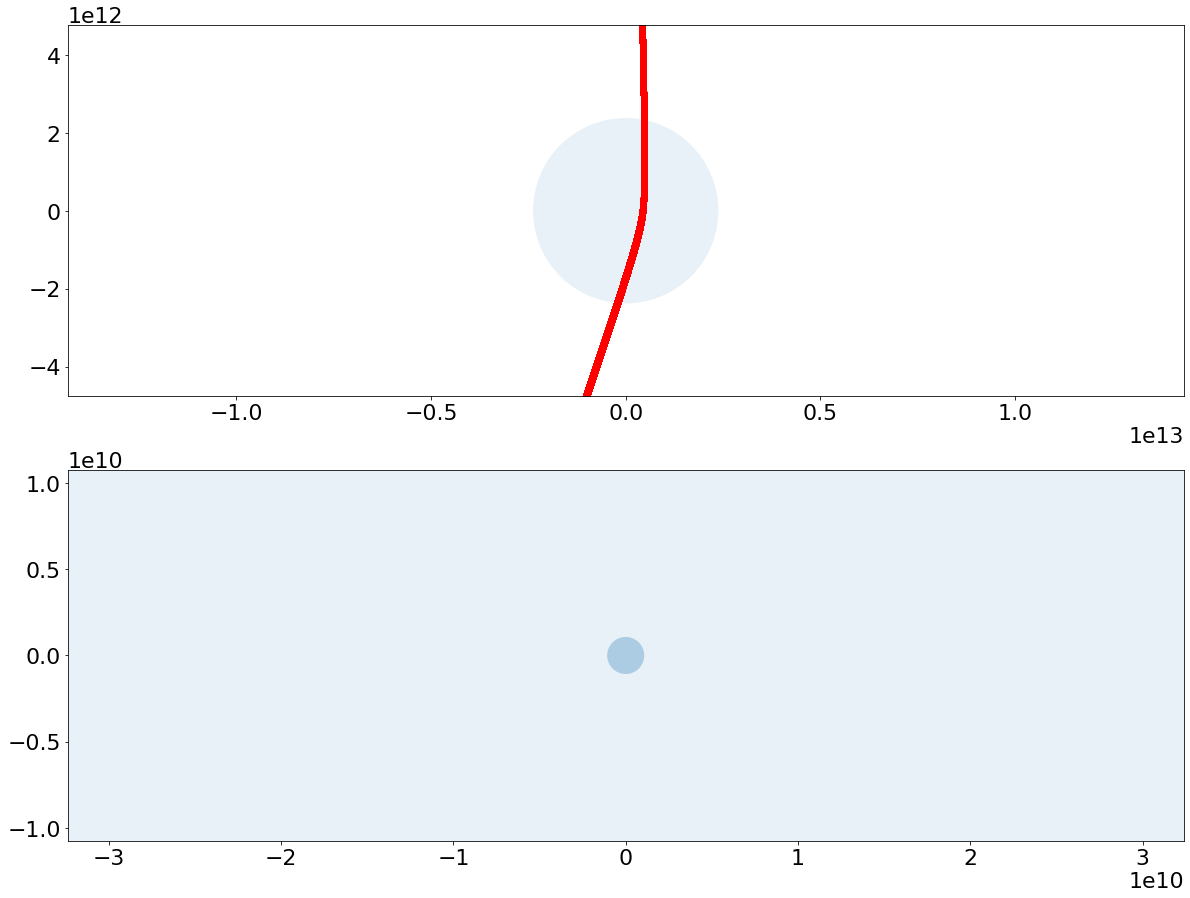

In [81]:
flash.plot_traj(flash.t_data,flash.y_data,2*star.now_rmax,10*star.now_rcore)

In [4]:
hit_list = np.transpose([  (input_list[i,0],f_getb(input_list[i,2])) for i in range(len(input_list)) if hit_core[i]==True])
nohit_list = np.transpose([  (input_list[i,0],f_getb(input_list[i,2])) for i in range(len(input_list)) if hit_core[i]==False])

NameError: name 'input_list' is not defined

(0.5, 1000.0)

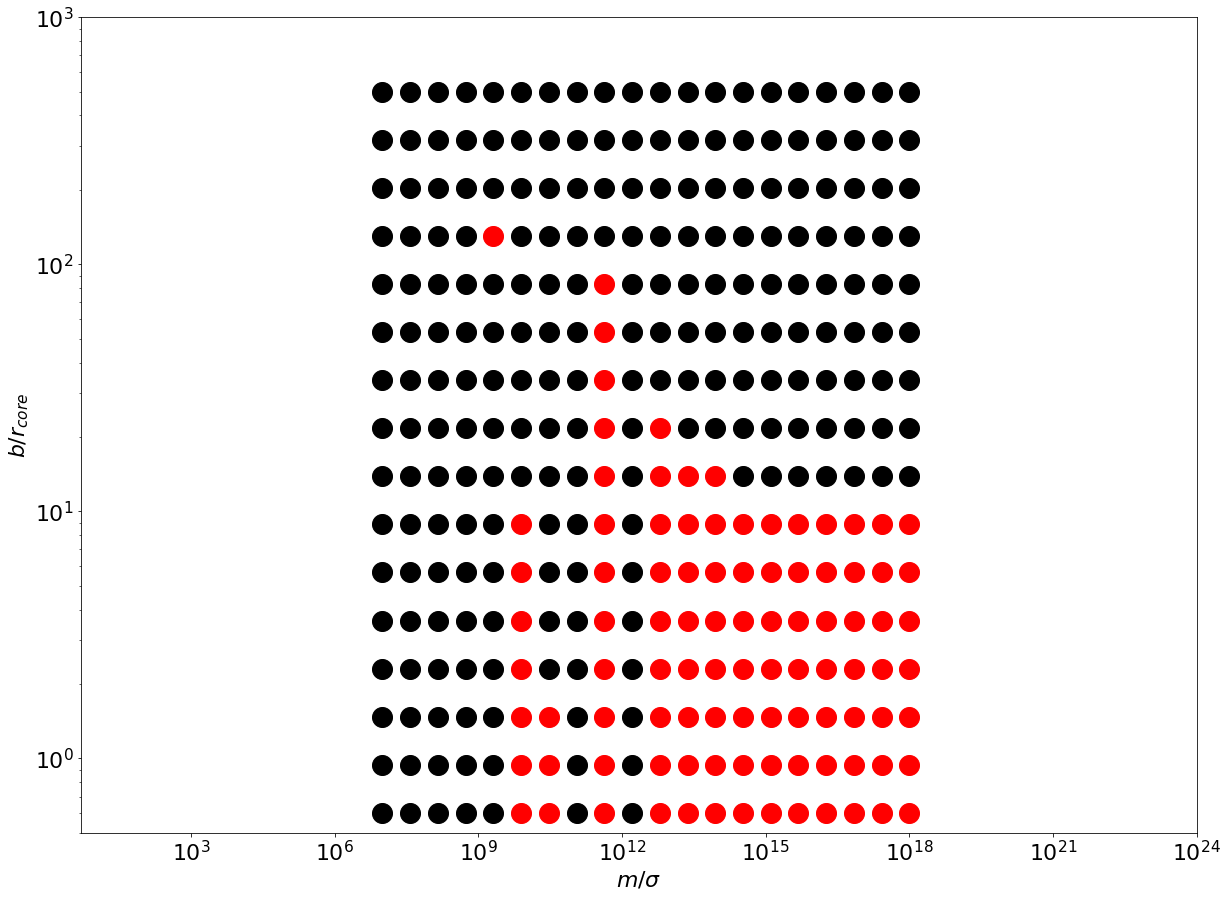

In [99]:
fig, ax = plt.subplots()

ax.plot(hit_list[0],hit_list[1],'ro',markersize=20)
ax.plot(nohit_list[0],nohit_list[1],'ko',markersize=20)

ax.set_xlabel(r'$m/\sigma$')
ax.set_ylabel(r'$ b/r_{core} $')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.5e1,1e24)
ax.set_ylim(0.5,1e3)

In [57]:
print(np.geomspace(1e7,1e18,num=20))
print('\n',np.geomspace(0.1,5e2,num=20))


[1.00e+07 3.79e+07 1.44e+08 5.46e+08 2.07e+09 7.85e+09 2.98e+10 1.13e+11
 4.28e+11 1.62e+12 6.16e+12 2.34e+13 8.86e+13 3.36e+14 1.27e+15 4.83e+15
 1.83e+16 6.95e+16 2.64e+17 1.00e+18]

 [1.00e-01 1.57e-01 2.45e-01 3.84e-01 6.01e-01 9.41e-01 1.47e+00 2.31e+00
 3.61e+00 5.65e+00 8.85e+00 1.39e+01 2.17e+01 3.40e+01 5.32e+01 8.32e+01
 1.30e+02 2.04e+02 3.19e+02 5.00e+02]


In [58]:
tmp_gamma=f_getg(1.30e2*star.now_rcore)

dm = DarkMatter(2.07e9,1,massunit='g')
flash = HeliumFlash(dm,star)
flash.trajectory(tmp_gamma, [r0,f_vr0(tmp_gamma),theta0,f_phi0(tmp_gamma)],calc_flash=True)

r is 22121.899911171666, and v is 0.001
r is 22119.112341213397, and v is 0.0010000010123424072
r is 22113.537193802193, and v is 0.0010000030377072442
r is 22102.386868985086, and v is 0.001000007091159232
r is 22080.08609924362, and v is 0.0010000152089702779
r is 22035.484078301135, and v is 0.0010000314883636737
r is 21946.278102286153, and v is 0.0010000642233883065
r is 21767.85834662865, and v is 0.001000130407746614
r is 21410.987071244796, and v is 0.0010002657108184525
r is 20697.11285329905, and v is 0.0010005487098759631
r is 20697.11285329905, and v is 0.0010005487098759631
r is 19983.032738384554, and v is 0.0010008518132313445
r is 19983.032738384554, and v is 0.0010008518132313445
r is 19268.7319360409, and v is 0.00100117724918078
r is 19268.7319360409, and v is 0.00100117724918078
r is 18554.193996395694, and v is 0.0010015275888129124
r is 18554.193996395694, and v is 0.0010015275888129124
r is 17839.400551461687, and v is 0.001001905814707099
r is 17839.400551461687

r is 1523.2129325324527, and v is 0.00069668744460698
r is 1493.0320702528145, and v is 0.0006413463865923926
r is 1493.0320702528145, and v is 0.0006413463865923926
r is 1465.2736179269732, and v is 0.0005892399525760598
r is 1465.2736179269732, and v is 0.0005892399525760598
r is 1439.7774439154077, and v is 0.0005401159007086292
r is 1439.7774439154077, and v is 0.0005401159007086292
r is 1416.40547036033, and v is 0.0004955367048461326
r is 1416.40547036033, and v is 0.0004955367048461326
r is 1394.9541729173875, and v is 0.0004553397013699711
r is 1394.9541729173875, and v is 0.0004553397013699711
r is 1375.2350842840501, and v is 0.00041871372038191534
r is 1375.2350842840501, and v is 0.00041871372038191534
r is 1357.0820620079596, and v is 0.0003863296267674337
r is 1357.0820620079596, and v is 0.0003863296267674337
r is 1340.3158892665626, and v is 0.0003575687968636141
r is 1340.3158892665626, and v is 0.0003575687968636141
r is 1324.7832952900437, and v is 0.0003320289914169

r is 598.4259468462841, and v is 8.031694289417556e-05
r is 596.6347310262556, and v is 8.032168219231793e-05
r is 596.6347310262556, and v is 8.032168219231793e-05
r is 594.8432091340857, and v is 8.035391994285277e-05
r is 594.8432091340857, and v is 8.035391994285277e-05
r is 593.0521406288223, and v is 8.032436053209372e-05
r is 593.0521406288223, and v is 8.032436053209372e-05
r is 591.2614605710121, and v is 8.023257430942322e-05
r is 591.2614605710121, and v is 8.023257430942322e-05
r is 589.4725415596663, and v is 8.018006896906311e-05
r is 589.4725415596663, and v is 8.018006896906311e-05
r is 587.6845397535376, and v is 8.016241572085227e-05
r is 587.6845397535376, and v is 8.016241572085227e-05
r is 585.8967061077948, and v is 8.017573339556747e-05
r is 585.8967061077948, and v is 8.017573339556747e-05
r is 584.1083746785799, and v is 8.021661687583375e-05
r is 584.1083746785799, and v is 8.021661687583375e-05
r is 582.3203642434903, and v is 8.019195945258255e-05
r is 582.3

r is 385.1699021756247, and v is 8.198182576811726e-05
r is 385.1699021756247, and v is 8.198182576811726e-05
r is 383.3404021888838, and v is 8.21375687265004e-05
r is 383.3404021888838, and v is 8.21375687265004e-05
r is 381.5070778062856, and v is 8.234225580594532e-05
r is 381.5070778062856, and v is 8.234225580594532e-05
r is 379.67106613977523, and v is 8.245423143832107e-05
r is 379.67106613977523, and v is 8.245423143832107e-05
r is 377.83202434474566, and v is 8.247014888409894e-05
r is 377.83202434474566, and v is 8.247014888409894e-05
r is 375.9920562697246, and v is 8.256595659177444e-05
r is 375.9920562697246, and v is 8.256595659177444e-05
r is 374.1494884871427, and v is 8.272646125177132e-05
r is 374.1494884871427, and v is 8.272646125177132e-05
r is 372.30526811838587, and v is 8.279856852285812e-05
r is 372.30526811838587, and v is 8.279856852285812e-05
r is 372.30526811838587, and v is 8.279856852285812e-05
r is 371.3820771000961, and v is 8.278014557027104e-05
r is 

r is 306.40754474817356, and v is 8.644835982804371e-05
r is 305.4431152263257, and v is 8.65762158528261e-05
r is 305.4431152263257, and v is 8.65762158528261e-05
r is 304.47718330626446, and v is 8.672520037235528e-05
r is 304.47718330626446, and v is 8.672520037235528e-05
r is 303.51007219226466, and v is 8.68232611591035e-05
r is 303.51007219226466, and v is 8.68232611591035e-05
r is 302.5417550844502, and v is 8.687004014837312e-05
r is 302.5417550844502, and v is 8.687004014837312e-05
r is 301.572795536271, and v is 8.695015140045e-05
r is 301.572795536271, and v is 8.695015140045e-05
r is 300.6028375789876, and v is 8.705925137851752e-05
r is 300.6028375789876, and v is 8.705925137851752e-05
r is 299.6315714111576, and v is 8.719362360810819e-05
r is 299.6315714111576, and v is 8.719362360810819e-05
r is 298.65952919778556, and v is 8.724882319500911e-05
r is 298.65952919778556, and v is 8.724882319500911e-05
r is 297.6867210902988, and v is 8.722489121162731e-05
r is 297.686721

r is 207.7403515986998, and v is 9.754770043818375e-05
r is 207.7403515986998, and v is 9.754770043818375e-05
r is 207.19628301896387, and v is 9.766127914893624e-05
r is 207.19628301896387, and v is 9.766127914893624e-05
r is 206.65154804020958, and v is 9.779307354130994e-05
r is 206.65154804020958, and v is 9.779307354130994e-05
r is 206.10604868236396, and v is 9.794111367452825e-05
r is 206.10604868236396, and v is 9.794111367452825e-05
r is 205.55969750547658, and v is 9.810367349025699e-05
r is 205.55969750547658, and v is 9.810367349025699e-05
r is 205.01295586292193, and v is 9.814192280637693e-05
r is 205.01295586292193, and v is 9.814192280637693e-05
r is 204.46593224006023, and v is 9.805804645839082e-05
r is 204.46593224006023, and v is 9.805804645839082e-05
r is 203.919295975111, and v is 9.801838453866177e-05
r is 203.919295975111, and v is 9.801838453866177e-05
r is 203.3728104207269, and v is 9.801749629205686e-05
r is 203.3728104207269, and v is 9.801749629205686e-05


r is 156.48581205798732, and v is 0.0001077649006703673
r is 155.885138652479, and v is 0.00010789101014223589
r is 155.885138652479, and v is 0.00010789101014223589
r is 155.28363068320738, and v is 0.0001078695578349329
r is 155.28363068320738, and v is 0.0001078695578349329
r is 154.68209286386997, and v is 0.00010793145232815011
r is 154.68209286386997, and v is 0.00010793145232815011
r is 154.08008706307118, and v is 0.00010806184314929297
r is 154.08008706307118, and v is 0.00010806184314929297
r is 153.47725284303914, and v is 0.00010824873734106434
r is 153.47725284303914, and v is 0.00010824873734106434
r is 152.87329252821812, and v is 0.00010848243750804663
r is 152.87329252821812, and v is 0.00010848243750804663
r is 152.26795919949578, and v is 0.000108755097048857
r is 152.26795919949578, and v is 0.000108755097048857
r is 151.66104700768523, and v is 0.00010898535129277421
r is 151.66104700768523, and v is 0.00010898535129277421
r is 151.0535302066047, and v is 0.0001089

r is 100.11254924181041, and v is 0.00012568520182877453
r is 99.76209259512397, and v is 0.0001257736837169247
r is 99.76209259512397, and v is 0.0001257736837169247
r is 99.4113286485814, and v is 0.00012592976126118036
r is 99.4113286485814, and v is 0.00012592976126118036
r is 99.06007955737552, and v is 0.0001261415975138855
r is 99.06007955737552, and v is 0.0001261415975138855
r is 98.70819845953054, and v is 0.00012639960912009247
r is 98.70819845953054, and v is 0.00012639960912009247
r is 98.35556358000818, and v is 0.00012669603314245661
r is 98.35556358000818, and v is 0.00012669603314245661
r is 98.00232257353693, and v is 0.00012690159005554965
r is 98.00232257353693, and v is 0.00012690159005554965
r is 97.64845198149274, and v is 0.00012701472506890132
r is 97.64845198149274, and v is 0.00012701472506890132
r is 97.29420458001235, and v is 0.0001271964010482433
r is 97.29420458001235, and v is 0.0001271964010482433
r is 96.93940027955543, and v is 0.00012743432908676026

r is 59.53702097012478, and v is 0.0001484483424947156
r is 59.53702097012478, and v is 0.0001484483424947156
r is 59.43354367896959, and v is 0.00014854392189475642
r is 59.43354367896959, and v is 0.00014854392189475642
r is 59.329995484690706, and v is 0.00014865834701113158
r is 59.329995484690706, and v is 0.00014865834701113158
r is 59.226363701899714, and v is 0.00014878964677383704
r is 59.226363701899714, and v is 0.00014878964677383704
r is 59.12263696790548, and v is 0.00014893607419463452
r is 59.12263696790548, and v is 0.00014893607419463452
r is 59.01880509237787, and v is 0.00014909608071284936
r is 59.01880509237787, and v is 0.00014909608071284936
r is 58.91485892419972, and v is 0.00014922770078237962
r is 58.91485892419972, and v is 0.00014922770078237962
r is 58.81087075456798, and v is 0.0001491811927504595
r is 58.81087075456798, and v is 0.0001491811927504595
r is 58.7069067682539, and v is 0.00014917086015392948
r is 58.7069067682539, and v is 0.000149170860153

r is 39.824583594207134, and v is 0.00016313721113140193
r is 39.824583594207134, and v is 0.00016313721113140193
r is 39.76774003766482, and v is 0.00016311492992016272
r is 39.76774003766482, and v is 0.00016311492992016272
r is 39.71090087775943, and v is 0.00016312225364467154
r is 39.71090087775943, and v is 0.00016312225364467154
r is 39.654056175673304, and v is 0.00016315586352634825
r is 39.654056175673304, and v is 0.00016315586352634825
r is 39.59719710480455, and v is 0.00016321283022522788
r is 39.59719710480455, and v is 0.00016321283022522788
r is 39.540315820368626, and v is 0.00016329056707445436
r is 39.540315820368626, and v is 0.00016329056707445436
r is 39.483405344626824, and v is 0.00016338678922755357
r is 39.483405344626824, and v is 0.00016338678922755357
r is 39.42645946577304, and v is 0.00016349947790454908
r is 39.42645946577304, and v is 0.00016349947790454908
r is 39.36947264877959, and v is 0.0001636268490487191
r is 39.36947264877959, and v is 0.000163

r is 29.30256619717485, and v is 0.00016494029721604887
r is 29.273823313475667, and v is 0.0001650421484305737
r is 29.273823313475667, and v is 0.0001650421484305737
r is 29.24506231413649, and v is 0.00016515049366189034
r is 29.24506231413649, and v is 0.00016515049366189034
r is 29.21628210333544, and v is 0.00016526470791992928
r is 29.21628210333544, and v is 0.00016526470791992928
r is 29.187481690432072, and v is 0.00016538423130329756
r is 29.187481690432072, and v is 0.00016538423130329756
r is 29.158660179012486, and v is 0.00016543030542852722
r is 29.158660179012486, and v is 0.00016543030542852722
r is 29.12985567840275, and v is 0.00016511471200544652
r is 29.12985567840275, and v is 0.00016511471200544652
r is 29.10110319907138, and v is 0.00016485120613622981
r is 29.10110319907138, and v is 0.00016485120613622981
r is 29.072393992831394, and v is 0.00016463403759771122
r is 29.072393992831394, and v is 0.00016463403759771122
r is 29.043720275874993, and v is 0.000164

r is 23.378774638117367, and v is 0.000161040047363918
r is 23.350713308135763, and v is 0.00016110399465232904
r is 23.350713308135763, and v is 0.00016110399465232904
r is 23.322639617866766, and v is 0.00016118959993364072
r is 23.322639617866766, and v is 0.00016118959993364072
r is 23.29454998875192, and v is 0.00016129339769856856
r is 23.29454998875192, and v is 0.00016129339769856856
r is 23.266441413744325, and v is 0.0001613327202074829
r is 23.266441413744325, and v is 0.0001613327202074829
r is 23.23834990943341, and v is 0.00016102588340972783
r is 23.23834990943341, and v is 0.00016102588340972783
r is 23.21030708219992, and v is 0.00016080421556861313
r is 23.21030708219992, and v is 0.00016080421556861313
r is 23.182298909646473, and v is 0.00016065316305590298
r is 23.182298909646473, and v is 0.00016065316305590298
r is 23.154313762196796, and v is 0.0001605607222499702
r is 23.154313762196796, and v is 0.0001605607222499702
r is 23.12634198459358, and v is 0.00016051

r is 19.643387347855878, and v is 0.00015471298989936795
r is 19.643387347855878, and v is 0.00015471298989936795
r is 19.629909529773265, and v is 0.00015472104783206657
r is 19.629909529773265, and v is 0.00015472104783206657
r is 19.616430663371435, and v is 0.00015474131081989593
r is 19.616430663371435, and v is 0.00015474131081989593
r is 19.602949727607236, and v is 0.00015477229191023138
r is 19.602949727607236, and v is 0.00015477229191023138
r is 19.58946582572283, and v is 0.000154812689206824
r is 19.58946582572283, and v is 0.000154812689206824
r is 19.57597816978308, and v is 0.0001548613626450079
r is 19.57597816978308, and v is 0.0001548613626450079
r is 19.562486067151916, and v is 0.00015491731374059418
r is 19.562486067151916, and v is 0.00015491731374059418
r is 19.548988908659837, and v is 0.00015497966791688886
r is 19.548988908659837, and v is 0.00015497966791688886
r is 19.535486158247565, and v is 0.0001550476590703673
r is 19.535486158247565, and v is 0.000155

r is 17.38367146156027, and v is 0.00014948394166024197
r is 17.38367146156027, and v is 0.00014948394166024197
r is 17.370654306959384, and v is 0.00014930802430849834
r is 17.370654306959384, and v is 0.00014930802430849834
r is 17.357651155045353, and v is 0.00014917912263538518
r is 17.357651155045353, and v is 0.00014917912263538518
r is 17.34465812683322, and v is 0.00014908952507078184
r is 17.34465812683322, and v is 0.00014908952507078184
r is 17.331671979017937, and v is 0.00014903280595009188
r is 17.331671979017937, and v is 0.00014903280595009188
r is 17.318689998099043, and v is 0.00014900360626111714
r is 17.318689998099043, and v is 0.00014900360626111714
r is 17.305709912517973, and v is 0.00014899745330887218
r is 17.305709912517973, and v is 0.00014899745330887218
r is 17.292729819622565, and v is 0.00014901061192927427
r is 17.292729819622565, and v is 0.00014901061192927427
r is 17.279748124873223, and v is 0.00014903996141004018
r is 17.279748124873223, and v is 0

r is 15.331403344783672, and v is 0.00014421442737017545
r is 15.325121163707518, and v is 0.0001442626059662023
r is 15.325121163707518, and v is 0.0001442626059662023
r is 15.318836866556449, and v is 0.00014431201881203226
r is 15.318836866556449, and v is 0.00014431201881203226
r is 15.312550401368439, and v is 0.00014433056585120494
r is 15.312550401368439, and v is 0.00014433056585120494
r is 15.306265693026077, and v is 0.0001442007563952458
r is 15.306265693026077, and v is 0.0001442007563952458
r is 15.299986340237922, and v is 0.00014409193925456917
r is 15.299986340237922, and v is 0.00014409193925456917
r is 15.293711462028146, and v is 0.00014400176614373135
r is 15.293711462028146, and v is 0.00014400176614373135
r is 15.287440275908, and v is 0.00014392815605127396
r is 15.287440275908, and v is 0.00014392815605127396
r is 15.281172086677744, and v is 0.00014386926397548687
r is 15.281172086677744, and v is 0.00014386926397548687
r is 15.274906276535974, and v is 0.00014

r is 14.11664524214875, and v is 0.00013905688927594407
r is 14.11664524214875, and v is 0.00013905688927594407
r is 14.110589000229895, and v is 0.00013901353820484067
r is 14.110589000229895, and v is 0.00013901353820484067
r is 14.104534451997912, and v is 0.00013898392957101125
r is 14.104534451997912, and v is 0.00013898392957101125
r is 14.098481024776163, and v is 0.00013896623343759767
r is 14.098481024776163, and v is 0.00013896623343759767
r is 14.092428222109731, and v is 0.00013895886615196252
r is 14.092428222109731, and v is 0.00013895886615196252
r is 14.08637561351199, and v is 0.00013896045682298407
r is 14.08637561351199, and v is 0.00013896045682298407
r is 14.080322825605453, and v is 0.00013896981846488445
r is 14.080322825605453, and v is 0.00013896981846488445
r is 14.07426953446313, and v is 0.00013898592313133998
r is 14.07426953446313, and v is 0.00013898592313133998
r is 14.068215458984671, and v is 0.0001390078804681845
r is 14.068215458984671, and v is 0.00

r is 13.05946724983925, and v is 0.0001354889799398742
r is 13.05946724983925, and v is 0.0001354889799398742
r is 13.053564952940519, and v is 0.00013554875936908152
r is 13.053564952940519, and v is 0.00013554875936908152
r is 13.047660048149591, and v is 0.00013560882794447096
r is 13.047660048149591, and v is 0.00013560882794447096
r is 13.041752523326428, and v is 0.00013566915341204746
r is 13.041752523326428, and v is 0.00013566915341204746
r is 13.035842367664214, and v is 0.00013572970860508028
r is 13.035842367664214, and v is 0.00013572970860508028
r is 13.029937653831412, and v is 0.000135531765778835
r is 13.029937653831412, and v is 0.000135531765778835
r is 13.02404062933312, and v is 0.0001350839771568176
r is 13.02404062933312, and v is 0.0001350839771568176
r is 13.018161935646992, and v is 0.00013471970273256354
r is 13.018161935646992, and v is 0.00013471970273256354
r is 13.012298130770013, and v is 0.00013442500504211836
r is 13.012298130770013, and v is 0.0001344

r is 12.041532302558535, and v is 0.0001299466492262138
r is 12.041532302558535, and v is 0.0001299466492262138
r is 12.035872856696907, and v is 0.000129902890818474
r is 12.035872856696907, and v is 0.000129902890818474
r is 12.030215035332516, and v is 0.0001298792809268197
r is 12.030215035332516, and v is 0.0001298792809268197
r is 12.024558014843347, and v is 0.00012987195431995438
r is 12.024558014843347, and v is 0.00012987195431995438
r is 12.01890112953582, and v is 0.00012987779275258092
r is 12.01890112953582, and v is 0.00012987779275258092
r is 12.013243841136287, and v is 0.00012989427960873265
r is 12.013243841136287, and v is 0.00012989427960873265
r is 12.00758571421435, and v is 0.00012991938321775732
r is 12.00758571421435, and v is 0.00012991938321775732
r is 12.001926396369663, and v is 0.00012995146304628738
r is 12.001926396369663, and v is 0.00012995146304628738
r is 11.996265602249489, and v is 0.00012998919419061628
r is 11.996265602249489, and v is 0.0001299

r is 11.426960812998693, and v is 0.00012713015896628963
r is 11.424192733604507, and v is 0.00012704592623571858
r is 11.424192733604507, and v is 0.00012704592623571858
r is 11.421426396554343, and v is 0.0001269746512249849
r is 11.421426396554343, and v is 0.0001269746512249849
r is 11.4186615300823, and v is 0.00012691486596597623
r is 11.4186615300823, and v is 0.00012691486596597623
r is 11.415897893197535, and v is 0.00012686527071706675
r is 11.415897893197535, and v is 0.00012686527071706675
r is 11.413135272160039, and v is 0.00012682471430876333
r is 11.413135272160039, and v is 0.00012682471430876333
r is 11.410373477367592, and v is 0.00012679217686810157
r is 11.410373477367592, and v is 0.00012679217686810157
r is 11.40761234060426, and v is 0.00012676675461641555
r is 11.40761234060426, and v is 0.00012676675461641555
r is 11.40485171260714, and v is 0.00012674764647788172
r is 11.40485171260714, and v is 0.00012674764647788172
r is 11.402091460913514, and v is 0.00012

r is 10.90144777334759, and v is 0.00012539076635405817
r is 10.90144777334759, and v is 0.00012539076635405817
r is 10.898716753370916, and v is 0.00012542208481351047
r is 10.898716753370916, and v is 0.00012542208481351047
r is 10.895985051125628, and v is 0.00012545343191261768
r is 10.895985051125628, and v is 0.00012545343191261768
r is 10.893252665992248, and v is 0.000125429262474238
r is 10.893252665992248, and v is 0.000125429262474238
r is 10.890523019818547, and v is 0.00012514839003931034
r is 10.890523019818547, and v is 0.00012514839003931034
r is 10.887799207970241, and v is 0.00012490741618677
r is 10.887799207970241, and v is 0.00012490741618677
r is 10.885080398173518, and v is 0.00012470116258271534
r is 10.885080398173518, and v is 0.00012470116258271534
r is 10.882365866059022, and v is 0.0001245251400700962
r is 10.882365866059022, and v is 0.0001245251400700962
r is 10.879654980828096, and v is 0.00012437545288846016
r is 10.879654980828096, and v is 0.000124375

r is 10.402627759425092, and v is 0.00012129795795948228
r is 10.399985886796337, and v is 0.00012132743839894753
r is 10.399985886796337, and v is 0.00012132743839894753
r is 10.397343370707794, and v is 0.0001213571200953201
r is 10.397343370707794, and v is 0.0001213571200953201
r is 10.39470020695138, and v is 0.00012138697830047812
r is 10.39470020695138, and v is 0.00012138697830047812
r is 10.392056391833613, and v is 0.00012141699171356053
r is 10.392056391833613, and v is 0.00012141699171356053
r is 10.389411922103918, and v is 0.00012144714200200041
r is 10.389411922103918, and v is 0.00012144714200200041
r is 10.38676679489291, and v is 0.00012147741338903194
r is 10.38676679489291, and v is 0.00012147741338903194
r is 10.384121007659235, and v is 0.00012150779229845329
r is 10.384121007659235, and v is 0.00012150779229845329
r is 10.381474558143815, and v is 0.00012153826704870493
r is 10.381474558143815, and v is 0.00012153826704870493
r is 10.378827444330435, and v is 0.0

r is 9.878672339907489, and v is 0.00011826605802169812
r is 9.878672339907489, and v is 0.00011826605802169812
r is 9.876097033769392, and v is 0.00011821924435365503
r is 9.876097033769392, and v is 0.00011821924435365503
r is 9.873522660475883, and v is 0.00011818474563261792
r is 9.873522660475883, and v is 0.00011818474563261792
r is 9.87094896559225, and v is 0.0001181606058969836
r is 9.87094896559225, and v is 0.0001181606058969836
r is 9.868375735082868, and v is 0.00011814518170633521
r is 9.868375735082868, and v is 0.00011814518170633521
r is 9.865802788858995, and v is 0.00011813709179000654
r is 9.865802788858995, and v is 0.00011813709179000654
r is 9.863229975365243, and v is 0.00011813517493791244
r is 9.863229975365243, and v is 0.00011813517493791244
r is 9.860657167034978, and v is 0.0001181384547455959
r is 9.860657167034978, and v is 0.0001181384547455959
r is 9.858084256473385, and v is 0.00011814611007046372
r is 9.858084256473385, and v is 0.0001181461100704637

r is 9.355258703749922, and v is 0.00011536994340063453
r is 9.355258703749922, and v is 0.00011536994340063453
r is 9.3527459424889, and v is 0.00011539804500111488
r is 9.3527459424889, and v is 0.00011539804500111488
r is 9.350232565476956, and v is 0.00011542668048735596
r is 9.350232565476956, and v is 0.00011542668048735596
r is 9.347718561724623, and v is 0.00011545575885464865
r is 9.347718561724623, and v is 0.00011545575885464865
r is 9.345203922110375, and v is 0.00011548520536590592
r is 9.345203922110375, and v is 0.00011548520536590592
r is 9.342688639046692, and v is 0.00011551495864730518
r is 9.342688639046692, and v is 0.00011551495864730518
r is 9.340172706205752, and v is 0.00011554496830215503
r is 9.340172706205752, and v is 0.00011554496830215503
r is 9.33765611829411, and v is 0.00011557519295053163
r is 9.33765611829411, and v is 0.00011557519295053163
r is 9.335138870867606, and v is 0.00011560559861873661
r is 9.335138870867606, and v is 0.0001156055986187366

r is 8.952656911245219, and v is 0.00011334100171709199
r is 8.951422962163276, and v is 0.00011327449850489806
r is 8.951422962163276, and v is 0.00011327449850489806
r is 8.950189707077312, and v is 0.0001132164670704964
r is 8.950189707077312, and v is 0.0001132164670704964
r is 8.94895705686611, and v is 0.000113166028451777
r is 8.94895705686611, and v is 0.000113166028451777
r is 8.947724931651809, and v is 0.00011312239579950459
r is 8.947724931651809, and v is 0.00011312239579950459
r is 8.946493259831813, and v is 0.00011308486454894986
r is 8.946493259831813, and v is 0.00011308486454894986
r is 8.94526197721389, and v is 0.00011305280367513268
r is 8.94526197721389, and v is 0.00011305280367513268
r is 8.944031026243085, and v is 0.00011302564790541984
r is 8.944031026243085, and v is 0.00011302564790541984
r is 8.94280035531042, and v is 0.00011300289077920936
r is 8.94280035531042, and v is 0.00011300289077920936
r is 8.941569918134507, and v is 0.00011298407845816717
r is

r is 8.703382138728603, and v is 0.0001110903549517564
r is 8.703382138728603, and v is 0.0001110903549517564
r is 8.702172409720843, and v is 0.00011110458601921379
r is 8.702172409720843, and v is 0.00011110458601921379
r is 8.700962525260627, and v is 0.00011111895431323719
r is 8.700962525260627, and v is 0.00011111895431323719
r is 8.69975248390473, and v is 0.00011113344548037556
r is 8.69975248390473, and v is 0.00011113344548037556
r is 8.698542284360617, and v is 0.00011114804674174567
r is 8.698542284360617, and v is 0.00011114804674174567
r is 8.69733192546992, and v is 0.00011116274672049723
r is 8.69733192546992, and v is 0.00011116274672049723
r is 8.696121406193713, and v is 0.00011117753528817294
r is 8.696121406193713, and v is 0.00011117753528817294
r is 8.694910725599412, and v is 0.00011119240342789484
r is 8.694910725599412, and v is 0.00011119240342789484
r is 8.693699882849092, and v is 0.00011120734311253403
r is 8.693699882849092, and v is 0.0001112073431125340

r is 8.447515615178732, and v is 0.00010982836736154344
r is 8.447515615178732, and v is 0.00010982836736154344
r is 8.446319636321958, and v is 0.00010984028340547299
r is 8.446319636321958, and v is 0.00010984028340547299
r is 8.445123526177548, and v is 0.00010985263084642381
r is 8.445123526177548, and v is 0.00010985263084642381
r is 8.443927280225358, and v is 0.00010986535972547649
r is 8.443927280225358, and v is 0.00010986535972547649
r is 8.442730894468395, and v is 0.0001098784259565275
r is 8.442730894468395, and v is 0.0001098784259565275
r is 8.44153436537133, and v is 0.00010989179063616255
r is 8.44153436537133, and v is 0.00010989179063616255
r is 8.44033768980621, and v is 0.00010990541943466284
r is 8.44033768980621, and v is 0.00010990541943466284
r is 8.439140865004575, and v is 0.0001099192820585899
r is 8.439140865004575, and v is 0.0001099192820585899
r is 8.437943888515187, and v is 0.00010993335177652424
r is 8.437943888515187, and v is 0.00010993335177652424


r is 8.220355987321803, and v is 0.00010826479787690218
r is 8.220355987321803, and v is 0.00010826479787690218
r is 8.219177031782596, and v is 0.00010827743980492149
r is 8.219177031782596, and v is 0.00010827743980492149
r is 8.217997937282924, and v is 0.00010829044855985703
r is 8.217997937282924, and v is 0.00010829044855985703
r is 8.216818699988755, and v is 0.00010830377889428065
r is 8.216818699988755, and v is 0.00010830377889428065
r is 8.215639316538617, and v is 0.00010831739124271719
r is 8.215639316538617, and v is 0.00010831739124271719
r is 8.214459783984262, and v is 0.00010833125100848941
r is 8.214459783984262, and v is 0.00010833125100848941
r is 8.213280099738762, and v is 0.00010834532794008185
r is 8.213280099738762, and v is 0.00010834532794008185
r is 8.21210026153114, and v is 0.00010835959558577529
r is 8.21210026153114, and v is 0.00010835959558577529
r is 8.210920267366665, and v is 0.00010837403081672041
r is 8.210920267366665, and v is 0.000108374030816

r is 7.962088576711554, and v is 0.0001068847258379594
r is 7.962088576711554, and v is 0.0001068847258379594
r is 7.96092466803414, and v is 0.00010689196607833719
r is 7.96092466803414, and v is 0.00010689196607833719
r is 7.959760676490713, and v is 0.00010690034429162994
r is 7.959760676490713, and v is 0.00010690034429162994
r is 7.958596590231321, and v is 0.00010690970737622936
r is 7.958596590231321, and v is 0.00010690970737622936
r is 7.957432398999851, and v is 0.00010691992295245774
r is 7.957432398999851, and v is 0.00010691992295245774
r is 7.95626809391832, and v is 0.00010693087655631457
r is 7.95626809391832, and v is 0.00010693087655631457
r is 7.955103667300361, and v is 0.00010694246921397585
r is 7.955103667300361, and v is 0.00010694246921397585
r is 7.9539391124899685, and v is 0.00010695461534516507
r is 7.9539391124899685, and v is 0.00010695461534516507
r is 7.952774423722064, and v is 0.00010696724095064506
r is 7.952774423722064, and v is 0.00010696724095064

r is 7.722878963798165, and v is 0.00010522171106638026
r is 7.722878963798165, and v is 0.00010522171106638026
r is 7.721733201837197, and v is 0.00010521818521949731
r is 7.721733201837197, and v is 0.00010521818521949731
r is 7.72058746841778, and v is 0.00010521745061679237
r is 7.72058746841778, and v is 0.00010521745061679237
r is 7.719441734579302, and v is 0.00010521910104418265
r is 7.719441734579302, and v is 0.00010521910104418265
r is 7.718295975575149, and v is 0.0001052227896027826
r is 7.718295975575149, and v is 0.0001052227896027826
r is 7.717150170257446, and v is 0.00010522822002822932
r is 7.717150170257446, and v is 0.00010522822002822932
r is 7.716004300551814, and v is 0.00010523513928658993
r is 7.716004300551814, and v is 0.00010523513928658993
r is 7.714858351008923, and v is 0.00010524333125732351
r is 7.714858351008923, and v is 0.00010524333125732351
r is 7.713712308421553, and v is 0.00010525261134240746
r is 7.713712308421553, and v is 0.00010525261134240

r is 7.4851949191454334, and v is 0.00010344048358721296
r is 7.4851949191454334, and v is 0.00010344048358721296
r is 7.484068571540284, and v is 0.00010343170098741859
r is 7.484068571540284, and v is 0.00010343170098741859
r is 7.482942306082261, and v is 0.00010342674962429402
r is 7.482942306082261, and v is 0.00010342674962429402
r is 7.481816083172453, and v is 0.00010342502726243033
r is 7.481816083172453, and v is 0.00010342502726243033
r is 7.480689869435571, and v is 0.00010342602661827702
r is 7.480689869435571, and v is 0.00010342602661827702
r is 7.479563636738824, and v is 0.00010342932034776195
r is 7.479563636738824, and v is 0.00010342932034776195
r is 7.478437361365885, and v is 0.00010343454842106733
r is 7.478437361365885, and v is 0.00010343454842106733
r is 7.477311023321275, and v is 0.00010344140750080716
r is 7.477311023321275, and v is 0.00010344140750080716
r is 7.476184605744497, and v is 0.00010344964200277648
r is 7.476184605744497, and v is 0.00010344964

r is 7.2338157139417225, and v is 0.00010165569443501253
r is 7.232708728156014, and v is 0.00010166763166490085
r is 7.232708728156014, and v is 0.00010166763166490085
r is 7.231601610204236, and v is 0.00010168018971718371
r is 7.231601610204236, and v is 0.00010168018971718371
r is 7.230494353692967, and v is 0.00010169326409797566
r is 7.230494353692967, and v is 0.00010169326409797566
r is 7.229386953304196, and v is 0.00010170676809958984
r is 7.229386953304196, and v is 0.00010170676809958984
r is 7.228279848809424, and v is 0.00010166396381127454
r is 7.228279848809424, and v is 0.00010166396381127454
r is 7.227173155853372, and v is 0.00010156676970960841
r is 7.227173155853372, and v is 0.00010156676970960841
r is 7.22606745312494, and v is 0.00010148899898531579
r is 7.22606745312494, and v is 0.00010148899898531579
r is 7.2249625409085105, and v is 0.00010142728987469523
r is 7.2249625409085105, and v is 0.00010142728987469523
r is 7.2238582540406595, and v is 0.00010137886

r is 6.999179352891374, and v is 9.969635409155481e-05
r is 6.998093785908281, and v is 9.968447344291457e-05
r is 6.998093785908281, and v is 9.968447344291457e-05
r is 6.997008330599869, and v is 9.967765113151661e-05
r is 6.997008330599869, and v is 9.967765113151661e-05
r is 6.995922935156653, and v is 9.967495189274468e-05
r is 6.995922935156653, and v is 9.967495189274468e-05
r is 6.9948375573470205, and v is 9.967561383156588e-05
r is 6.9948375573470205, and v is 9.967561383156588e-05
r is 6.993752162742053, and v is 9.967901620269484e-05
r is 6.993752162742053, and v is 9.967901620269484e-05
r is 6.9926667232701485, and v is 9.968465320942053e-05
r is 6.9926667232701485, and v is 9.968465320942053e-05
r is 6.991581216039876, and v is 9.969211268595172e-05
r is 6.991581216039876, and v is 9.969211268595172e-05
r is 6.990495622381112, and v is 9.970105874594814e-05
r is 6.990495622381112, and v is 9.970105874594814e-05
r is 6.989409927063831, and v is 9.971121765467497e-05
r is 6

r is 6.805628631063838, and v is 9.824342339026461e-05
r is 6.805628631063838, and v is 9.824342339026461e-05
r is 6.805093728748553, and v is 9.824868654775528e-05
r is 6.805093728748553, and v is 9.824868654775528e-05
r is 6.8045587973299915, and v is 9.825420101405169e-05
r is 6.8045587973299915, and v is 9.825420101405169e-05
r is 6.804023835485123, and v is 9.825994139159773e-05
r is 6.804023835485123, and v is 9.825994139159773e-05
r is 6.803488842024591, and v is 9.82658848676145e-05
r is 6.803488842024591, and v is 9.82658848676145e-05
r is 6.802953815879111, and v is 9.827201095103814e-05
r is 6.802953815879111, and v is 9.827201095103814e-05
r is 6.802418756087248, and v is 9.827830123624866e-05
r is 6.802418756087248, and v is 9.827830123624866e-05
r is 6.801883661784442, and v is 9.828473919085583e-05
r is 6.801883661784442, and v is 9.828473919085583e-05
r is 6.801348532193144, and v is 9.8291309965089e-05
r is 6.801348532193144, and v is 9.8291309965089e-05
r is 6.8008133

r is 6.686858976827259, and v is 9.726987440876727e-05
r is 6.686858976827259, and v is 9.726987440876727e-05
r is 6.686329376223925, and v is 9.727448294979522e-05
r is 6.686329376223925, and v is 9.727448294979522e-05
r is 6.685799749941515, and v is 9.727942164915323e-05
r is 6.685799749941515, and v is 9.727942164915323e-05
r is 6.685270096244601, and v is 9.728465558741839e-05
r is 6.685270096244601, and v is 9.728465558741839e-05
r is 6.684740413581266, and v is 9.729015355842509e-05
r is 6.684740413581266, and v is 9.729015355842509e-05
r is 6.684210700563591, and v is 9.729588767433174e-05
r is 6.684210700563591, and v is 9.729588767433174e-05
r is 6.683680955950222, and v is 9.730183301273241e-05
r is 6.683680955950222, and v is 9.730183301273241e-05
r is 6.683151178630776, and v is 9.730796730132614e-05
r is 6.683151178630776, and v is 9.730796730132614e-05
r is 6.682621367611919, and v is 9.73142706361387e-05
r is 6.682621367611919, and v is 9.73142706361387e-05
r is 6.68209

r is 6.582358932247143, and v is 9.659212514114666e-05
r is 6.581833113865915, and v is 9.654488026858834e-05
r is 6.581833113865915, and v is 9.654488026858834e-05
r is 6.581307541841554, and v is 9.650375130022549e-05
r is 6.581307541841554, and v is 9.650375130022549e-05
r is 6.580782184090261, and v is 9.646805476352763e-05
r is 6.580782184090261, and v is 9.646805476352763e-05
r is 6.580257012112787, and v is 9.643718411361465e-05
r is 6.580257012112787, and v is 9.643718411361465e-05
r is 6.579732000591159, and v is 9.641060096030636e-05
r is 6.579732000591159, and v is 9.641060096030636e-05
r is 6.579207127031376, and v is 9.638782732003225e-05
r is 6.579207127031376, and v is 9.638782732003225e-05
r is 6.578682371446677, and v is 9.636843876778069e-05
r is 6.578682371446677, and v is 9.636843876778069e-05
r is 6.578157716076697, and v is 9.635205838051012e-05
r is 6.578157716076697, and v is 9.635205838051012e-05
r is 6.5776331451383605, and v is 9.633835137736927e-05
r is 6.57

r is 6.4834957705572105, and v is 9.569026162937184e-05
r is 6.4834957705572105, and v is 9.569026162937184e-05
r is 6.482974789504995, and v is 9.568403015839058e-05
r is 6.482974789504995, and v is 9.568403015839058e-05
r is 6.482453839540085, and v is 9.567939764775804e-05
r is 6.482453839540085, and v is 9.567939764775804e-05
r is 6.481932912282991, and v is 9.567618047957249e-05
r is 6.481932912282991, and v is 9.567618047957249e-05
r is 6.4814120003164, and v is 9.567421617282894e-05
r is 6.4814120003164, and v is 9.567421617282894e-05
r is 6.480891097074432, and v is 9.567336094328437e-05
r is 6.480891097074432, and v is 9.567336094328437e-05
r is 6.480370196744668, and v is 9.567348754668255e-05
r is 6.480370196744668, and v is 9.567348754668255e-05
r is 6.479849294181489, and v is 9.567448337205905e-05
r is 6.479849294181489, and v is 9.567448337205905e-05
r is 6.479328384829394, and v is 9.567624875583735e-05
r is 6.479328384829394, and v is 9.567624875583735e-05
r is 6.47880

r is 6.3730416805562955, and v is 9.480381624703838e-05
r is 6.372525581475791, and v is 9.476619820864784e-05
r is 6.372525581475791, and v is 9.476619820864784e-05
r is 6.372009677539898, and v is 9.473403014487673e-05
r is 6.372009677539898, and v is 9.473403014487673e-05
r is 6.371493940242842, and v is 9.47066542080086e-05
r is 6.371493940242842, and v is 9.47066542080086e-05
r is 6.370978344518952, and v is 9.46834923896691e-05
r is 6.370978344518952, and v is 9.46834923896691e-05
r is 6.370462868325319, and v is 9.466403673489743e-05
r is 6.370462868325319, and v is 9.466403673489743e-05
r is 6.369947492275569, and v is 9.464784077790009e-05
r is 6.369947492275569, and v is 9.464784077790009e-05
r is 6.36943219931837, and v is 9.463451204194166e-05
r is 6.36943219931837, and v is 9.463451204194166e-05
r is 6.368916974455152, and v is 9.462370546725984e-05
r is 6.368916974455152, and v is 9.462370546725984e-05
r is 6.368401804492147, and v is 9.461511764916827e-05
r is 6.36840180

r is 6.2600601102537095, and v is 9.380817034777418e-05
r is 6.259549414048192, and v is 9.378064947695582e-05
r is 6.259549414048192, and v is 9.378064947695582e-05
r is 6.259038859853783, and v is 9.375754559184875e-05
r is 6.259038859853783, and v is 9.375754559184875e-05
r is 6.258528424607042, and v is 9.373830277069698e-05
r is 6.258528424607042, and v is 9.373830277069698e-05
r is 6.258018088146806, and v is 9.372243534656642e-05
r is 6.258018088146806, and v is 9.372243534656642e-05
r is 6.257507832847533, and v is 9.37095189643456e-05
r is 6.257507832847533, and v is 9.37095189643456e-05
r is 6.256997643299269, and v is 9.369918279178132e-05
r is 6.256997643299269, and v is 9.369918279178132e-05
r is 6.256487506028271, and v is 9.369110273191501e-05
r is 6.256487506028271, and v is 9.369110273191501e-05
r is 6.255977409253032, and v is 9.368499550533858e-05
r is 6.255977409253032, and v is 9.368499550533858e-05
r is 6.255467342671193, and v is 9.368061348863999e-05
r is 6.2554

r is 6.1532798793862105, and v is 9.282356324759283e-05
r is 6.152774501874206, and v is 9.281976362213191e-05
r is 6.152774501874206, and v is 9.281976362213191e-05
r is 6.152269142406128, and v is 9.281745701868166e-05
r is 6.152269142406128, and v is 9.281745701868166e-05
r is 6.151763793198327, and v is 9.281644844861134e-05
r is 6.151763793198327, and v is 9.281644844861134e-05
r is 6.151258447483609, and v is 9.281656844118642e-05
r is 6.151258447483609, and v is 9.281656844118642e-05
r is 6.150753099378219, and v is 9.281766969763699e-05
r is 6.150753099378219, and v is 9.281766969763699e-05
r is 6.150247743766277, and v is 9.281962418571981e-05
r is 6.150247743766277, and v is 9.281962418571981e-05
r is 6.149742376199338, and v is 9.282232061632572e-05
r is 6.149742376199338, and v is 9.282232061632572e-05
r is 6.149236992809117, and v is 9.282566225155343e-05
r is 6.149236992809117, and v is 9.282566225155343e-05
r is 6.148731590231635, and v is 9.282956500045326e-05
r is 6.14

r is 6.083198074650042, and v is 9.237408316709756e-05
r is 6.08269512438092, and v is 9.238156832599806e-05
r is 6.08269512438092, and v is 9.238156832599806e-05
r is 6.082192133319797, and v is 9.238907523574613e-05
r is 6.082192133319797, and v is 9.238907523574613e-05
r is 6.081689101352954, and v is 9.239660123676772e-05
r is 6.081689101352954, and v is 9.239660123676772e-05
r is 6.081186028380523, and v is 9.240414402571466e-05
r is 6.081186028380523, and v is 9.240414402571466e-05
r is 6.08068291431463, and v is 9.241170160778846e-05
r is 6.08068291431463, and v is 9.241170160778846e-05
r is 6.080179759077789, and v is 9.24192722554421e-05
r is 6.080179759077789, and v is 9.24192722554421e-05
r is 6.079676562601512, and v is 9.242685447260687e-05
r is 6.079676562601512, and v is 9.242685447260687e-05
r is 6.079173324825098, and v is 9.243444696370548e-05
r is 6.079173324825098, and v is 9.243444696370548e-05
r is 6.078670045694597, and v is 9.244204860681117e-05
r is 6.078670045

r is 5.981069282286727, and v is 9.143330126082529e-05
r is 5.981069282286727, and v is 9.143330126082529e-05
r is 5.980571458101673, and v is 9.143855947632376e-05
r is 5.980571458101673, and v is 9.143855947632376e-05
r is 5.980073604704841, and v is 9.144414762466407e-05
r is 5.980073604704841, and v is 9.144414762466407e-05
r is 5.979575720380919, and v is 9.145001984821597e-05
r is 5.979575720380919, and v is 9.145001984821597e-05
r is 5.979077803652949, and v is 9.145613669870387e-05
r is 5.979077803652949, and v is 9.145613669870387e-05
r is 5.9785798532490055, and v is 9.146246424143003e-05
r is 5.9785798532490055, and v is 9.146246424143003e-05
r is 5.978081868073543, and v is 9.146897328473991e-05
r is 5.978081868073543, and v is 9.146897328473991e-05
r is 5.977583847182744, and v is 9.147563871719926e-05
r is 5.977583847182744, and v is 9.147563871719926e-05
r is 5.977085789763306, and v is 9.148243893741261e-05
r is 5.977085789763306, and v is 9.148243893741261e-05
r is 5.9

r is 5.9392998662331244, and v is 9.124950530412602e-05
r is 5.93880314925371, and v is 9.11944369405712e-05
r is 5.93880314925371, and v is 9.11944369405712e-05
r is 5.938306716262203, and v is 9.114833790558801e-05
r is 5.938306716262203, and v is 9.114833790558801e-05
r is 5.937810520697896, and v is 9.110992025179339e-05
r is 5.937810520697896, and v is 9.110992025179339e-05
r is 5.9373145226840665, and v is 9.107808211509575e-05
r is 5.9373145226840665, and v is 9.107808211509575e-05
r is 5.936818688062769, and v is 9.105188052687843e-05
r is 5.936818688062769, and v is 9.105188052687843e-05
r is 5.936322987570515, and v is 9.103050827977352e-05
r is 5.936322987570515, and v is 9.103050827977352e-05
r is 5.935827396133873, and v is 9.101327422115901e-05
r is 5.935827396133873, and v is 9.101327422115901e-05
r is 5.935331892267244, and v is 9.099958645071588e-05
r is 5.935331892267244, and v is 9.099958645071588e-05
r is 5.934836457557775, and v is 9.098893798249432e-05
r is 5.9348

r is 5.865610193330426, and v is 9.056790775807592e-05
r is 5.865117081251121, and v is 9.057292739916565e-05
r is 5.865117081251121, and v is 9.057292739916565e-05
r is 5.86462394116978, and v is 9.057832799493281e-05
r is 5.86462394116978, and v is 9.057832799493281e-05
r is 5.8641307711101955, and v is 9.058405404733914e-05
r is 5.8641307711101955, and v is 9.058405404733914e-05
r is 5.863637569383986, and v is 9.059005818285431e-05
r is 5.863637569383986, and v is 9.059005818285431e-05
r is 5.863144334548461, and v is 9.059629996308281e-05
r is 5.863144334548461, and v is 9.059629996308281e-05
r is 5.862651065370658, and v is 9.060274486958249e-05
r is 5.862651065370658, and v is 9.060274486958249e-05
r is 5.86215776079663, and v is 9.060936343733252e-05
r is 5.86215776079663, and v is 9.060936343733252e-05
r is 5.861664419925248, and v is 9.060817962625067e-05
r is 5.861664419925248, and v is 9.060817962625067e-05
r is 5.861171163346688, and v is 9.057081794807031e-05
r is 5.86117

r is 5.7777549312264, and v is 8.964854457899326e-05
r is 5.777266830283621, and v is 8.965038197514244e-05
r is 5.777266830283621, and v is 8.965038197514244e-05
r is 5.776778717796952, and v is 8.965309326437515e-05
r is 5.776778717796952, and v is 8.965309326437515e-05
r is 5.776290589242365, and v is 8.965654569108926e-05
r is 5.776290589242365, and v is 8.965654569108926e-05
r is 5.775802440783005, and v is 8.966062671365496e-05
r is 5.775802440783005, and v is 8.966062671365496e-05
r is 5.775314269164572, and v is 8.966524092479291e-05
r is 5.775314269164572, and v is 8.966524092479291e-05
r is 5.774826071626616, and v is 8.967030744181151e-05
r is 5.774826071626616, and v is 8.967030744181151e-05
r is 5.774337845827361, and v is 8.967575769479995e-05
r is 5.774337845827361, and v is 8.967575769479995e-05
r is 5.773849589779973, and v is 8.96815335519422e-05
r is 5.773849589779973, and v is 8.96815335519422e-05
r is 5.773361301798524, and v is 8.968758573046272e-05
r is 5.7733613

r is 5.720236004948259, and v is 8.930740465195684e-05
r is 5.720236004948259, and v is 8.930740465195684e-05
r is 5.719749798265685, and v is 8.928827799389718e-05
r is 5.719749798265685, and v is 8.928827799389718e-05
r is 5.719263688378467, and v is 8.927332090416065e-05
r is 5.719263688378467, and v is 8.927332090416065e-05
r is 5.718777653731991, and v is 8.926188191220441e-05
r is 5.718777653731991, and v is 8.926188191220441e-05
r is 5.718291676139009, and v is 8.925341159221884e-05
r is 5.718291676139009, and v is 8.925341159221884e-05
r is 5.717805740252276, and v is 8.924744651317896e-05
r is 5.717805740252276, and v is 8.924744651317896e-05
r is 5.717319833120131, and v is 8.924359573312156e-05
r is 5.717319833120131, and v is 8.924359573312156e-05
r is 5.716833943811822, and v is 8.924152942852304e-05
r is 5.716833943811822, and v is 8.924152942852304e-05
r is 5.716348063101609, and v is 8.924096931711834e-05
r is 5.716348063101609, and v is 8.924096931711834e-05
r is 5.715

r is 5.662588041717459, and v is 8.867494540626502e-05
r is 5.662105272934194, and v is 8.865895971767808e-05
r is 5.662105272934194, and v is 8.865895971767808e-05
r is 5.66162258455495, and v is 8.864674376420713e-05
r is 5.66162258455495, and v is 8.864674376420713e-05
r is 5.66113995711766, and v is 8.863769346840234e-05
r is 5.66113995711766, and v is 8.863769346840234e-05
r is 5.6606573742785855, and v is 8.863130176750391e-05
r is 5.6606573742785855, and v is 8.863130176750391e-05
r is 5.660174822311595, and v is 8.862714297878423e-05
r is 5.660174822311595, and v is 8.862714297878423e-05
r is 5.659692289688124, and v is 8.862485970132967e-05
r is 5.659692289688124, and v is 8.862485970132967e-05
r is 5.659209766724708, and v is 8.862415183770762e-05
r is 5.659209766724708, and v is 8.862415183770762e-05
r is 5.658727245287185, and v is 8.862476738887191e-05
r is 5.658727245287185, and v is 8.862476738887191e-05
r is 5.658244718542392, and v is 8.862649473340068e-05
r is 5.65824

r is 5.595123132936046, and v is 8.818868074819049e-05
r is 5.595123132936046, and v is 8.818868074819049e-05
r is 5.594642999079847, and v is 8.817982559669426e-05
r is 5.594642999079847, and v is 8.817982559669426e-05
r is 5.594162908688164, and v is 8.8173672216562e-05
r is 5.594162908688164, and v is 8.8173672216562e-05
r is 5.593682847832172, and v is 8.816977607323319e-05
r is 5.593682847832172, and v is 8.816977607323319e-05
r is 5.593202804874607, and v is 8.816776590125363e-05
r is 5.593202804874607, and v is 8.816776590125363e-05
r is 5.592722770092105, and v is 8.816733160114884e-05
r is 5.592722770092105, and v is 8.816733160114884e-05
r is 5.592242735359923, and v is 8.816821414433805e-05
r is 5.592242735359923, and v is 8.816821414433805e-05
r is 5.591762693888669, and v is 8.817019715018531e-05
r is 5.591762693888669, and v is 8.817019715018531e-05
r is 5.591282640004465, and v is 8.817309985631659e-05
r is 5.591282640004465, and v is 8.817309985631659e-05
r is 5.5908025

r is 5.518584855071134, and v is 8.753566538706699e-05
r is 5.518584855071134, and v is 8.753566538706699e-05
r is 5.518108254144661, and v is 8.753958346218603e-05
r is 5.518108254144661, and v is 8.753958346218603e-05
r is 5.517631630798571, and v is 8.754412098655698e-05
r is 5.517631630798571, and v is 8.754412098655698e-05
r is 5.517154981844298, and v is 8.754917309467573e-05
r is 5.517154981844298, and v is 8.754917309467573e-05
r is 5.5166783046329675, and v is 8.7554652728409e-05
r is 5.5166783046329675, and v is 8.7554652728409e-05
r is 5.516201596963749, and v is 8.756048761263164e-05
r is 5.516201596963749, and v is 8.756048761263164e-05
r is 5.515724857007777, and v is 8.756661774483752e-05
r is 5.515724857007777, and v is 8.756661774483752e-05
r is 5.515248083244991, and v is 8.757299331124807e-05
r is 5.515248083244991, and v is 8.757299331124807e-05
r is 5.514771274411698, and v is 8.757957295687499e-05
r is 5.514771274411698, and v is 8.757957295687499e-05
r is 5.51429

r is 5.434132664277102, and v is 8.665336732245132e-05
r is 5.434132664277102, and v is 8.665336732245132e-05
r is 5.433660861524126, and v is 8.666045093567254e-05
r is 5.433660861524126, and v is 8.666045093567254e-05
r is 5.433189020065359, and v is 8.666761356252655e-05
r is 5.433189020065359, and v is 8.666761356252655e-05
r is 5.432717139494432, and v is 8.667484160823368e-05
r is 5.432717139494432, and v is 8.667484160823368e-05
r is 5.432245219474792, and v is 8.66821238759907e-05
r is 5.432245219474792, and v is 8.66821238759907e-05
r is 5.431773259727384, and v is 8.668945114415431e-05
r is 5.431773259727384, and v is 8.668945114415431e-05
r is 5.431301260020512, and v is 8.669681581795696e-05
r is 5.431301260020512, and v is 8.669681581795696e-05
r is 5.430829220161481, and v is 8.670421164261861e-05
r is 5.430829220161481, and v is 8.670421164261861e-05
r is 5.430357139989714, and v is 8.671163346703399e-05
r is 5.430357139989714, and v is 8.671163346703399e-05
r is 5.42988

r is 5.329771692647931, and v is 8.586907087472601e-05
r is 5.329771692647931, and v is 8.586907087472601e-05
r is 5.329304165664417, and v is 8.587294246657614e-05
r is 5.329304165664417, and v is 8.587294246657614e-05
r is 5.328836616417269, and v is 8.58774911371505e-05
r is 5.328836616417269, and v is 8.58774911371505e-05
r is 5.328369041438176, and v is 8.588259221141584e-05
r is 5.328369041438176, and v is 8.588259221141584e-05
r is 5.327901437897354, and v is 8.58881440372095e-05
r is 5.327901437897354, and v is 8.58881440372095e-05
r is 5.327433803485636, and v is 8.589406373320756e-05
r is 5.327433803485636, and v is 8.589406373320756e-05
r is 5.326966136318339, and v is 8.590028372262035e-05
r is 5.326966136318339, and v is 8.590028372262035e-05
r is 5.326498434856876, and v is 8.59067489072342e-05
r is 5.326498434856876, and v is 8.59067489072342e-05
r is 5.326030697844846, and v is 8.591341436338868e-05
r is 5.326030697844846, and v is 8.591341436338868e-05
r is 5.325562924

r is 5.229329969693266, and v is 8.489535163282117e-05
r is 5.228867740198705, and v is 8.490150158722609e-05
r is 5.228867740198705, and v is 8.490150158722609e-05
r is 5.22840547676068, and v is 8.49079147685875e-05
r is 5.22840547676068, and v is 8.49079147685875e-05
r is 5.2279431780342325, and v is 8.491454065339904e-05
r is 5.2279431780342325, and v is 8.491454065339904e-05
r is 5.227480842932427, and v is 8.492133848729067e-05
r is 5.227480842932427, and v is 8.492133848729067e-05
r is 5.2270184705764615, and v is 8.492827539644402e-05
r is 5.2270184705764615, and v is 8.492827539644402e-05
r is 5.226556060255422, and v is 8.49353248641003e-05
r is 5.226556060255422, and v is 8.49353248641003e-05
r is 5.2260936113938135, and v is 8.494246550156736e-05
r is 5.2260936113938135, and v is 8.494246550156736e-05
r is 5.225631123525371, and v is 8.494968005679094e-05
r is 5.225631123525371, and v is 8.494968005679094e-05
r is 5.225168596271936, and v is 8.495695461456786e-05
r is 5.225

r is 5.175616979766636, and v is 8.448432119123307e-05
r is 5.175616979766636, and v is 8.448432119123307e-05
r is 5.175386986198119, and v is 8.448805644313483e-05
r is 5.175386986198119, and v is 8.448805644313483e-05
r is 5.175156982459134, and v is 8.449179399761302e-05
r is 5.175156982459134, and v is 8.449179399761302e-05
r is 5.174926968543575, and v is 8.449553367058801e-05
r is 5.174926968543575, and v is 8.449553367058801e-05
r is 5.174696944445822, and v is 8.449927529679584e-05
r is 5.174696944445822, and v is 8.449927529679584e-05
r is 5.17446691016069, and v is 8.450301872786685e-05
r is 5.17446691016069, and v is 8.450301872786685e-05
r is 5.174236865683385, and v is 8.450676383060046e-05
r is 5.174236865683385, and v is 8.450676383060046e-05
r is 5.174006811009462, and v is 8.451051048541605e-05
r is 5.174006811009462, and v is 8.451051048541605e-05
r is 5.1737767461347905, and v is 8.451425858496201e-05
r is 5.1737767461347905, and v is 8.451425858496201e-05
r is 5.173

r is 5.1256017595626755, and v is 8.404632227353958e-05
r is 5.1256017595626755, and v is 8.404632227353958e-05
r is 5.125372959969346, and v is 8.404823918330981e-05
r is 5.125372959969346, and v is 8.404823918330981e-05
r is 5.1251441549864385, and v is 8.405034844401782e-05
r is 5.1251441549864385, and v is 8.405034844401782e-05
r is 5.124915344108197, and v is 8.40526299679988e-05
r is 5.124915344108197, and v is 8.40526299679988e-05
r is 5.12468652688168, and v is 8.405506577078488e-05
r is 5.12468652688168, and v is 8.405506577078488e-05
r is 5.124457702901229, and v is 8.405763975084973e-05
r is 5.124457702901229, and v is 8.405763975084973e-05
r is 5.124228871803515, and v is 8.406033749243717e-05
r is 5.124228871803515, and v is 8.406033749243717e-05
r is 5.124000033263114, and v is 8.40631460890493e-05
r is 5.124000033263114, and v is 8.40631460890493e-05
r is 5.12377118698853, and v is 8.40660539854268e-05
r is 5.12377118698853, and v is 8.40660539854268e-05
r is 5.123542332

r is 5.076318632528498, and v is 8.333696374476088e-05
r is 5.076318632528498, and v is 8.333696374476088e-05
r is 5.076091766226799, and v is 8.333638731005134e-05
r is 5.076091766226799, and v is 8.333638731005134e-05
r is 5.075864901082585, and v is 8.333627374418352e-05
r is 5.075864901082585, and v is 8.333627374418352e-05
r is 5.07563803588006, and v is 8.333657328253245e-05
r is 5.07563803588006, and v is 8.333657328253245e-05
r is 5.075411169534138, and v is 8.333724151854623e-05
r is 5.075411169534138, and v is 8.333724151854623e-05
r is 5.0751843010763675, and v is 8.333823882627867e-05
r is 5.0751843010763675, and v is 8.333823882627867e-05
r is 5.074957429642375, and v is 8.333952984529501e-05
r is 5.074957429642375, and v is 8.333952984529501e-05
r is 5.074730554460665, and v is 8.334108302118418e-05
r is 5.074730554460665, and v is 8.334108302118418e-05
r is 5.074503674842616, and v is 8.334287019565067e-05
r is 5.074503674842616, and v is 8.334287019565067e-05
r is 5.074

r is 5.028668149999902, and v is 8.315179828117144e-05
r is 5.028441788439259, and v is 8.315046777053409e-05
r is 5.028441788439259, and v is 8.315046777053409e-05
r is 5.028215430005184, and v is 8.314969450695489e-05
r is 5.028215430005184, and v is 8.314969450695489e-05
r is 5.027989073235072, and v is 8.314941732640588e-05
r is 5.027989073235072, and v is 8.314941732640588e-05
r is 5.02776271682685, and v is 8.314958178756359e-05
r is 5.02776271682685, and v is 8.314958178756359e-05
r is 5.027536359621329, and v is 8.315013943201083e-05
r is 5.027536359621329, and v is 8.315013943201083e-05
r is 5.0273100005865015, and v is 8.315104712605919e-05
r is 5.0273100005865015, and v is 8.315104712605919e-05
r is 5.027083638803572, and v is 8.31522664751407e-05
r is 5.027083638803572, and v is 8.31522664751407e-05
r is 5.026857273454513, and v is 8.31537633027313e-05
r is 5.026857273454513, and v is 8.31537633027313e-05
r is 5.026630903810998, and v is 8.315550718666615e-05
r is 5.0266309

r is 4.981496762293257, and v is 8.26419296465266e-05
r is 4.981271784299582, and v is 8.26455923936717e-05
r is 4.981271784299582, and v is 8.26455923936717e-05
r is 4.981046796327597, and v is 8.2649263319674e-05
r is 4.981046796327597, and v is 8.2649263319674e-05
r is 4.980821798355803, and v is 8.26529415623249e-05
r is 4.980821798355803, and v is 8.26529415623249e-05
r is 4.980596790364963, and v is 8.265662635628887e-05
r is 4.980596790364963, and v is 8.265662635628887e-05
r is 4.980371772337845, and v is 8.266031702222417e-05
r is 4.980371772337845, and v is 8.266031702222417e-05
r is 4.9801467442590015, and v is 8.266401295712514e-05
r is 4.9801467442590015, and v is 8.266401295712514e-05
r is 4.979921706114563, and v is 8.266771362574873e-05
r is 4.979921706114563, and v is 8.266771362574873e-05
r is 4.979696657892066, and v is 8.267141855300368e-05
r is 4.979696657892066, and v is 8.267141855300368e-05
r is 4.979471599580291, and v is 8.267512731719419e-05
r is 4.9794715995

r is 4.876056269910649, and v is 8.179316621064065e-05
r is 4.875833602493792, and v is 8.179682534483798e-05
r is 4.875610925107428, and v is 8.180049383005101e-05
r is 4.87538823772703, and v is 8.180417062096582e-05
r is 4.875165540330805, and v is 8.18078547958688e-05
r is 4.874942832899373, and v is 8.181154554203809e-05
r is 4.8747201154154824, and v is 8.181524214286098e-05
r is 4.874497387863753, and v is 8.181894396647363e-05
r is 4.874274650230464, and v is 8.182265045574316e-05
r is 4.874051902503349, and v is 8.182636111943363e-05
r is 4.873829144671429, and v is 8.183007552441591e-05
r is 4.873606376724858, and v is 8.183379328879829e-05
r is 4.87338359865479, and v is 8.183751407586876e-05
r is 4.8731608104532596, and v is 8.184123758875354e-05
r is 4.872938012113077, and v is 8.184496356570663e-05
r is 4.872715203627743, and v is 8.184869177595634e-05
r is 4.872492384991355, and v is 8.185242201604268e-05
r is 4.872269556198546, and v is 8.185615410658777e-05
r is 4.8720

r is 4.783281421947457, and v is 8.093018508485516e-05
r is 4.783061105129719, and v is 8.093235438682063e-05
r is 4.782840782234963, and v is 8.093471721087852e-05
r is 4.782620452757585, and v is 8.093724962156258e-05
r is 4.78240011625451, and v is 8.093993065147768e-05
r is 4.782179772337439, and v is 8.094274193321366e-05
r is 4.78195942066605, and v is 8.094566737692907e-05
r is 4.7817390609420585, and v is 8.09486928879315e-05
r is 4.7815186929039974, and v is 8.095180611928803e-05
r is 4.7812983163226574, and v is 8.095499625511741e-05
r is 4.78107793099708, and v is 8.095825382075628e-05
r is 4.7808575367510615, and v is 8.09615705164646e-05
r is 4.7806371334300755, and v is 8.096493907175054e-05
r is 4.780416720898595, and v is 8.096835311775718e-05
r is 4.7801962990377245, and v is 8.097180707547064e-05
r is 4.779975867743146, and v is 8.097529605778838e-05
r is 4.779755426923309, and v is 8.097881578372829e-05
r is 4.779534976497843, and v is 8.098236250327399e-05
r is 4.77

r is 4.693220246424456, and v is 8.007287633681303e-05
r is 4.693002265779953, and v is 8.007240461579638e-05
r is 4.692784285937195, and v is 8.007247775713881e-05
r is 4.692566305475577, and v is 8.00730249870713e-05
r is 4.6923483231590035, and v is 8.00739847360564e-05
r is 4.692130337911904, and v is 8.007530344086091e-05
r is 4.691912348798358, and v is 8.007693450279846e-05
r is 4.691694355003932, and v is 8.007883738171464e-05
r is 4.691476355819891, and v is 8.008097680797571e-05
r is 4.691258350629452, and v is 8.00833220970537e-05
r is 4.691040338895836, and v is 8.008584655332176e-05
r is 4.6908223201518595, and v is 8.008852695142754e-05
r is 4.690604293990897, and v is 8.009134308513475e-05
r is 4.690386260059, and v is 8.009427737484436e-05
r is 4.690168218048058, and v is 8.009731452615527e-05
r is 4.6899501676898305, and v is 8.010044123282068e-05
r is 4.689732108750775, and v is 8.010364591832348e-05
r is 4.689514041027525, and v is 8.010691851104658e-05
r is 4.689295

r is 4.601536849520681, and v is 7.910538197482649e-05
r is 4.601321499055381, and v is 7.910899203107674e-05
r is 4.601106138751041, and v is 7.911261502134478e-05
r is 4.600890768573948, and v is 7.911624925168733e-05
r is 4.600675388494797, and v is 7.911989325926797e-05
r is 4.60045999848809, and v is 7.912354578083738e-05
r is 4.600244598531612, and v is 7.912720572551154e-05
r is 4.600029188605989, and v is 7.913087215126167e-05
r is 4.599813768694297, and v is 7.913454424461019e-05
r is 4.599598338781728, and v is 7.91382213030953e-05
r is 4.599382898855302, and v is 7.914190272012709e-05
r is 4.599167448903615, and v is 7.914558797190879e-05
r is 4.598951988916632, and v is 7.914927660614174e-05
r is 4.598736518885486, and v is 7.915296823227097e-05
r is 4.598521038802332, and v is 7.91566625130611e-05
r is 4.598305548660202, and v is 7.916035915732123e-05
r is 4.598090048452882, and v is 7.916405791362248e-05
r is 4.597874538174815, and v is 7.916775856487217e-05
r is 4.597659

r is 4.515618917943949, and v is 7.824501011711462e-05
r is 4.5154059098591075, and v is 7.82483878123046e-05
r is 4.515192892539359, and v is 7.825181064717789e-05
r is 4.514979865867452, and v is 7.825527224381362e-05
r is 4.514766829742693, and v is 7.825876713581381e-05
r is 4.514553784078577, and v is 7.826229063805844e-05
r is 4.514340728800766, and v is 7.826583873506827e-05
r is 4.514127663845345, and v is 7.8269407985317e-05
r is 4.513914589157332, and v is 7.827299543921433e-05
r is 4.513701504689403, and v is 7.827659856880687e-05
r is 4.513488410400798, and v is 7.828021520752299e-05
r is 4.513275306256381, and v is 7.828384349852681e-05
r is 4.513062192225837, and v is 7.828748185045143e-05
r is 4.5128490682829785, and v is 7.829112889945723e-05
r is 4.512635934405164, and v is 7.82947834767117e-05
r is 4.512422790572783, and v is 7.829844458051623e-05
r is 4.5122096367688265, and v is 7.83021113524159e-05
r is 4.511996472978515, and v is 7.830578305672346e-05
r is 4.51178

r is 4.425543085435731, and v is 7.736830598133393e-05
r is 4.425332463719834, and v is 7.737198663724134e-05
r is 4.425121831983603, and v is 7.737566790043392e-05
r is 4.424911190225397, and v is 7.737934975875849e-05
r is 4.424700538443603, and v is 7.738303220190488e-05
r is 4.424489876636637, and v is 7.738671522112928e-05
r is 4.4242792048029385, and v is 7.739039880901926e-05
r is 4.424068522940964, and v is 7.739408295929395e-05
r is 4.423857831049188, and v is 7.739776766663423e-05
r is 4.423647129126097, and v is 7.740145292653838e-05
r is 4.4234364171701905, and v is 7.740513873519943e-05
r is 4.423225695179977, and v is 7.740882508940086e-05
r is 4.423014963153975, and v is 7.741251198642794e-05
r is 4.422804221090707, and v is 7.74161994239925e-05
r is 4.422593468988706, and v is 7.741988740016886e-05
r is 4.422382706846504, and v is 7.742357591333938e-05
r is 4.422171934662642, and v is 7.742726496214825e-05
r is 4.421961152435663, and v is 7.74309545454622e-05
r is 4.421

r is 4.337508483210067, and v is 7.650770469252289e-05
r is 4.337300275484012, and v is 7.643045614432014e-05
r is 4.337092266700242, and v is 7.63661129841712e-05
r is 4.33688442354508, and v is 7.631260690217138e-05
r is 4.336676718041716, and v is 7.62682038066972e-05
r is 4.336469126688466, and v is 7.623144901265298e-05
r is 4.33626162973819, and v is 7.620112165450872e-05
r is 4.336054210595118, and v is 7.617619670354726e-05
r is 4.335846855309579, and v is 7.615581327268812e-05
r is 4.335639552154428, and v is 7.613924813393099e-05
r is 4.3354322912697745, and v is 7.612589356699293e-05
r is 4.335225064364835, and v is 7.61152388136881e-05
r is 4.33501786446764, and v is 7.61068545390311e-05
r is 4.334810685714831, and v is 7.610037980305319e-05
r is 4.3346035231750815, and v is 7.609551113162412e-05
r is 4.334396372700727, and v is 7.60919933438408e-05
r is 4.334189230803067, and v is 7.608961185065457e-05
r is 4.333982094547555, and v is 7.608818618663701e-05
r is 4.333774961

r is 4.24953953187139, and v is 7.592416534854593e-05
r is 4.24933284150383, and v is 7.592785732139922e-05
r is 4.249126141085188, and v is 7.593154983290611e-05
r is 4.2489194306139995, and v is 7.593524288319526e-05
r is 4.248712710088795, and v is 7.593893647239575e-05
r is 4.248505979508109, and v is 7.594263060063703e-05
r is 4.248299238870473, and v is 7.594632526804886e-05
r is 4.248092488174421, and v is 7.595002047476128e-05
r is 4.247885727418481, and v is 7.595371622090455e-05
r is 4.247678956601188, and v is 7.595741250660912e-05
r is 4.2474721757210725, and v is 7.596110933200563e-05
r is 4.247265384776664, and v is 7.59648066972249e-05
r is 4.247058583766494, and v is 7.59685046023978e-05
r is 4.246851772689091, and v is 7.597220304765544e-05
r is 4.246644951542986, and v is 7.597590203312895e-05
r is 4.246438120326706, and v is 7.595751205061468e-05
r is 4.2462314459594666, and v is 7.583957975464759e-05
r is 4.246025074699593, and v is 7.574208481607581e-05
r is 4.2458

r is 4.164863988596602, and v is 7.471486344727798e-05
r is 4.164660590330161, and v is 7.471851148877274e-05
r is 4.164457182132236, and v is 7.472216006468814e-05
r is 4.164253764001372, and v is 7.472580917515269e-05
r is 4.164050335936113, and v is 7.472945882029526e-05
r is 4.163846897935005, and v is 7.473310900024505e-05
r is 4.163643449996591, and v is 7.473675971513155e-05
r is 4.163439992119414, and v is 7.474041096508455e-05
r is 4.163236524302018, and v is 7.474406275023394e-05
r is 4.163033046542946, and v is 7.474771507070986e-05
r is 4.16282955884074, and v is 7.475136792664259e-05
r is 4.162626061193944, and v is 7.475502131816255e-05
r is 4.162422553601097, and v is 7.475867524540026e-05
r is 4.162219036060742, and v is 7.476232970848637e-05
r is 4.162015508571422, and v is 7.476598470755162e-05
r is 4.161811971131675, and v is 7.476964024272682e-05
r is 4.161608423740042, and v is 7.47732963141429e-05
r is 4.161404866395063, and v is 7.477695292193082e-05
r is 4.16120

r is 4.084244535831567, and v is 7.38394868956042e-05
r is 4.0840435207370485, and v is 7.384296432760512e-05
r is 4.083842496150561, and v is 7.384647078485065e-05
r is 4.083641461997647, and v is 7.385000106311663e-05
r is 4.083440418217179, and v is 7.385355090872925e-05
r is 4.083239364758931, and v is 7.385711684498328e-05
r is 4.083038301581587, and v is 7.386069603025336e-05
r is 4.082837228651114, and v is 7.386428614201229e-05
r is 4.082636145939423, and v is 7.386788528202679e-05
r is 4.082435053423298, and v is 7.387149189886453e-05
r is 4.082233951083493, and v is 7.38751047245517e-05
r is 4.082032838904013, and v is 7.387872272279776e-05
r is 4.081831716871518, and v is 7.388234504667546e-05
r is 4.081630584974838, and v is 7.388597100402953e-05
r is 4.081429443204576, and v is 7.388960002920309e-05
r is 4.081228291552786, and v is 7.389323165992787e-05
r is 4.0810271300127035, and v is 7.389686551843563e-05
r is 4.080825958578536, and v is 7.390050129601964e-05
r is 4.080

r is 4.002525021926798, and v is 7.290440656409776e-05
r is 4.002326552265795, and v is 7.290802091431896e-05
r is 4.002128072765022, and v is 7.291163580218729e-05
r is 4.001929583423016, and v is 7.291525122782918e-05
r is 4.001731084238313, and v is 7.291886719137249e-05
r is 4.001532575209447, and v is 7.292248369294615e-05
r is 4.001334056334954, and v is 7.292610073268001e-05
r is 4.0011355276133695, and v is 7.292971831070464e-05
r is 4.000936989043228, and v is 7.293333642715123e-05
r is 4.000738440623063, and v is 7.293695508215142e-05
r is 4.000539882351408, and v is 7.294057427583732e-05
r is 4.000341314226797, and v is 7.294419400834136e-05
r is 4.000142736247763, and v is 7.294781427979624e-05
r is 3.9999441484128386, and v is 7.295143509033491e-05
r is 3.9997455507205557, and v is 7.29550564400905e-05
r is 3.999546943169447, and v is 7.295867832919636e-05
r is 3.999348325758044, and v is 7.296230075778594e-05
r is 3.999149698484878, and v is 7.296592372599285e-05
r is 3.9

r is 3.9224939972036785, and v is 7.269612595926141e-05
r is 3.9222960944934466, and v is 7.269979303754154e-05
r is 3.922098181799888, and v is 7.27034606708201e-05
r is 3.9219002591214926, and v is 7.27071288592371e-05
r is 3.921702326456748, and v is 7.27107976029326e-05
r is 3.9215043838041437, and v is 7.27144669020467e-05
r is 3.921306431162167, and v is 7.271813675671955e-05
r is 3.921108468529305, and v is 7.272180716709138e-05
r is 3.9209104959040455, and v is 7.272547813330242e-05
r is 3.9207126914292996, and v is 7.263964404657514e-05
r is 3.920515095482115, and v is 7.246753705777711e-05
r is 3.92031793679278, and v is 7.233136504647908e-05
r is 3.920121123973088, and v is 7.222372425495708e-05
r is 3.9199245844482684, and v is 7.213875616335245e-05
r is 3.919728260536078, and v is 7.207181774232872e-05
r is 3.919532106360562, and v is 7.201922469226982e-05
r is 3.9193360854164556, and v is 7.197805058178421e-05
r is 3.919140168643042, and v is 7.194596912157427e-05
r is 3.

r is 3.852028879020788, and v is 7.198440373541264e-05
r is 3.8518329138245435, and v is 7.198806516978933e-05
r is 3.8516369386603344, and v is 7.199172716292832e-05
r is 3.851440953526638, and v is 7.199538971497176e-05
r is 3.8512449584219333, and v is 7.19990528260618e-05
r is 3.8510489533446988, and v is 7.200271649634071e-05
r is 3.8508529382934116, and v is 7.197025796888289e-05
r is 3.8506571802875156, and v is 7.177970115269266e-05
r is 3.8504619050259556, and v is 7.16306205681526e-05
r is 3.8502670073436795, and v is 7.151408693483914e-05
r is 3.850072404696186, and v is 7.14231193116642e-05
r is 3.849878032231404, and v is 7.135225012410016e-05
r is 3.84968383895894, and v is 7.129719099968297e-05
r is 3.849489784763411, and v is 7.125457468297474e-05
r is 3.84929583807036, and v is 7.12217548577247e-05
r is 3.84910197401873, and v is 7.119665035320665e-05
r is 3.8489081730278434, and v is 7.117762356360651e-05
r is 3.8487144196724037, and v is 7.116338536172983e-05
r is 3.

r is 3.7802588708945284, and v is 7.10812660011836e-05
r is 3.7800653643155306, and v is 7.108490395251917e-05
r is 3.779871847832495, and v is 7.108854246297417e-05
r is 3.7796783214438987, and v is 7.109218153258394e-05
r is 3.77948478514822, and v is 7.109582116140745e-05
r is 3.779291238943936, and v is 7.109946134952211e-05
r is 3.7790976828295246, and v is 7.110310209701972e-05
r is 3.778904116803463, and v is 7.11067434040034e-05
r is 3.778710540864228, and v is 7.11103852705851e-05
r is 3.7785169550102955, and v is 7.111402769688363e-05
r is 3.778323359240142, and v is 7.111767068302324e-05
r is 3.7781297535522436, and v is 7.11213142291324e-05
r is 3.7779361379450753, and v is 7.11249583353429e-05
r is 3.7777425124171127, and v is 7.112860300178911e-05
r is 3.77754887696683, and v is 7.113224822860749e-05
r is 3.7773552315927024, and v is 7.113589401593607e-05
r is 3.777161576293203, and v is 7.113954036391416e-05
r is 3.7769679110668064, and v is 7.114318727268208e-05
r is 3.

r is 3.7042981198257445, and v is 7.023835567194407e-05
r is 3.704106907898422, and v is 7.02419806815622e-05
r is 3.70391568610228, and v is 7.024560626455266e-05
r is 3.70372445443576, and v is 7.024923241829353e-05
r is 3.7035332128973097, and v is 7.025285914079868e-05
r is 3.7033419614853824, and v is 7.02564864305717e-05
r is 3.703150700198434, and v is 7.026011428649336e-05
r is 3.702959429034925, and v is 7.026374270773508e-05
r is 3.7027681479933157, and v is 7.026737169369204e-05
r is 3.7025768570720703, and v is 7.027100124393186e-05
r is 3.7023855562696526, and v is 7.027463135815492e-05
r is 3.702194245584527, and v is 7.027826203616396e-05
r is 3.70200292501516, and v is 7.028189327784046e-05
r is 3.7018115945600156, and v is 7.028552508312663e-05
r is 3.7016202542175605, and v is 7.028915745201143e-05
r is 3.70142890398626, and v is 7.029279038451987e-05
r is 3.70123754386458, and v is 7.02964238807047e-05
r is 3.701046173850986, and v is 7.030005794064008e-05
r is 3.700

r is 3.629702440341326, and v is 6.957505002484422e-05
r is 3.629513034114757, and v is 6.957868001447233e-05
r is 3.629323618005803, and v is 6.958231058672379e-05
r is 3.629134192012881, and v is 6.95859417382852e-05
r is 3.6289447561344153, and v is 6.958957346667657e-05
r is 3.628755310368838, and v is 6.959320577005061e-05
r is 3.628565854714586, and v is 6.959683864704054e-05
r is 3.6283763891700964, and v is 6.960047209664444e-05
r is 3.628186913733812, and v is 6.960410611813737e-05
r is 3.627997428404177, and v is 6.960774071100482e-05
r is 3.6278080102476205, and v is 6.95733712500207e-05
r is 3.627618672985335, and v is 6.950231734073783e-05
r is 3.6274295135233685, and v is 6.94493928422997e-05
r is 3.6272404863113406, and v is 6.941018476812394e-05
r is 3.627051556883066, and v is 6.938135898325926e-05
r is 3.6268626991482735, and v is 6.936039445909543e-05
r is 3.6266738933507994, and v is 6.934538384030113e-05
r is 3.626485124527209, and v is 6.933488341556655e-05
r is 3

r is 3.5747993694589937, and v is 6.885663198817186e-05
r is 3.5747056457069304, and v is 6.885693526268695e-05
r is 3.574611921455577, and v is 6.885743391372396e-05
r is 3.57451819645024, and v is 6.885810255011004e-05
r is 3.5744244704693218, and v is 6.885891908313852e-05
r is 3.5743307433200218, and v is 6.885986429692205e-05
r is 3.5742370148345866, and v is 6.886092147467898e-05
r is 3.5741432848670556, and v is 6.886207607366101e-05
r is 3.574049553290425, and v is 6.886331544238418e-05
r is 3.573955819994184, and v is 6.886462857465222e-05
r is 3.573862084882168, and v is 6.886600589558125e-05
r is 3.5737683478706948, and v is 6.886743907545936e-05
r is 3.57367460888694, and v is 6.88689208678181e-05
r is 3.5735808678675265, and v is 6.887044496856499e-05
r is 3.573487124757294, and v is 6.887200589343663e-05
r is 3.5733933795082318, and v is 6.887359887138888e-05
r is 3.573299632078548, and v is 6.887521975185099e-05
r is 3.573205882431862, and v is 6.887686492404036e-05
r is

r is 3.535084781402484, and v is 6.840929033749522e-05
r is 3.53499166588364, and v is 6.841108896234043e-05
r is 3.534898547916371, and v is 6.841288813178904e-05
r is 3.5348054274999594, and v is 6.841468779210365e-05
r is 3.534712304633758, and v is 6.841648789672953e-05
r is 3.5346191793171804, and v is 6.841828840533509e-05
r is 3.534526051549691, and v is 6.842008928298048e-05
r is 3.5344329213308012, and v is 6.84218904993972e-05
r is 3.534339788660062, and v is 6.84236920283641e-05
r is 3.5342466535370574, and v is 6.842549384716649e-05
r is 3.5341535159614015, and v is 6.842729593612772e-05
r is 3.534060375932735, and v is 6.842909827820325e-05
r is 3.5339672334507197, and v is 6.84309008586289e-05
r is 3.533874088515036, and v is 6.843270366461621e-05
r is 3.5337809411253827, and v is 6.84345066850884e-05
r is 3.533687791281472, and v is 6.843630991045168e-05
r is 3.5335946389830277, and v is 6.843811333239697e-05
r is 3.5335014842297863, and v is 6.843991694372838e-05
r is 3

r is 3.5000841336204513, and v is 6.805985839574127e-05
r is 3.499991493726784, and v is 6.806165936598572e-05
r is 3.4998988513816682, and v is 6.806346049930335e-05
r is 3.4998062065848834, and v is 6.806526179296561e-05
r is 3.499713559336212, and v is 6.806706324461999e-05
r is 3.4996209096354396, and v is 6.806886485223846e-05
r is 3.499528257482355, and v is 6.807066661407319e-05
r is 3.4994356028767495, and v is 6.807246852861812e-05
r is 3.4993429458184147, and v is 6.807427059457592e-05
r is 3.499250286307146, and v is 6.807607281082942e-05
r is 3.4991576243427387, and v is 6.807787517641692e-05
r is 3.49906495992499, and v is 6.807967769051102e-05
r is 3.4989722930536984, and v is 6.80814803524001e-05
r is 3.498879623728662, and v is 6.808328316147257e-05
r is 3.498786951949682, and v is 6.808508611720317e-05
r is 3.498694277716558, and v is 6.808688921914112e-05
r is 3.498601601029092, and v is 6.808869246689997e-05
r is 3.498508921887085, and v is 6.809049586014875e-05
r is

r is 3.481601411351082, and v is 6.773574569712631e-05
r is 3.4815092126389153, and v is 6.773750532642733e-05
r is 3.4814170115295036, and v is 6.773926979866275e-05
r is 3.481324808016542, and v is 6.774103846098157e-05
r is 3.481232602094577, and v is 6.774281075119912e-05
r is 3.4811403937588845, and v is 6.77445861852078e-05
r is 3.481048183005369, and v is 6.774636434613563e-05
r is 3.480955969830477, and v is 6.774814487500985e-05
r is 3.4808637542311227, and v is 6.7749927462717e-05
r is 3.4807715362046214, and v is 6.775171184307909e-05
r is 3.480679315748634, and v is 6.775349778689126e-05
r is 3.4805870928611196, and v is 6.775528509678714e-05
r is 3.4804948675402936, and v is 6.775707360281733e-05
r is 3.480402639784593, and v is 6.775886315864173e-05
r is 3.4803104095926445, and v is 6.776065363825058e-05
r is 3.4802181769632385, and v is 6.776244493314096e-05
r is 3.4801259418953068, and v is 6.776423694988515e-05
r is 3.480033704387902, and v is 6.776602960803688e-05
r i

r is 3.441867653662815, and v is 6.740173269423334e-05
r is 3.4417759096125553, and v is 6.7403440003303e-05
r is 3.4416841632327357, and v is 6.740516015307373e-05
r is 3.4415924145066787, and v is 6.740689133242751e-05
r is 3.4415006634200562, and v is 6.740863198855445e-05
r is 3.4414089099605576, and v is 6.741038079011716e-05
r is 3.4413171541175993, and v is 6.741213659566731e-05
r is 3.4412253958820798, and v is 6.741389842656582e-05
r is 3.4411336352461683, and v is 6.74156654437644e-05
r is 3.4410418722031233, and v is 6.741743692789768e-05
r is 3.440950106747137, and v is 6.741921226221448e-05
r is 3.440858338873201, and v is 6.742099091794271e-05
r is 3.440766568576996, and v is 6.742277244174156e-05
r is 3.440674795854789, and v is 6.742455644494279e-05
r is 3.440583020703353, and v is 6.742634259432651e-05
r is 3.4404912431198924, and v is 6.742813060421237e-05
r is 3.4403994631019827, and v is 6.742992022967857e-05
r is 3.4403076806475177, and v is 6.743171126074804e-05
r

r is 3.403530134358449, and v is 6.670947537132243e-05
r is 3.403439332536732, and v is 6.671125430056744e-05
r is 3.403348528293541, and v is 6.671303345085948e-05
r is 3.4032577216285818, and v is 6.671481281064523e-05
r is 3.403166912541572, and v is 6.671659237007406e-05
r is 3.4030761010322452, and v is 6.671837212074757e-05
r is 3.402985287100343, and v is 6.672015205550588e-05
r is 3.4028944707456183, and v is 6.672193216824552e-05
r is 3.4028036519678304, and v is 6.67237124537639e-05
r is 3.4027128307667467, and v is 6.672549290762687e-05
r is 3.40262200714214, and v is 6.672727352605554e-05
r is 3.4025311810937864, and v is 6.672905430582998e-05
r is 3.4024403526214684, and v is 6.673083524420688e-05
r is 3.4023495217249713, and v is 6.673261633884953e-05
r is 3.4022586884040833, and v is 6.673439758776785e-05
r is 3.4021678526585952, and v is 6.673617898926752e-05
r is 3.4020770144882992, and v is 6.673796054190634e-05
r is 3.401986173892991, and v is 6.673974224445725e-05
r

r is 3.3676623112304713, and v is 6.639616509456549e-05
r is 3.3675719358670877, and v is 6.639794665758298e-05
r is 3.36748155807868, and v is 6.639972836496686e-05
r is 3.367391177865051, and v is 6.640151021659348e-05
r is 3.3673007952260057, and v is 6.640329221236067e-05
r is 3.367210410161347, and v is 6.64050743521846e-05
r is 3.367120022670879, and v is 6.640685663599702e-05
r is 3.367029632754406, and v is 6.64086390637428e-05
r is 3.3669392404117313, and v is 6.641042163537812e-05
r is 3.36684884564266, and v is 6.641220435086862e-05
r is 3.3667584484469963, and v is 6.641398721018808e-05
r is 3.3666680488245437, and v is 6.64157702133171e-05
r is 3.366577646775107, and v is 6.641755336024213e-05
r is 3.3664872422984904, and v is 6.641933665095458e-05
r is 3.3663968353944984, and v is 6.642112008545008e-05
r is 3.3663064260629345, and v is 6.642290366372781e-05
r is 3.366216014303604, and v is 6.642468738578998e-05
r is 3.3661256001163102, and v is 6.642647125164143e-05
r is 

r is 3.330851300257592, and v is 6.571679577370478e-05
r is 3.3307618496471836, and v is 6.571849742128925e-05
r is 3.330672396716219, and v is 6.572020899891056e-05
r is 3.3305829414518517, and v is 6.572192898432094e-05
r is 3.3304934838432048, and v is 6.572365609199313e-05
r is 3.330404023881061, and v is 6.572538923631372e-05
r is 3.330314561557607, and v is 6.572712750049865e-05
r is 3.3302250968662155, and v is 6.572887011034148e-05
r is 3.330135629801259, and v is 6.573061641204324e-05
r is 3.3300461603579543, and v is 6.57323658534891e-05
r is 3.3299566885322345, and v is 6.573411796843614e-05
r is 3.329867214320633, and v is 6.573587236315977e-05
r is 3.329777737720194, and v is 6.57376287051763e-05
r is 3.32968825872839, and v is 6.573938671371918e-05
r is 3.329598777343056, and v is 6.574114615169608e-05
r is 3.329509293562336, and v is 6.574290681889657e-05
r is 3.329419807384631, and v is 6.574466854625599e-05
r is 3.32933031880856, and v is 6.57464311910115e-05
r is 3.32

r is 3.2929153559491815, and v is 6.529270083573088e-05
r is 3.2928264825653426, and v is 6.529446280086104e-05
r is 3.292737606783155, and v is 6.529622490911646e-05
r is 3.292648728602425, and v is 6.529798716044052e-05
r is 3.292559848022957, and v is 6.529974955478876e-05
r is 3.2924709650445565, and v is 6.530151209212694e-05
r is 3.292382079667029, and v is 6.530327477242933e-05
r is 3.2922931918901797, and v is 6.530503759567742e-05
r is 3.2922043017138147, and v is 6.530680056185876e-05
r is 3.2921154091377387, and v is 6.530856367096595e-05
r is 3.292026514161757, and v is 6.531032692299587e-05
r is 3.291937616785676, and v is 6.531209031794899e-05
r is 3.2918487170093007, and v is 6.531385385582878e-05
r is 3.291759814832436, and v is 6.531561753664126e-05
r is 3.2916709102548887, and v is 6.531738136039456e-05
r is 3.2915820032764627, and v is 6.531914532709858e-05
r is 3.2914930938969644, and v is 6.532090943676478e-05
r is 3.2914041821161986, and v is 6.532267368940582e-05

r is 3.2568738260007044, and v is 6.440784558602298e-05
r is 3.256786157645465, and v is 6.440820684122013e-05
r is 3.256698488698734, and v is 6.44087952370564e-05
r is 3.256610818867839, and v is 6.440957321222474e-05
r is 3.2565231479085046, and v is 6.441050942082607e-05
r is 3.256435475616843, and v is 6.441157770370748e-05
r is 3.2563478018226717, and v is 6.441275623011754e-05
r is 3.2562601263839355, and v is 6.441402678145436e-05
r is 3.256172449182054, and v is 6.441537415356712e-05
r is 3.2560847701180373, and v is 6.441678565797709e-05
r is 3.255997089109244, and v is 6.441825070563913e-05
r is 3.255909406086674, and v is 6.441976045957993e-05
r is 3.255821720992716, and v is 6.442130754501212e-05
r is 3.25573403377926, and v is 6.442288580741223e-05
r is 3.255646344406126, and v is 6.442449011062528e-05
r is 3.255558652839751, and v is 6.442611616837262e-05
r is 3.2554709590520954, and v is 6.442776040363636e-05
r is 3.255383263019729, and v is 6.442941983130788e-05
r is 3

r is 3.2287526129309785, and v is 6.424194100668181e-05
r is 3.228665169791075, and v is 6.424367763100846e-05
r is 3.2285777242870943, and v is 6.424541490224242e-05
r is 3.228490276418194, and v is 6.42471527351811e-05
r is 3.22840282618364, and v is 6.424889105898537e-05
r is 3.2283153735827903, and v is 6.4250629814759e-05
r is 3.228227918615078, and v is 6.425236895353598e-05
r is 3.22814046128, and v is 6.425410843460701e-05
r is 3.2280530015771056, and v is 6.425584822412791e-05
r is 3.2279655395059867, and v is 6.42575882939627e-05
r is 3.2278780750662723, and v is 6.425932862072138e-05
r is 3.2277906082576204, and v is 6.426106918496013e-05
r is 3.227703139079716, and v is 6.426280997051612e-05
r is 3.227615667532264, and v is 6.426455096395452e-05
r is 3.227528193614985, and v is 6.426629215410863e-05
r is 3.227440717327616, and v is 6.426803353169758e-05
r is 3.227353238669905, and v is 6.426977508900842e-05
r is 3.2272657576416113, and v is 6.427151681963186e-05
r is 3.2271

r is 3.197289994157656, and v is 6.410610547613131e-05
r is 3.1972027359033692, and v is 6.410785480195964e-05
r is 3.197115475267938, and v is 6.410960427100204e-05
r is 3.1970282122511677, and v is 6.411135388327805e-05
r is 3.196940946852863, and v is 6.41131036388072e-05
r is 3.1968536790728286, and v is 6.411485353760907e-05
r is 3.1967664089108703, and v is 6.411660357970318e-05
r is 3.196679136366792, and v is 6.411835376510911e-05
r is 3.1965918614404, and v is 6.412010409384642e-05
r is 3.196504584131498, and v is 6.412185456593466e-05
r is 3.1964173044398914, and v is 6.412360518139341e-05
r is 3.196330022365385, and v is 6.412535594024225e-05
r is 3.1962427379077836, and v is 6.412710684250073e-05
r is 3.196155451066892, and v is 6.412885788818845e-05
r is 3.196068161842515, and v is 6.413060907732498e-05
r is 3.1959808702344565, and v is 6.413236040992992e-05
r is 3.1958935762425225, and v is 6.413411188602285e-05
r is 3.195806279866517, and v is 6.413586350562338e-05
r is 

r is 3.162810707040899, and v is 6.392897952242705e-05
r is 3.1627236898758166, and v is 6.393073816456113e-05
r is 3.1626366703169078, and v is 6.393249695183985e-05
r is 3.1625496483639757, and v is 6.393425588428318e-05
r is 3.162462624016822, and v is 6.390361634016201e-05
r is 3.162375718919501, and v is 6.372818975175126e-05
r is 3.162289038572254, and v is 6.35848374600783e-05
r is 3.1622025418814492, and v is 6.34676927966459e-05
r is 3.1621161952621395, and v is 6.337198145223199e-05
r is 3.1620299712424687, and v is 6.329381179669802e-05
r is 3.1619438473351598, and v is 6.323000747211196e-05
r is 3.161857805122491, and v is 6.31779730973151e-05
r is 3.161771829512705, and v is 6.313558610284143e-05
r is 3.1616859081346167, and v is 6.310110932002464e-05
r is 3.1616000308439713, and v is 6.307312014489385e-05
r is 3.1615141893204255, and v is 6.305045300078599e-05
r is 3.161428376738169, and v is 6.303215251307056e-05
r is 3.161342587496502, and v is 6.301743534095825e-05
r i

r is 3.142265156247452, and v is 6.332417729384975e-05
r is 3.142178962313498, and v is 6.332591410650271e-05
r is 3.142092766015432, and v is 6.332765106207143e-05
r is 3.142006567353059, and v is 6.332938816057552e-05
r is 3.141920366326185, and v is 6.333112540203459e-05
r is 3.1418341629346154, and v is 6.333286278646824e-05
r is 3.1417479571781555, and v is 6.33346003138961e-05
r is 3.14166174905661, and v is 6.333633798433776e-05
r is 3.1415755385697857, and v is 6.333807579781286e-05
r is 3.1414893257174863, and v is 6.333981375434102e-05
r is 3.141403110499518, and v is 6.334155185394186e-05
r is 3.1413168929156856, and v is 6.334329009663502e-05
r is 3.141230672965795, and v is 6.334502848244013e-05
r is 3.14114445064965, and v is 6.334676701137682e-05
r is 3.1410582259670576, and v is 6.334850568346475e-05
r is 3.1409719989178218, and v is 6.335024449872356e-05
r is 3.1408857695017476, and v is 6.33519834571729e-05
r is 3.1407995377186406, and v is 6.33537225588324e-05
r is 3

r is 3.1105615607677635, and v is 6.289920484128813e-05
r is 3.110475945283933, and v is 6.290093589166157e-05
r is 3.1103903274438336, and v is 6.290266708496327e-05
r is 3.1103047072472707, and v is 6.290439842121288e-05
r is 3.11021908469405, and v is 6.29061299004301e-05
r is 3.1101334597839765, and v is 6.29078615226346e-05
r is 3.110047832516856, and v is 6.290959328784606e-05
r is 3.109962202892494, and v is 6.291132519608417e-05
r is 3.1098765709106946, and v is 6.29130572473686e-05
r is 3.109790936571265, and v is 6.291478944171907e-05
r is 3.1097052998740087, and v is 6.291652177915523e-05
r is 3.1096196608187316, and v is 6.291825425969683e-05
r is 3.109534019405239, and v is 6.291998688336356e-05
r is 3.1094483756333364, and v is 6.292171965017511e-05
r is 3.109362729502828, and v is 6.292345256015121e-05
r is 3.10927708101352, and v is 6.292518561331156e-05
r is 3.109191430165217, and v is 6.29269188096759e-05
r is 3.1091057769577235, and v is 6.292865214926393e-05
r is 3.

r is 3.080938574679998, and v is 6.270930131244598e-05
r is 3.08085321767891, and v is 6.27110384736653e-05
r is 3.080767858313234, and v is 6.271277577925968e-05
r is 3.080682496582775, and v is 6.271451322924919e-05
r is 3.0805971324873354, and v is 6.271625082365377e-05
r is 3.080511766026719, and v is 6.271798856249346e-05
r is 3.080426397200729, and v is 6.271972644578827e-05
r is 3.080341026009169, and v is 6.272146447355819e-05
r is 3.080255652451842, and v is 6.272320264582327e-05
r is 3.080170276528552, and v is 6.272494096260352e-05
r is 3.080084898239102, and v is 6.272667942391898e-05
r is 3.0799995175832944, and v is 6.272841802978964e-05
r is 3.079914134560934, and v is 6.273015678023558e-05
r is 3.0798287491718224, and v is 6.273189567527682e-05
r is 3.0797433614157637, and v is 6.273363471493339e-05
r is 3.079657971292561, and v is 6.273537389922536e-05
r is 3.079572578802017, and v is 6.273711322817275e-05
r is 3.0794871839439355, and v is 6.273885270179564e-05
r is 3.

r is 3.0541507095483764, and v is 6.235341339910736e-05
r is 3.0540658369630687, and v is 6.235514596788606e-05
r is 3.053980962019425, and v is 6.235687868109721e-05
r is 3.0538960847172487, and v is 6.235861153876088e-05
r is 3.053811205056343, and v is 6.236034454089713e-05
r is 3.0537263230365106, and v is 6.236207768752607e-05
r is 3.0536414386575554, and v is 6.236381097866776e-05
r is 3.053556551919281, and v is 6.236554441434228e-05
r is 3.05347166282149, and v is 6.236727799456973e-05
r is 3.053386771363986, and v is 6.236901171937018e-05
r is 3.0533018775465726, and v is 6.237074558876374e-05
r is 3.053216981369052, and v is 6.237247960277052e-05
r is 3.0531320828312283, and v is 6.237421376141061e-05
r is 3.0530471819329037, and v is 6.237594806470413e-05
r is 3.052962278673882, and v is 6.237768251267118e-05
r is 3.052877373053966, and v is 6.237941710533186e-05
r is 3.0527924650729594, and v is 6.238115184270633e-05
r is 3.0527075547306644, and v is 6.238288672481468e-05
r

r is 3.02064849675677, and v is 6.169260904066232e-05
r is 3.020564525066128, and v is 6.169102338871481e-05
r is 3.020480555248043, and v is 6.169009329834565e-05
r is 3.0203965864669517, and v is 6.168968857073188e-05
r is 3.020312618053235, and v is 6.168970487634812e-05
r is 3.020228649470246, and v is 6.16900586126439e-05
r is 3.020144680287895, and v is 6.16906827848375e-05
r is 3.020060710161481, and v is 6.169152370592067e-05
r is 3.0199767388147305, and v is 6.169253835273399e-05
r is 3.019892766026206, and v is 6.169369224754166e-05
r is 3.019808791618414, and v is 6.169495776057237e-05
r is 3.019724815449078, and v is 6.169631274981959e-05
r is 3.0196408374041424, and v is 6.169773947105977e-05
r is 3.019556857392167, and v is 6.169922370438673e-05
r is 3.019472875339838, and v is 6.170075405424076e-05
r is 3.0193888911883633, and v is 6.17023213884648e-05
r is 3.0193049048905927, and v is 6.170391838877024e-05
r is 3.0192209164087025, and v is 6.170553919048311e-05
r is 3.0

r is 2.9862822250375722, and v is 6.160597623089262e-05
r is 2.9861983698210683, and v is 6.160770596025132e-05
r is 2.9861145122500923, and v is 6.160943583531615e-05
r is 2.9860306523244464, and v is 6.161116585610755e-05
r is 2.9859467900439314, and v is 6.161289602264596e-05
r is 2.9858629254083495, and v is 6.161462633495188e-05
r is 2.985779058417502, and v is 6.161635679304575e-05
r is 2.9856951890711905, and v is 6.161808739694806e-05
r is 2.9856113173692167, and v is 6.161981814667928e-05
r is 2.985527443311382, and v is 6.162154904225991e-05
r is 2.9854435668974877, and v is 6.16232800837104e-05
r is 2.9853596881273354, and v is 6.162501127105128e-05
r is 2.9852758070007264, and v is 6.162674260430302e-05
r is 2.985191923517462, and v is 6.162847408348613e-05
r is 2.985108037677344, and v is 6.16302057086211e-05
r is 2.9850241494801733, and v is 6.163193747972844e-05
r is 2.9849402589257514, and v is 6.163366939682866e-05
r is 2.98485636601388, and v is 6.163540145994226e-05


r is 2.952421846703678, and v is 6.073502705161444e-05
r is 2.9523391769852996, and v is 6.073672740845331e-05
r is 2.952256504952422, and v is 6.0738427929062825e-05
r is 2.9521738306048233, and v is 6.0740128609061326e-05
r is 2.952091153942289, and v is 6.0741829444992514e-05
r is 2.952008474964607, and v is 6.074353043413096e-05
r is 2.9519257936715704, and v is 6.074523157432842e-05
r is 2.951843110062974, and v is 6.074693286389254e-05
r is 2.951760424138616, and v is 6.0748634301490986e-05
r is 2.951677735898294, and v is 6.075033588607579e-05
r is 2.951595045341809, and v is 6.075203761682354e-05
r is 2.9515123524689626, and v is 6.075373949308816e-05
r is 2.9514296572795558, and v is 6.075544151436366e-05
r is 2.951346959773393, and v is 6.0757143680254666e-05
r is 2.951264259950276, and v is 6.0758845990453164e-05
r is 2.951181557810009, and v is 6.0760548444720114e-05
r is 2.9510988533523967, and v is 6.0762251042871e-05
r is 2.9510161465772424, and v is 6.076395378476429e-0

r is 2.9232316178808255, and v is 6.05981581978993e-05
r is 2.92314913445604, and v is 6.0599867906029414e-05
r is 2.9230666487040353, and v is 6.060157775887965e-05
r is 2.9229841606246136, and v is 6.060328775647044e-05
r is 2.922901670217578, and v is 6.060499789882219e-05
r is 2.9228191774827312, and v is 6.060670818595533e-05
r is 2.922736682419877, and v is 6.06084186178903e-05
r is 2.9226541850288177, and v is 6.0610129194647524e-05
r is 2.9225716853093555, and v is 6.061183991624744e-05
r is 2.9224891832612947, and v is 6.06135507827105e-05
r is 2.922406678884437, and v is 6.061526179405713e-05
r is 2.9223241721785858, and v is 6.06169729503078e-05
r is 2.9222416631435433, and v is 6.0618684251482956e-05
r is 2.9221591517791126, and v is 6.062039569760305e-05
r is 2.922076638085097, and v is 6.0622107288688564e-05
r is 2.9219941220612977, and v is 6.062381902475994e-05
r is 2.921911603707518, and v is 6.062553090583766e-05
r is 2.921829083023561, and v is 6.06272429319422e-05
r

r is 2.8921264269946243, and v is 6.051545447791056e-05
r is 2.892044056135073, and v is 6.051717786382828e-05
r is 2.8919616829296833, and v is 6.051890139699196e-05
r is 2.8918793073782547, and v is 6.052062507742258e-05
r is 2.891796929480587, and v is 6.05223489051411e-05
r is 2.8917145492364797, and v is 6.052407288016851e-05
r is 2.891632166645732, and v is 6.052579700252579e-05
r is 2.8915497817081435, and v is 6.052752127223392e-05
r is 2.8914673944235134, and v is 6.0529245689313894e-05
r is 2.8913850047916414, and v is 6.0530970253786695e-05
r is 2.8913026128123267, and v is 6.0532694965673336e-05
r is 2.891220218485369, and v is 6.053441982499481e-05
r is 2.8911378218105668, and v is 6.053614483177212e-05
r is 2.8910554227877205, and v is 6.05378699860263e-05
r is 2.8909730214166283, and v is 6.0539595287778345e-05
r is 2.89089061769709, and v is 6.0541320737049274e-05
r is 2.890808211628905, and v is 6.0543046333860115e-05
r is 2.890725803211872, and v is 6.0544772078231895

r is 2.8576004197226452, and v is 6.0141502112465876e-05
r is 2.8575185578653612, and v is 6.014322483610185e-05
r is 2.85743669366314, and v is 6.014494770778553e-05
r is 2.8573548271157803, and v is 6.014667072753814e-05
r is 2.85727295822308, and v is 6.014839389538088e-05
r is 2.857191086984838, and v is 6.015011721133496e-05
r is 2.8571092134008524, and v is 6.015184067542162e-05
r is 2.8570273374709214, and v is 6.015356428766206e-05
r is 2.856945459194844, and v is 6.014045244907463e-05
r is 2.856863633030532, and v is 6.006299638039347e-05
r is 2.8567819044911755, and v is 6.000357761357388e-05
r is 2.856700250808859, and v is 5.995807236516136e-05
r is 2.856618654418838, and v is 5.9923305300491955e-05
r is 2.8565371017637036, and v is 5.989682911488898e-05
r is 2.8564555823751134, and v is 5.9876756256052234e-05
r is 2.856374088167559, and v is 5.986163008873088e-05
r is 2.856292612894565, and v is 5.98503260386361e-05
r is 2.856211151729561, and v is 5.9841975609061215e-05
r

r is 2.825508992780876, and v is 5.9588818802852736e-05
r is 2.825427883210117, and v is 5.95905270809872e-05
r is 2.825346771313869, and v is 5.9592236003987764e-05
r is 2.8252656570913026, and v is 5.9593945456308956e-05
r is 2.8251845405417373, and v is 5.959565534924457e-05
r is 2.825103421664602, and v is 5.959736561469506e-05
r is 2.825022300459412, and v is 5.959907620038213e-05
r is 2.824941176925749, and v is 5.960078706617451e-05
r is 2.824860051063246, and v is 5.960249818126695e-05
r is 2.8247789228715723, and v is 5.9604209522014336e-05
r is 2.8246977923504293, and v is 5.960592107026867e-05
r is 2.8246166594995414, and v is 5.96076328121024e-05
r is 2.8245355243186485, and v is 5.960934473682812e-05
r is 2.8244543868075054, and v is 5.9611056836245985e-05
r is 2.8243732469658775, and v is 5.9612769104065934e-05
r is 2.8242921047935376, and v is 5.9614481535464066e-05
r is 2.8242109602902645, and v is 5.961619412674207e-05
r is 2.824129813455842, and v is 5.961790687506576

r is 2.797824404679065, and v is 5.9337837428216735e-05
r is 2.7977840208975113, and v is 5.933869382377909e-05
r is 2.797743636533111, and v is 5.933955025674028e-05
r is 2.79770325158584, and v is 5.9340406727063824e-05
r is 2.7976628660556715, and v is 5.934126323471807e-05
r is 2.797622479942581, and v is 5.934211977967558e-05
r is 2.797582093246542, and v is 5.934297636191266e-05
r is 2.7975417059675305, and v is 5.934383298140883e-05
r is 2.79750131810552, and v is 5.934468963814649e-05
r is 2.7974609296604864, and v is 5.934554633211052e-05
r is 2.7974205406324035, and v is 5.9346403063288004e-05
r is 2.797380151021246, and v is 5.9347259831667954e-05
r is 2.797339760826989, and v is 5.934811663724106e-05
r is 2.7972993700496067, and v is 5.934897347999949e-05
r is 2.7972589786890736, and v is 5.9349830359936704e-05
r is 2.7972185867453647, and v is 5.9350687277047305e-05
r is 2.7971781942184553, and v is 5.935154423132689e-05
r is 2.797137801108319, and v is 5.935240122277193e-

r is 2.7810556600615217, and v is 5.921831062280683e-05
r is 2.781015357626011, and v is 5.921916871826824e-05
r is 2.7809750546064977, and v is 5.922002685103354e-05
r is 2.780934751002956, and v is 5.922088502110539e-05
r is 2.7808944468153602, and v is 5.922174322848641e-05
r is 2.7808541420436854, and v is 5.9222601473179276e-05
r is 2.7808138435056833, and v is 5.920923814347661e-05
r is 2.7807735534498774, and v is 5.918208616941514e-05
r is 2.780733281092328, and v is 5.9158457979358584e-05
r is 2.780693024133329, and v is 5.913790895148669e-05
r is 2.7806527805632815, and v is 5.9120050857416446e-05
r is 2.7806125486259163, and v is 5.910454464042263e-05
r is 2.7805723267862184, and v is 5.909109413476241e-05
r is 2.7805321137024452, and v is 5.9079440599663756e-05
r is 2.7804919082017117, and v is 5.906935795940058e-05
r is 2.780451709258677, and v is 5.9060648656019455e-05
r is 2.7804115159769354, and v is 5.905314003416211e-05
r is 2.7803713275727695, and v is 5.904668118841

r is 2.7645453692386504, and v is 5.8965530201725096e-05
r is 2.7645052388386437, and v is 5.896638572166131e-05
r is 2.764465107856377, and v is 5.896724132298828e-05
r is 2.7644249762917963, and v is 5.896809700011097e-05
r is 2.764384844144851, and v is 5.896895274814443e-05
r is 2.764344711415494, and v is 5.896980856282379e-05
r is 2.7643045781036806, and v is 5.897066444042555e-05
r is 2.7642644442093687, and v is 5.897152037769896e-05
r is 2.7642243097325183, and v is 5.897237637180599e-05
r is 2.7641841746730913, and v is 5.897323242026904e-05
r is 2.7641440390310508, and v is 5.8974088520925156e-05
r is 2.764103902806362, and v is 5.8974944671886155e-05
r is 2.764063765998991, and v is 5.897580087150376e-05
r is 2.7640236286089057, and v is 5.897665711833918e-05
r is 2.763983490636073, and v is 5.8977513411136475e-05
r is 2.7639433520804624, and v is 5.897836974879943e-05
r is 2.763903212942044, and v is 5.897922613037126e-05
r is 2.763863073220788, and v is 5.8980082555016914

r is 2.7505274991420965, and v is 5.8687706474246714e-05
r is 2.7504875578226393, and v is 5.8688553550020266e-05
r is 2.7504476159265345, and v is 5.8689401315060854e-05
r is 2.750407673453331, and v is 5.8690249685444435e-05
r is 2.7503677304026337, and v is 5.869109858804674e-05
r is 2.7503277867740943, and v is 5.8691947959153684e-05
r is 2.7502878425674067, and v is 5.869279774325054e-05
r is 2.7502478977823, and v is 5.869364789196692e-05
r is 2.750207952418535, and v is 5.8694498363157475e-05
r is 2.750168006475901, and v is 5.869534912010087e-05
r is 2.7501280599542106, and v is 5.869620013080188e-05
r is 2.7500881128532972, and v is 5.869705136738315e-05
r is 2.750048165173012, and v is 5.869790280555539e-05
r is 2.750008216913223, and v is 5.86987544241556e-05
r is 2.7499682680738116, and v is 5.869960620474479e-05
r is 2.749928318654671, and v is 5.8700458131257415e-05
r is 2.749888368655704, and v is 5.870131018969595e-05
r is 2.7498484180768252, and v is 5.870216236786477e

r is 2.7351279264164785, and v is 5.841899794663801e-05
r is 2.735088168336345, and v is 5.8418199419665326e-05
r is 2.735048410752004, and v is 5.8417616258305474e-05
r is 2.7350086535231126, and v is 5.8417220313275354e-05
r is 2.7349688965276724, and v is 5.841698711593635e-05
r is 2.734929139659629, and v is 5.8416895396806834e-05
r is 2.7348893828267884, and v is 5.841692666712147e-05
r is 2.7348496259490043, and v is 5.841706485516645e-05
r is 2.7348098689566034, and v is 5.841729599020849e-05
r is 2.734770111789017, and v is 5.841760792778049e-05
r is 2.734730354393588, and v is 5.841799011090567e-05
r is 2.734690596724542, and v is 5.841843336255415e-05
r is 2.734650838742082, and v is 5.841892970524277e-05
r is 2.734611080411611, and v is 5.84194722042259e-05
r is 2.73457132170305, and v is 5.842005483118993e-05
r is 2.734531562590249, and v is 5.842067234576922e-05
r is 2.7344918030504735, and v is 5.842132019255229e-05
r is 2.734452043063955, and v is 5.842199441155217e-05
r

r is 2.719259229967377, and v is 5.827997243300134e-05
r is 2.7192195661680496, and v is 5.8280691493130427e-05
r is 2.719179901875507, and v is 5.828142792889763e-05
r is 2.719140237078432, and v is 5.828217944427677e-05
r is 2.719100571767002, and v is 5.828294404727062e-05
r is 2.7190609059326922, and v is 5.8283720009654875e-05
r is 2.719021239568104, and v is 5.8284505832052134e-05
r is 2.7189815726668147, and v is 5.828530021363048e-05
r is 2.7189419052232484, and v is 5.828610202581402e-05
r is 2.718902237232565, and v is 5.8286910289474336e-05
r is 2.718862568690562, and v is 5.8287724155141884e-05
r is 2.718822899593589, and v is 5.828854288583753e-05
r is 2.7187832299384764, and v is 5.828936584217721e-05
r is 2.718743559722472, and v is 5.8290192469448907e-05
r is 2.718703888943184, and v is 5.829102228640068e-05
r is 2.718664217598533, and v is 5.829185487551319e-05
r is 2.7186245456867133, and v is 5.829268987456035e-05
r is 2.718584873206154, and v is 5.82935269692873e-05

r is 2.7030077983841765, and v is 5.813920240421863e-05
r is 2.702968230359602, and v is 5.8140053385784626e-05
r is 2.7029286617558648, and v is 5.814090440658143e-05
r is 2.7028890925729394, and v is 5.81417554663619e-05
r is 2.7028495228107983, and v is 5.814260656491243e-05
r is 2.7028099524694165, and v is 5.81434577020485e-05
r is 2.7027703815487665, and v is 5.814430887761068e-05
r is 2.702730810048823, and v is 5.814516009146133e-05
r is 2.70269123796956, and v is 5.8146011343481644e-05
r is 2.7026516653109507, and v is 5.814686263356915e-05
r is 2.7026120920729704, and v is 5.8147713961635497e-05
r is 2.702572518255592, and v is 5.8148565327604567e-05
r is 2.702532943858791, and v is 5.8149416731410815e-05
r is 2.7024933688825405, and v is 5.815026817299787e-05
r is 2.7024537933268156, and v is 5.815111965231731e-05
r is 2.7024142171915906, and v is 5.815197116932757e-05
r is 2.7023746404768394, and v is 5.815282272399302e-05
r is 2.7023350631825367, and v is 5.815367431628321

r is 2.6893378462987108, and v is 5.790011671948993e-05
r is 2.6892984409942033, and v is 5.7900943427123923e-05
r is 2.689259035126405, and v is 5.790177311058973e-05
r is 2.689219628693379, and v is 5.790260536996434e-05
r is 2.689180221693449, and v is 5.790343985974858e-05
r is 2.689140814125162, and v is 5.790427628146148e-05
r is 2.689101405987261, and v is 5.7905114377242285e-05
r is 2.689061997278656, and v is 5.79059539243229e-05
r is 2.6890225879984007, and v is 5.790679473025258e-05
r is 2.6889831781456763, and v is 5.790763662877234e-05
r is 2.68894376771977, and v is 5.790847947625068e-05
r is 2.6889043567200646, and v is 5.790932314860438e-05
r is 2.688864945146021, and v is 5.791016753863824e-05
r is 2.6888255329971726, and v is 5.791101255374683e-05
r is 2.688786120273111, and v is 5.7911858113928996e-05
r is 2.6887467069734803, and v is 5.79127041500725e-05
r is 2.6887072930979703, and v is 5.791355060247214e-05
r is 2.6886678786463087, and v is 5.7914397419549474e-05


r is 2.6764122702698896, and v is 5.77349766913085e-05
r is 2.676372977901007, and v is 5.773333169903337e-05
r is 2.676333686575759, and v is 5.773203018826532e-05
r is 2.6762943960708423, and v is 5.773102481931858e-05
r is 2.67625510619373, and v is 5.773027477994837e-05
r is 2.6762158167784267, and v is 5.772974488467347e-05
r is 2.676176527681812, and v is 5.7729404798550734e-05
r is 2.676137238780487, and v is 5.772922836815955e-05
r is 2.676097949968055, and v is 5.772919304495477e-05
r is 2.6760586611527772, and v is 5.7729279388210215e-05
r is 2.676019372255556, and v is 5.772947063654885e-05
r is 2.675980083208189, and v is 5.772975233858212e-05
r is 2.675940793951869, and v is 5.773011203449404e-05
r is 2.6759015044358896, and v is 5.773053898153596e-05
r is 2.675862214616529, and v is 5.773102391737126e-05
r is 2.6758229244560856, and v is 5.7731558856047004e-05
r is 2.675783633922051, and v is 5.7732136912091624e-05
r is 2.6757443429863925, and v is 5.773275214885909e-05
r

r is 2.6618774440938857, and v is 5.75712165286408e-05
r is 2.6618382626338963, and v is 5.757202187909895e-05
r is 2.661799080624507, and v is 5.7572833126542815e-05
r is 2.6617598980618835, and v is 5.7573649453292393e-05
r is 2.6617207149427258, and v is 5.757447015576339e-05
r is 2.661681531264189, and v is 5.757529462854797e-05
r is 2.6616423470238217, and v is 5.757612235071657e-05
r is 2.661603162219513, and v is 5.757695287403079e-05
r is 2.6615639768494397, and v is 5.7577785812800824e-05
r is 2.661524790912033, and v is 5.757862083515799e-05
r is 2.6614856044059376, and v is 5.757945765554491e-05
r is 2.6614464173299837, and v is 5.758029602825347e-05
r is 2.6614072296831615, and v is 5.758113574186442e-05
r is 2.6613680414645984, and v is 5.758197661446277e-05
r is 2.6613288526735404, and v is 5.758281848952076e-05
r is 2.6612896633093355, and v is 5.7583661232355295e-05
r is 2.661250473371418, and v is 5.7584504727079646e-05
r is 2.6612112828592984, and v is 5.7585348873980

r is 2.6456668172920526, and v is 5.747503762677145e-05
r is 2.645627701278787, and v is 5.747588731861829e-05
r is 2.6455885846872382, and v is 5.747673704825066e-05
r is 2.6455494675173794, and v is 5.7477586815657256e-05
r is 2.645510349769186, and v is 5.747843662082877e-05
r is 2.6454712314426305, and v is 5.747928646375756e-05
r is 2.645432112537689, and v is 5.74801363444375e-05
r is 2.6453929930543354, and v is 5.7480986262863715e-05
r is 2.6453538729925437, and v is 5.748183621903241e-05
r is 2.6453147523522875, and v is 5.748268621294071e-05
r is 2.645275631133542, and v is 5.748353624458656e-05
r is 2.6452365093362817, and v is 5.74843863139686e-05
r is 2.645197386960481, and v is 5.748523642108601e-05
r is 2.6451582640061138, and v is 5.748608656593853e-05
r is 2.645119140473154, and v is 5.748693674852631e-05
r is 2.645080016361576, and v is 5.748778696884986e-05
r is 2.6450408916713553, and v is 5.748863722691004e-05
r is 2.645001766402465, and v is 5.7489487522707966e-05

r is 2.6341878100909524, and v is 5.731303322014477e-05
r is 2.634148804333375, and v is 5.7313881797624135e-05
r is 2.634109797998272, and v is 5.731473041487203e-05
r is 2.6340707910856156, and v is 5.731557907159473e-05
r is 2.63403178359538, and v is 5.731642776754088e-05
r is 2.633992775527538, and v is 5.73172765024955e-05
r is 2.633953766882063, and v is 5.7318125276274694e-05
r is 2.633914757658929, and v is 5.731897408872129e-05
r is 2.6338757478581094, and v is 5.731982293970096e-05
r is 2.633836737479578, and v is 5.7320671829099e-05
r is 2.6337977265233086, and v is 5.732152075681749e-05
r is 2.6337587149892756, and v is 5.732236972277292e-05
r is 2.6337197028774524, and v is 5.732321872689412e-05
r is 2.6336806901878136, and v is 5.732406776912047e-05
r is 2.6336416769203326, and v is 5.732491684940046e-05
r is 2.633602663074984, and v is 5.73257659676903e-05
r is 2.6335636486517418, and v is 5.732661512395289e-05
r is 2.6335246336505804, and v is 5.732746431815683e-05
r i

r is 2.6185002755331226, and v is 5.7057564247480695e-05
r is 2.618461448561115, and v is 5.7036103992704694e-05
r is 2.61842263547647, and v is 5.7017898370741174e-05
r is 2.6183838341691206, and v is 5.700247154393943e-05
r is 2.6183450428374466, and v is 5.698941748732933e-05
r is 2.618306259943037, and v is 5.6978389679750404e-05
r is 2.6182674841721245, and v is 5.6969092335195895e-05
r is 2.618228714402703, and v is 5.696127293942166e-05
r is 2.618189949676478, and v is 5.695471589399684e-05
r is 2.618151189174938, and v is 5.6949237100896296e-05
r is 2.6181124321989344, and v is 5.694467934657671e-05
r is 2.618073678151251, and v is 5.694090836613704e-05
r is 2.618034926521727, and v is 5.6937809486363906e-05
r is 2.617996176874556, and v is 5.693528476179031e-05
r is 2.6179574288374403, and v is 5.693325053083073e-05
r is 2.6179186820923275, and v is 5.6931635329989384e-05
r is 2.617879936367504, and v is 5.693037811339503e-05
r is 2.6178411914308395, and v is 5.692942673276173

r is 2.6074482540761394, and v is 5.692409953958258e-05
r is 2.607409513016179, and v is 5.692494461538152e-05
r is 2.6073707713810554, and v is 5.692578982050897e-05
r is 2.607332029170685, and v is 5.692663514152313e-05
r is 2.6072932863849902, and v is 5.692748056695462e-05
r is 2.607254543023903, and v is 5.6928326087017124e-05
r is 2.6072157990873603, and v is 5.692917169336053e-05
r is 2.607177054575305, and v is 5.69300173788602e-05
r is 2.6071383094876843, and v is 5.693086313743719e-05
r is 2.6070995638244505, and v is 5.693170896390489e-05
r is 2.6070608175855576, and v is 5.693255485383806e-05
r is 2.6070220707709635, and v is 5.6933400803461165e-05
r is 2.6069833233806285, and v is 5.693424680955302e-05
r is 2.606944575414514, and v is 5.6935092869365514e-05
r is 2.606905826872585, and v is 5.6935938980554155e-05
r is 2.6068670777548064, and v is 5.6936785141118866e-05
r is 2.606828328061145, and v is 5.6937631349353474e-05
r is 2.606789577791569, and v is 5.693847760380257

r is 2.5922371294419704, and v is 5.665979745741093e-05
r is 2.5921985684760873, and v is 5.665965431018645e-05
r is 2.5921600075752287, and v is 5.665965813774746e-05
r is 2.5921214466441955, and v is 5.6659787037021696e-05
r is 2.592082885601976, and v is 5.6660022370143555e-05
r is 2.5920443243796303, and v is 5.6660348277592194e-05
r is 2.592005762918491, and v is 5.6660751263956375e-05
r is 2.5919672011686314, and v is 5.6661219845482265e-05
r is 2.591928639087564, and v is 5.6661744250182355e-05
r is 2.5918900766391295, and v is 5.66623161626622e-05
r is 2.5918515137925557, and v is 5.6662928506993345e-05
r is 2.591812950521653, and v is 5.666357526195738e-05
r is 2.591774386804132, and v is 5.6664251303833224e-05
r is 2.591735822621022, and v is 5.6664952272620294e-05
r is 2.5916972579561763, and v is 5.666567445820314e-05
r is 2.5916586927958507, and v is 5.6666414703484405e-05
r is 2.591620127128347, and v is 5.666717032195643e-05
r is 2.5915815609437067, and v is 5.6667939027

r is 2.578932412468847, and v is 5.649639312186114e-05
r is 2.5788939624949676, and v is 5.64972307175931e-05
r is 2.5788555119508816, and v is 5.649806905367832e-05
r is 2.5788170608361094, and v is 5.6498908024084146e-05
r is 2.5787786091502376, and v is 5.6499747538777484e-05
r is 2.578740156892914, and v is 5.650058752131086e-05
r is 2.5787017040638336, and v is 5.650142790677263e-05
r is 2.5786632506627347, and v is 5.650226864004641e-05
r is 2.578624796689391, and v is 5.6503109674333164e-05
r is 2.5785863421436064, and v is 5.650395096989624e-05
r is 2.57854788702521, and v is 5.650479249299569e-05
r is 2.578509431334054, and v is 5.650563421498354e-05
r is 2.578470975070008, and v is 5.650647611153533e-05
r is 2.578432518232958, and v is 5.650731816199781e-05
r is 2.5783940608228026, and v is 5.650816034883494e-05
r is 2.5783556028394528, and v is 5.650900265715749e-05
r is 2.5783171442828285, and v is 5.6509845074323653e-05
r is 2.5782786851528576, and v is 5.651068758959992e-

r is 2.565094591987526, and v is 5.650851713651345e-05
r is 2.565056133760259, and v is 5.6509364297020485e-05
r is 2.5650176749564313, and v is 5.65102114956298e-05
r is 2.5649792155760163, and v is 5.6511058732344266e-05
r is 2.5649407556189883, and v is 5.6511906007166725e-05
r is 2.564902302932159, and v is 5.649659350540974e-05
r is 2.564863859816782, and v is 5.646566667786044e-05
r is 2.564825436675641, and v is 5.6439615895218424e-05
r is 2.564787030355424, and v is 5.641769084577658e-05
r is 2.5647486381879294, and v is 5.639925721699481e-05
r is 2.564710257915102, and v is 5.638377860745975e-05
r is 2.564671887625743, and v is 5.637080130304067e-05
r is 2.5646335257020585, and v is 5.635994145144052e-05
r is 2.564595170774494, and v is 5.6350874248493526e-05
r is 2.564556821683556, and v is 5.634332481434071e-05
r is 2.564518477447528, and v is 5.633706049087327e-05
r is 2.564480137235172, and v is 5.633188433579604e-05
r is 2.5644418003426277, and v is 5.632762962508252e-05


r is 2.55026572375499, and v is 5.61119439633334e-05
r is 2.550227539256381, and v is 5.609537864216027e-05
r is 2.5501893654352608, and v is 5.608152301315084e-05
r is 2.5501512005404665, and v is 5.60699545992537e-05
r is 2.550113043093833, and v is 5.6060316959589185e-05
r is 2.550074891847527, and v is 5.605230931942725e-05
r is 2.550036745748085, and v is 5.604567784249722e-05
r is 2.5499986039060856, and v is 5.6040208281555196e-05
r is 2.549960465570568, and v is 5.6035719786724244e-05
r is 2.5499223301074494, and v is 5.603205968720133e-05
r is 2.5498841969813184, and v is 5.602909909187234e-05
r is 2.5498460657400654, and v is 5.602672917929836e-05
r is 2.549807936001913, and v is 5.6024858068320225e-05
r is 2.549769807444467, and v is 5.6023408177894474e-05
r is 2.5497316797954763, and v is 5.602231399930689e-05
r is 2.5496935528250297, and v is 5.602152021608968e-05
r is 2.5496554263389695, and v is 5.60209801171869e-05
r is 2.5496173001733267, and v is 5.602065425749544e-05

r is 2.5377476619235018, and v is 5.6014815112397896e-05
r is 2.5377095396966283, and v is 5.601565648323987e-05
r is 2.537671416897133, and v is 5.601649789574495e-05
r is 2.537633293524988, and v is 5.6017339349328344e-05
r is 2.537595169580165, and v is 5.601818084349741e-05
r is 2.537557045062637, and v is 5.601902237783724e-05
r is 2.5375189199723764, and v is 5.6019863951998436e-05
r is 2.5374807943093565, and v is 5.602070556568687e-05
r is 2.53744266807355, and v is 5.6021547218654976e-05
r is 2.5374045412649298, and v is 5.602238891069447e-05
r is 2.5373664138834706, and v is 5.6023230641630186e-05
r is 2.537328285929145, and v is 5.6024072411314884e-05
r is 2.537290157401926, and v is 5.602491421962489e-05
r is 2.5372520283017894, and v is 5.602575606645633e-05
r is 2.537213898628708, and v is 5.602659795172211e-05
r is 2.5371757683826552, and v is 5.602743987534923e-05
r is 2.537137637563605, and v is 5.60282818372766e-05
r is 2.5370995061715322, and v is 5.6029123837453145e

r is 2.5235355295176767, and v is 5.5953313141632556e-05
r is 2.5234974491465767, and v is 5.595415741858027e-05
r is 2.5234593682008777, and v is 5.595500173375146e-05
r is 2.5234212866805543, and v is 5.595584608714825e-05
r is 2.5233832045855804, and v is 5.595669047877292e-05
r is 2.5233451219159293, and v is 5.595753490862784e-05
r is 2.5233070386715757, and v is 5.595837937671547e-05
r is 2.523268954852493, and v is 5.5959223883038306e-05
r is 2.5232308704586557, and v is 5.596006842759895e-05
r is 2.523192785490038, and v is 5.596091301040001e-05
r is 2.5231546999466126, and v is 5.596175763144416e-05
r is 2.5231166138283543, and v is 5.5962602290734116e-05
r is 2.5230785271352376, and v is 5.596344698827258e-05
r is 2.5230404398672355, and v is 5.596429172406234e-05
r is 2.523002352024322, and v is 5.596513649810616e-05
r is 2.522964263606472, and v is 5.596598131040684e-05
r is 2.5229261746136586, and v is 5.596682616096718e-05
r is 2.5228880850458566, and v is 5.596767104979e

r is 2.508804635925134, and v is 5.5653040819452436e-05
r is 2.5087667599115266, and v is 5.565388077051506e-05
r is 2.508728883326258, and v is 5.565472079093894e-05
r is 2.5086910061692818, and v is 5.565556087567667e-05
r is 2.508653128440555, and v is 5.565640102049533e-05
r is 2.508615250140038, and v is 5.5657241221845185e-05
r is 2.508577371267692, and v is 5.5658081476749475e-05
r is 2.5085394918234822, and v is 5.565892178271202e-05
r is 2.5085016118073735, and v is 5.565976213763969e-05
r is 2.5084637312193334, and v is 5.566060253977745e-05
r is 2.5084258500593304, and v is 5.566144298765382e-05
r is 2.508387968327333, and v is 5.566228348003507e-05
r is 2.508350086023311, and v is 5.5663124015886995e-05
r is 2.508312203147236, and v is 5.5663964594342645e-05
r is 2.5082743196990784, and v is 5.566480521467539e-05
r is 2.5082364356788096, and v is 5.566564587627623e-05
r is 2.5081985510864024, and v is 5.566648657863494e-05
r is 2.5081606659218285, and v is 5.5667327321324e-

r is 2.493483119091471, and v is 5.5533952854411196e-05
r is 2.4934453241252363, and v is 5.553479454907691e-05
r is 2.4934075285861605, and v is 5.553563628201575e-05
r is 2.493369732474218, and v is 5.55364780532305e-05
r is 2.4933319357893815, and v is 5.5537319862723914e-05
r is 2.493294138531626, and v is 5.5538161710498815e-05
r is 2.4932563407009245, and v is 5.5539003596558006e-05
r is 2.4932185422972517, and v is 5.5539845520904334e-05
r is 2.493180743320581, and v is 5.5540687483540636e-05
r is 2.4931429437708865, and v is 5.5541529484469774e-05
r is 2.4931051436481426, and v is 5.5542371523694606e-05
r is 2.4930673429523225, and v is 5.5543213601218e-05
r is 2.4930295416834007, and v is 5.5544055717042825e-05
r is 2.4929917398413513, and v is 5.5544897871171966e-05
r is 2.4929539374261473, and v is 5.5545740063608314e-05
r is 2.4929161344377633, and v is 5.554658229435475e-05
r is 2.4928783308761733, and v is 5.554742456341416e-05
r is 2.492840526741351, and v is 5.554826687

r is 2.4781026586201556, and v is 5.517582935159894e-05
r is 2.478065107384088, and v is 5.517666284816346e-05
r is 2.478027555580665, and v is 5.517749680473957e-05
r is 2.4779900032095905, and v is 5.5178331151087135e-05
r is 2.477952450270611, and v is 5.51791658286571e-05
r is 2.477914896763513, and v is 5.518000078864582e-05
r is 2.477877342688112, and v is 5.5180835990373115e-05
r is 2.4778397880442515, and v is 5.51816713999303e-05
r is 2.477802232831796, and v is 5.5182506989053185e-05
r is 2.4777646770506285, and v is 5.518334273418262e-05
r is 2.477727120700647, and v is 5.518417861568139e-05
r is 2.477689563781763, and v is 5.5185014617181476e-05
r is 2.477652006293897, and v is 5.518585072503991e-05
r is 2.4776144482369795, and v is 5.518668692788519e-05
r is 2.4775768896109476, and v is 5.518752321623922e-05
r is 2.4775393304157456, and v is 5.518835958220215e-05
r is 2.477501770651321, and v is 5.518919601918965e-05
r is 2.477464210317628, and v is 5.519003252171397e-05
r

r is 2.4630453186612, and v is 5.504390313007749e-05
r is 2.4630078579294894, and v is 5.5041459137899084e-05
r is 2.4629703987395017, and v is 5.503956919139392e-05
r is 2.462932940734705, and v is 5.503813971510537e-05
r is 2.462895483618781, and v is 5.503709294496387e-05
r is 2.462858027145455, and v is 5.5036364254670046e-05
r is 2.4628205711100364, and v is 5.5035899934808807e-05
r is 2.462783115342399, and v is 5.5035655347831047e-05
r is 2.46274565970114, and v is 5.50355933951517e-05
r is 2.462708204068731, and v is 5.503568324346957e-05
r is 2.4626707483474832, and v is 5.503589926640788e-05
r is 2.4626332924562018, and v is 5.50362201650303e-05
r is 2.4625958363273948, and v is 5.5036628236969845e-05
r is 2.4625583799049644, and v is 5.50371087690378e-05
r is 2.4625209231422795, and v is 5.503764953243663e-05
r is 2.462483466000579, and v is 5.50382403632351e-05
r is 2.4624460084476434, and v is 5.503887281369766e-05
r is 2.462408550456687, and v is 5.5039539862497194e-05
r 

r is 2.4481842482767675, and v is 5.4937620701316225e-05
r is 2.4481468591572817, and v is 5.4938459660733414e-05
r is 2.4481094694668157, and v is 5.493929865859714e-05
r is 2.448072079205344, and v is 5.494013769490864e-05
r is 2.44803468837284, and v is 5.494097676966948e-05
r is 2.447997296969277, and v is 5.4941815882881425e-05
r is 2.4479599049946303, and v is 5.494265503454645e-05
r is 2.447922512448873, and v is 5.494349422466669e-05
r is 2.4478851193319784, and v is 5.494433345324443e-05
r is 2.447847725643921, and v is 5.494517272028206e-05
r is 2.4478103313846744, and v is 5.494601202578206e-05
r is 2.4477729365542125, and v is 5.4946851369746985e-05
r is 2.447735541152509, and v is 5.494769075217947e-05
r is 2.4476981451795377, and v is 5.49485301730822e-05
r is 2.4476607486352724, and v is 5.494936963245789e-05
r is 2.447623351519687, and v is 5.4950209130309296e-05
r is 2.4475859538327556, and v is 5.4951048666639216e-05
r is 2.4475485555744516, and v is 5.495188824145048

r is 2.432776860113313, and v is 5.466312076610123e-05
r is 2.4327396578234253, and v is 5.466390046377025e-05
r is 2.432702455000749, and v is 5.4664689964317515e-05
r is 2.432665251638985, and v is 5.4665487569811964e-05
r is 2.4326280477329245, and v is 5.466629187755451e-05
r is 2.4325908432782604, and v is 5.466710172874679e-05
r is 2.43255363827143, and v is 5.4667916166084326e-05
r is 2.432516432709485, and v is 5.466873439872264e-05
r is 2.432479226589986, and v is 5.4669555773334304e-05
r is 2.432442019910913, and v is 5.4670379750198243e-05
r is 2.4324048126705926, and v is 5.467120588344619e-05
r is 2.432367604867638, and v is 5.467203380474361e-05
r is 2.432330396500899, and v is 5.467286320980808e-05
r is 2.4322931875694205, and v is 5.467369384727162e-05
r is 2.4322559780724102, and v is 5.4674525509479653e-05
r is 2.4322187680092076, and v is 5.467535802488973e-05
r is 2.432181557379263, and v is 5.4676191251792e-05
r is 2.4321443461821186, and v is 5.467702507312147e-05

r is 2.418200373583052, and v is 5.448336668352493e-05
r is 2.418163293724126, and v is 5.448370989657495e-05
r is 2.4181262136125894, and v is 5.4484139972114976e-05
r is 2.4180891331926833, and v is 5.448464159108085e-05
r is 2.4180520524184796, and v is 5.4485202137261605e-05
r is 2.4180149712521515, and v is 5.44858112203932e-05
r is 2.4179778896625406, and v is 5.448646028341202e-05
r is 2.4179408076239817, and v is 5.448714227901202e-05
r is 2.4179037251153326, and v is 5.448785140327308e-05
r is 2.4178666421191783, and v is 5.44885828762885e-05
r is 2.4178295586211713, and v is 5.4489332761497894e-05
r is 2.4177924746094908, and v is 5.449009781689558e-05
r is 2.4177553900743973, and v is 5.449087537249026e-05
r is 2.417718305007865, and v is 5.449166322938414e-05
r is 2.4176812194032804, and v is 5.449245957665724e-05
r is 2.417644133255192, and v is 5.449326292291538e-05
r is 2.417607046559105, and v is 5.4494072039915005e-05
r is 2.417569959311314, and v is 5.449488591613394e

r is 2.402609815514321, and v is 5.4367634153445294e-05
r is 2.402572814311311, and v is 5.43684713829133e-05
r is 2.4025358125384986, and v is 5.4369308651060955e-05
r is 2.402498810195857, and v is 5.437014595789122e-05
r is 2.402461807283361, and v is 5.437098330340709e-05
r is 2.4024248038009826, and v is 5.437182068761154e-05
r is 2.4023877997486967, and v is 5.437265811050756e-05
r is 2.4023507951264764, and v is 5.437349557209812e-05
r is 2.4023137899342957, and v is 5.437433307238619e-05
r is 2.402276784172128, and v is 5.437517061137476e-05
r is 2.4022397778399474, and v is 5.437600818906681e-05
r is 2.4022027709377274, and v is 5.4376845805465335e-05
r is 2.402165763465441, and v is 5.437768346057329e-05
r is 2.402128755423063, and v is 5.437852115439367e-05
r is 2.4020917468105663, and v is 5.4379358886929454e-05
r is 2.402054737627924, and v is 5.4380196658183625e-05
r is 2.4020177278751116, and v is 5.4381034468159175e-05
r is 2.401980717552101, and v is 5.438187231685907e

r is 2.3873750410897068, and v is 5.419172165418861e-05
r is 2.3873381596075935, and v is 5.41925587836124e-05
r is 2.387301277555746, and v is 5.4193395951832114e-05
r is 2.387264394934137, and v is 5.419423315885076e-05
r is 2.3872275117427413, and v is 5.419507040467133e-05
r is 2.3871906279815316, and v is 5.4195907689296825e-05
r is 2.3871537436504817, and v is 5.419674501273024e-05
r is 2.3871168587495655, and v is 5.419758237497458e-05
r is 2.3870799732787567, and v is 5.419841977603284e-05
r is 2.387043087238028, and v is 5.419925721590801e-05
r is 2.387006200627354, and v is 5.4200094694603094e-05
r is 2.386969313446708, and v is 5.42009322121211e-05
r is 2.3869324256960627, and v is 5.420176976846501e-05
r is 2.386895537375393, and v is 5.420260736363784e-05
r is 2.3868586484846714, and v is 5.420344499764257e-05
r is 2.386821759023872, and v is 5.4204282670482234e-05
r is 2.3867848689929683, and v is 5.420512038215981e-05
r is 2.386747978391934, and v is 5.420595813267829e-0

r is 2.372476022466943, and v is 5.4028378561807415e-05
r is 2.3724392521512923, and v is 5.402921587869018e-05
r is 2.37240248126578, and v is 5.403005323450362e-05
r is 2.372365709810379, and v is 5.4022196146255304e-05
r is 2.3723289540707153, and v is 5.397559972104917e-05
r is 2.3722922281162053, and v is 5.393782040737182e-05
r is 2.3722555263054312, and v is 5.39072139863305e-05
r is 2.372218844048651, and v is 5.3882444554707096e-05
r is 2.3721821776107075, and v is 5.386242613739712e-05
r is 2.372145523951223, and v is 5.3846275549639556e-05
r is 2.372108880594912, and v is 5.38332742773618e-05
r is 2.372072245526248, and v is 5.3822837607735884e-05
r is 2.3720356171038723, and v is 5.3814489602677286e-05
r is 2.371998993991001, and v is 5.380784279054139e-05
r is 2.371962375098821, and v is 5.380258167402543e-05
r is 2.371925759540432, and v is 5.3798449328876836e-05
r is 2.3718891465933702, and v is 5.3795236508661006e-05
r is 2.3718525356690923, and v is 5.379277278330772e-

r is 2.356876446642839, and v is 5.367398074604381e-05
r is 2.3568399179868083, and v is 5.3672681411495714e-05
r is 2.3568033901275927, and v is 5.367178243000916e-05
r is 2.3567668628091574, and v is 5.3671208589415144e-05
r is 2.356730335823565, and v is 5.367089881127625e-05
r is 2.356693809001941, and v is 5.367080349385996e-05
r is 2.3566572822071303, and v is 5.367088235499163e-05
r is 2.35662075532774, and v is 5.367110268060805e-05
r is 2.3565842282732983, and v is 5.367143790262285e-05
r is 2.3565477009703244, and v is 5.3671866444128536e-05
r is 2.3565111733591366, and v is 5.367237078164343e-05
r is 2.35647464539126, and v is 5.367293668358597e-05
r is 2.356438117027321, and v is 5.367355259184322e-05
r is 2.3564015882353377, and v is 5.3674209119535925e-05
r is 2.356365058989331, and v is 5.3674898643141564e-05
r is 2.356328529268198, and v is 5.3675614971244064e-05
r is 2.356291999054795, and v is 5.367635307551206e-05
r is 2.356255468335194, and v is 5.3677108872214e-05


r is 2.3416899105596434, and v is 5.361539115506098e-05
r is 2.341653421311511, and v is 5.361622656260288e-05
r is 2.341616931494816, and v is 5.3617062009196624e-05
r is 2.3415804411095316, and v is 5.3617897494845225e-05
r is 2.341543950155631, and v is 5.361873301955174e-05
r is 2.341507458633089, and v is 5.361956858331921e-05
r is 2.3414709665418774, and v is 5.362040418615068e-05
r is 2.34143447388197, and v is 5.362123982804919e-05
r is 2.341397980653341, and v is 5.3622075509017796e-05
r is 2.341361486855963, and v is 5.362291122905952e-05
r is 2.3413249924898096, and v is 5.3623746988177434e-05
r is 2.3412884975548542, and v is 5.362458278637456e-05
r is 2.3412520020510703, and v is 5.362541862365395e-05
r is 2.341215505978431, and v is 5.3626254500018666e-05
r is 2.3411790093369103, and v is 5.362709041547173e-05
r is 2.3411425121264813, and v is 5.3627926370016205e-05
r is 2.3411060231316565, and v is 5.3610994738807537e-05
r is 2.3410695444928744, and v is 5.35769364930353

r is 2.3269593167350666, and v is 5.3361527300356536e-05
r is 2.3269230002598107, and v is 5.336236005425521e-05
r is 2.326886683217798, and v is 5.336319284728825e-05
r is 2.326850365609002, and v is 5.336402567943055e-05
r is 2.3268140474333965, and v is 5.336485855066245e-05
r is 2.3267777286909537, and v is 5.3365691460968664e-05
r is 2.3267414093816483, and v is 5.3366524410337465e-05
r is 2.3267050895054533, and v is 5.3367357398759987e-05
r is 2.3266687690623415, and v is 5.336819042622965e-05
r is 2.326632448052287, and v is 5.336902349274176e-05
r is 2.326596126475263, and v is 5.33698565982931e-05
r is 2.326559804331243, and v is 5.337068974288168e-05
r is 2.326523481620201, and v is 5.3371522926506466e-05
r is 2.3264871583421094, and v is 5.337235614916722e-05
r is 2.3264508344969426, and v is 5.3373189410864365e-05
r is 2.326414510084673, and v is 5.337402271159878e-05
r is 2.3263781851052747, and v is 5.3374856051371805e-05
r is 2.3263418595587213, and v is 5.3375689430185

r is 2.3125365631581913, and v is 5.3235405256182203e-05
r is 2.312500332517609, and v is 5.323623924891733e-05
r is 2.3124641013094265, and v is 5.323707328084995e-05
r is 2.3124278695336176, and v is 5.323790735198309e-05
r is 2.3123916371901556, and v is 5.323874146231986e-05
r is 2.312355404279014, and v is 5.323957561186331e-05
r is 2.3123191708001656, and v is 5.324040980061652e-05
r is 2.3122829367535838, and v is 5.324124402858256e-05
r is 2.3122467021392428, and v is 5.324207829576451e-05
r is 2.3122104669571146, and v is 5.324291260216542e-05
r is 2.3121742312071727, and v is 5.3243746947788396e-05
r is 2.3121379948893916, and v is 5.324458133263648e-05
r is 2.312101758003743, and v is 5.3245415756712765e-05
r is 2.3120655205502016, and v is 5.324625022002031e-05
r is 2.31202928252874, and v is 5.3247084722562204e-05
r is 2.3119930439393315, and v is 5.3247919264341514e-05
r is 2.31195680478195, and v is 5.324875384536132e-05
r is 2.3119205650565675, and v is 5.32495884656246

r is 2.2972621351264553, and v is 5.2990143767015056e-05
r is 2.2972260714041233, and v is 5.2990975587968916e-05
r is 2.297190007115669, and v is 5.2991807448119646e-05
r is 2.297153942261066, and v is 5.2992639347465774e-05
r is 2.297117876840288, and v is 5.299347128600675e-05
r is 2.2970818108533084, and v is 5.2994303263742726e-05
r is 2.2970457443001004, and v is 5.299513528067444e-05
r is 2.297009677180637, and v is 5.299596733680313e-05
r is 2.2969736094948923, and v is 5.299679943213034e-05
r is 2.2969375412428388, and v is 5.299763156665798e-05
r is 2.29690147242445, and v is 5.299846374038816e-05
r is 2.2968654030396993, and v is 5.299929595332318e-05
r is 2.2968293330885605, and v is 5.3000128205465525e-05
r is 2.2967932625710064, and v is 5.300096049681776e-05
r is 2.2967571914870097, and v is 5.3001792827382585e-05
r is 2.296721119836545, and v is 5.300262519716276e-05
r is 2.2966850476195844, and v is 5.3003457606161115e-05
r is 2.2966489748361023, and v is 5.30042900543

r is 2.2834797405048803, and v is 5.286634414851892e-05
r is 2.2834437610366747, and v is 5.2867177085303615e-05
r is 2.283407781001588, and v is 5.286801006145955e-05
r is 2.283371800399593, and v is 5.28688430769898e-05
r is 2.2833358192306634, and v is 5.28696761318975e-05
r is 2.283299837494772, and v is 5.287050922618573e-05
r is 2.2832638551918922, and v is 5.2871342359857595e-05
r is 2.2832278723219974, and v is 5.287217553291621e-05
r is 2.2831918888850606, and v is 5.287300874536467e-05
r is 2.2831559048810544, and v is 5.287384199720608e-05
r is 2.283119920309953, and v is 5.287467528844355e-05
r is 2.2830839351717294, and v is 5.287550861908017e-05
r is 2.283047949466356, and v is 5.287634198911906e-05
r is 2.283011963193807, and v is 5.287717539856331e-05
r is 2.282975976354055, and v is 5.2870025969642005e-05
r is 2.282940003772639, and v is 5.2827708404554724e-05
r is 2.282904058079373, and v is 5.2794175842569926e-05
r is 2.282868133685614, and v is 5.276763505825106e-05

r is 2.268960075476553, and v is 5.2513521680854355e-05
r is 2.268924336130671, and v is 5.251434692718948e-05
r is 2.2688885962230585, and v is 5.251517259752448e-05
r is 2.268852855753443, and v is 5.2515998612632576e-05
r is 2.2688171147216045, and v is 5.251682490959448e-05
r is 2.268781373127362, and v is 5.2517651438442095e-05
r is 2.268745630970566, and v is 5.251847815949294e-05
r is 2.268709888251092, and v is 5.2519305041233155e-05
r is 2.2686741449688377, and v is 5.252013205863626e-05
r is 2.2686384011237135, and v is 5.252095919182786e-05
r is 2.2686026567156445, and v is 5.2521786425025186e-05
r is 2.268566911744566, and v is 5.252261374569493e-05
r is 2.26853116621042, and v is 5.25234411438844e-05
r is 2.2684954201131555, and v is 5.2524268611690325e-05
r is 2.2684596734527265, and v is 5.252509614283698e-05
r is 2.268423926229091, and v is 5.252592373234121e-05
r is 2.2683881784422106, and v is 5.25267513762463e-05
r is 2.268352430092049, and v is 5.2527579071410764e-0

r is 2.2539501376056146, and v is 5.240518719754817e-05
r is 2.253914475624899, and v is 5.23892855036502e-05
r is 2.253878823705128, and v is 5.2376886266183544e-05
r is 2.2538431796221468, and v is 5.2367255526161254e-05
r is 2.2538075416178365, and v is 5.235981338462649e-05
r is 2.2537719083023084, and v is 5.235410156881981e-05
r is 2.2537362785766843, and v is 5.234975786282864e-05
r is 2.2537006515721068, and v is 5.2346495936280435e-05
r is 2.2536650266015537, and v is 5.234408942297901e-05
r is 2.2536294031217596, and v is 5.234235934874477e-05
r is 2.2535937807031217, and v is 5.2341164200609936e-05
r is 2.253558159005909, and v is 5.234039208036501e-05
r is 2.253522537761455, and v is 5.2339954503689556e-05
r is 2.2534869167572897, and v is 5.2339781498948015e-05
r is 2.2534512958253816, and v is 5.233981773275018e-05
r is 2.253415674832841, and v is 5.234001944686781e-05
r is 2.25338005367457, and v is 5.2340352036407685e-05
r is 2.253344432267447, and v is 5.23407881348759

r is 2.240204412608062, and v is 5.2303928093480246e-05
r is 2.24016881590411, and v is 5.230475915455594e-05
r is 2.2401332186345546, and v is 5.230559025524721e-05
r is 2.2400976207993666, and v is 5.230642139555718e-05
r is 2.24006202239852, and v is 5.230725257548902e-05
r is 2.240026423431988, and v is 5.230808379504587e-05
r is 2.2399908238997432, and v is 5.2308915054230875e-05
r is 2.239955223801759, and v is 5.2309746353047186e-05
r is 2.2399196231380083, and v is 5.2310577691497956e-05
r is 2.2398840219084644, and v is 5.231140906958633e-05
r is 2.2398484201130997, and v is 5.231224048731546e-05
r is 2.2398128177518877, and v is 5.230237372858868e-05
r is 2.2397772345972826, and v is 5.224567769832558e-05
r is 2.239741687361445, and v is 5.220126590565835e-05
r is 2.2397061682552355, and v is 5.216650660275931e-05
r is 2.2396706711576324, and v is 5.2139335015495106e-05
r is 2.239635191256592, and v is 5.2118129994582296e-05
r is 2.2395997247679533, and v is 5.210161795816695

r is 2.2262033939436456, and v is 5.2072419776725863e-05
r is 2.226167954797937, and v is 5.207324867861369e-05
r is 2.226132515088093, and v is 5.207407762008671e-05
r is 2.2260970748140863, and v is 5.207490660114809e-05
r is 2.226061633975891, and v is 5.207573562180096e-05
r is 2.2260261925734794, and v is 5.207656468204848e-05
r is 2.2259907506068246, and v is 5.207739378189381e-05
r is 2.2259553080759003, and v is 5.207822292134009e-05
r is 2.225919864980679, and v is 5.207905210039048e-05
r is 2.2258844213211333, and v is 5.207988131904814e-05
r is 2.2258489770972374, and v is 5.2080710577316195e-05
r is 2.2258135323089636, and v is 5.208153987519782e-05
r is 2.225778086956285, and v is 5.2082369212696177e-05
r is 2.2257426410391745, and v is 5.2083198589814395e-05
r is 2.225707194557606, and v is 5.208402800655566e-05
r is 2.225671747511551, and v is 5.208485746292309e-05
r is 2.225636299900984, and v is 5.208568695891988e-05
r is 2.2256008517258774, and v is 5.208651649454916e

r is 2.2115008615586484, and v is 5.179499539169277e-05
r is 2.2114656112205795, and v is 5.179582093777621e-05
r is 2.211430360320659, and v is 5.179664652339255e-05
r is 2.21139510885886, and v is 5.179747214853243e-05
r is 2.2113598568351565, and v is 5.1798297813189204e-05
r is 2.2113246042495205, and v is 5.179912351735838e-05
r is 2.211289351101926, and v is 5.1799949261037136e-05
r is 2.211254097392345, and v is 5.1800775044223955e-05
r is 2.211218843120752, and v is 5.1801600866918335e-05
r is 2.211183588287119, and v is 5.180242672912058e-05
r is 2.2111483328914194, and v is 5.180325263083162e-05
r is 2.2111130769336267, and v is 5.180407857205285e-05
r is 2.2110778204137134, and v is 5.1804904552786075e-05
r is 2.2110425633316533, and v is 5.180573057303339e-05
r is 2.211007305687419, and v is 5.180655663279709e-05
r is 2.210972047480984, and v is 5.1807382732079706e-05
r is 2.2109367887123206, and v is 5.180820887088387e-05
r is 2.210901529381403, and v is 5.180903504921234e

r is 2.196850036785871, and v is 5.1664135848267286e-05
r is 2.196814875506661, and v is 5.166496270692368e-05
r is 2.196779713664707, and v is 5.166578960528334e-05
r is 2.196744551259981, and v is 5.166661654334908e-05
r is 2.196709388292456, and v is 5.166744352112377e-05
r is 2.196674224762106, and v is 5.166827053861037e-05
r is 2.1966390606689026, and v is 5.166909759581188e-05
r is 2.1966038960128196, and v is 5.1669924692731344e-05
r is 2.1965687307938295, and v is 5.167075182937183e-05
r is 2.1965335650119053, and v is 5.167157900573644e-05
r is 2.1964983986670203, and v is 5.167240622182827e-05
r is 2.196463231759148, and v is 5.167323347765048e-05
r is 2.19642806428826, and v is 5.167406077320619e-05
r is 2.1963928962543307, and v is 5.1674888108498554e-05
r is 2.1963577276573316, and v is 5.167571548353073e-05
r is 2.1963225584972363, and v is 5.1676542898305885e-05
r is 2.196287388774018, and v is 5.1677370352827175e-05
r is 2.19625221848765, and v is 5.1678197847097784e-0

r is 2.1825786203557267, and v is 5.138322449003995e-05
r is 2.182543650257379, and v is 5.1384047585776195e-05
r is 2.1825086795988407, and v is 5.138487075374851e-05
r is 2.1824737083800643, and v is 5.138569398658337e-05
r is 2.182438736601006, and v is 5.138651727857297e-05
r is 2.182403764261627, and v is 5.138734062529912e-05
r is 2.1823687913618914, and v is 5.138816402334206e-05
r is 2.1823338179017644, and v is 5.1388987470054974e-05
r is 2.182298843881213, and v is 5.138981096338952e-05
r is 2.1822638693002068, and v is 5.13906345017606e-05
r is 2.182228894158714, and v is 5.139145808394182e-05
r is 2.182193918456706, and v is 5.139228170898446e-05
r is 2.182158942194153, and v is 5.139310537615476e-05
r is 2.182123965371028, and v is 5.139392908488542e-05
r is 2.1820889879873007, and v is 5.139475283473795e-05
r is 2.1820540100429446, and v is 5.139557662537363e-05
r is 2.1820190315379318, and v is 5.1396400456530926e-05
r is 2.1819840524722345, and v is 5.139722432800814e-0

r is 2.16888528600092, and v is 5.116901919796209e-05
r is 2.1688504619266857, and v is 5.116872219965578e-05
r is 2.168815637999075, and v is 5.1168681816624e-05
r is 2.168780814056174, and v is 5.1168839185987426e-05
r is 2.1687459899732096, and v is 5.116914894970475e-05
r is 2.1687111656540266, and v is 5.116957615577832e-05
r is 2.168676341024523, and v is 5.117009387069167e-05
r is 2.1686415160275896, and v is 5.117068133975483e-05
r is 2.1686066906192134, and v is 5.11713225695736e-05
r is 2.168571864765472, and v is 5.1172005235755776e-05
r is 2.168537038440219, and v is 5.1172719841216823e-05
r is 2.1685022116233017, and v is 5.117345906758297e-05
r is 2.168467384299182, and v is 5.1174217275387584e-05
r is 2.1684325564558824, and v is 5.117499011892427e-05
r is 2.168397728084167, and v is 5.117577424945304e-05
r is 2.1683628991769113, and v is 5.117656708649077e-05
r is 2.1683280697286205, and v is 5.1177366641567484e-05
r is 2.1682932397350543, and v is 5.117817138241292e-05

r is 2.1568531326604106, and v is 5.097061963858073e-05
r is 2.1568357880614752, and v is 5.097102950103206e-05
r is 2.1568184433230684, and v is 5.097143937350233e-05
r is 2.1568010984451864, and v is 5.097184925597607e-05
r is 2.1567837534278267, and v is 5.097225914843973e-05
r is 2.1567664082709856, and v is 5.097266905088146e-05
r is 2.1567490629746597, and v is 5.097307896329087e-05
r is 2.156731717538845, and v is 5.097348888565888e-05
r is 2.156714371963539, and v is 5.097389881797755e-05
r is 2.156697026248738, and v is 5.097430876023995e-05
r is 2.1566796803944386, and v is 5.0974718712440016e-05
r is 2.156662334400637, and v is 5.097512867457249e-05
r is 2.15664498826733, and v is 5.097553864663278e-05
r is 2.156627641994515, and v is 5.09759486286169e-05
r is 2.1566102955821878, and v is 5.0976358620521396e-05
r is 2.156592949030345, and v is 5.097676862234328e-05
r is 2.1565756023389837, and v is 5.097717863407995e-05
r is 2.1565582555081004, and v is 5.09775886557292e-05


r is 2.1499654641995054, and v is 5.0990009411822726e-05
r is 2.1499481130023304, and v is 5.099042090138092e-05
r is 2.1499307616651304, and v is 5.099083240090147e-05
r is 2.149913410187902, and v is 5.099124391038475e-05
r is 2.149896058570642, and v is 5.099165542983118e-05
r is 2.149878706813347, and v is 5.099206695924114e-05
r is 2.1498613549160135, and v is 5.099247849861505e-05
r is 2.1498440028786376, and v is 5.09928900479533e-05
r is 2.149826650701217, and v is 5.099330160725629e-05
r is 2.1498092983837473, and v is 5.0990659946138595e-05
r is 2.14979194887406, and v is 5.0973852555305746e-05
r is 2.1497746048509065, and v is 5.095914504490674e-05
r is 2.149757265628174, and v is 5.094628077177666e-05
r is 2.149739930603592, and v is 5.0935034581418925e-05
r is 2.149722599248449, and v is 5.092520891643508e-05
r is 2.149705271098579, and v is 5.091663041232659e-05
r is 2.1496879457464573, and v is 5.090914691817009e-05
r is 2.1496706228342712, and v is 5.090262488801072e-05

r is 2.142712713800213, and v is 5.080222126670261e-05
r is 2.1426954278195223, and v is 5.079076884357884e-05
r is 2.1426781455742567, and v is 5.078077509749796e-05
r is 2.142660866587959, and v is 5.077206038749853e-05
r is 2.1426435904428422, and v is 5.076446725477471e-05
r is 2.142626316772547, and v is 5.0757857669972026e-05
r is 2.1426090452557967, and v is 5.075211062523623e-05
r is 2.1425917756108412, and v is 5.074712002711205e-05
r is 2.142574507590582, and v is 5.0742792852145424e-05
r is 2.142557240978307, and v is 5.073904753200701e-05
r is 2.1425399755839467, and v is 5.073581253924428e-05
r is 2.1425227112407956, and v is 5.073302514848242e-05
r is 2.142505447802639, and v is 5.073063035111272e-05
r is 2.1424881851412296, and v is 5.07285799043009e-05
r is 2.1424709231440797, and v is 5.0726831497576144e-05
r is 2.1424536617125227, and v is 5.072534802237432e-05
r is 2.142436400760013, and v is 5.0724096931748677e-05
r is 2.1424191402106385, and v is 5.072304967906531e

r is 2.1360171470203104, and v is 5.067533177591297e-05
r is 2.1359999029035817, and v is 5.067574085670694e-05
r is 2.1359826586476474, and v is 5.067614994740978e-05
r is 2.135965414252505, and v is 5.067655904802168e-05
r is 2.13594816971815, and v is 5.067696815854285e-05
r is 2.1359309250445793, and v is 5.067737727897354e-05
r is 2.1359136802317904, and v is 5.067778640931401e-05
r is 2.135896435279779, and v is 5.067819554956452e-05
r is 2.1358791901885423, and v is 5.067860469972537e-05
r is 2.1358619449580765, and v is 5.067901385979687e-05
r is 2.1358446995883784, and v is 5.0679423029779325e-05
r is 2.135827454079445, and v is 5.067983220967307e-05
r is 2.135810208431272, and v is 5.068024139947844e-05
r is 2.1357929626438574, and v is 5.0680650599195776e-05
r is 2.1357757167171965, and v is 5.0681059808825425e-05
r is 2.1357584706512864, and v is 5.0681469028367744e-05
r is 2.135741224446124, and v is 5.06818782578231e-05
r is 2.1357239781017054, and v is 5.068228749719187e

r is 2.12902676866986, and v is 5.045835306983874e-05
r is 2.1290095983918125, and v is 5.0458725937546095e-05
r is 2.1289924279864114, and v is 5.045910306672782e-05
r is 2.1289752574522653, and v is 5.045948392645662e-05
r is 2.1289580867881566, and v is 5.045986805210236e-05
r is 2.1289409159930184, and v is 5.046025503705387e-05
r is 2.1289237450659177, and v is 5.046064452547436e-05
r is 2.1289065740060376, and v is 5.046103620596138e-05
r is 2.128889402812661, and v is 5.046142980599842e-05
r is 2.1288722314851616, and v is 5.046182508709936e-05
r is 2.128855060022991, and v is 5.046222184055908e-05
r is 2.128837888425668, and v is 5.046261988373478e-05
r is 2.128820716692772, and v is 5.046301905679159e-05
r is 2.128803544823933, and v is 5.046341921985447e-05
r is 2.1287863728188285, and v is 5.046382025051586e-05
r is 2.1287692006771746, and v is 5.0464222041654414e-05
r is 2.128752028398724, and v is 5.046462449952623e-05
r is 2.128734855983257, and v is 5.046502754209431e-05

r is 2.1221446287770904, and v is 5.0394822810651026e-05
r is 2.1221274801136505, and v is 5.0395230020227543e-05
r is 2.1221103313116414, and v is 5.039563723967547e-05
r is 2.122093182371061, and v is 5.03960444689952e-05
r is 2.1220760332919055, and v is 5.039645170818712e-05
r is 2.1220588840741708, and v is 5.0396858957251636e-05
r is 2.1220417347178544, and v is 5.0397266216189134e-05
r is 2.1220245852229525, and v is 5.039767348500003e-05
r is 2.122007435589462, and v is 5.03980807636847e-05
r is 2.1219902858173794, and v is 5.039848805224356e-05
r is 2.121973135906701, and v is 5.0398895350676996e-05
r is 2.1219559858574244, and v is 5.0399302658985415e-05
r is 2.1219388356695457, and v is 5.039970997716921e-05
r is 2.121921685343061, and v is 5.0400117305228775e-05
r is 2.121904534877968, and v is 5.040052464316451e-05
r is 2.1218873842742627, and v is 5.0400931990976824e-05
r is 2.1218702335319417, and v is 5.0401339348666105e-05
r is 2.121853082651002, and v is 5.04017467162

r is 2.1152482130213346, and v is 5.0295936603071716e-05
r is 2.115231098007448, and v is 5.0296343538757663e-05
r is 2.115213982855086, and v is 5.0296750484321106e-05
r is 2.1151968675642454, and v is 5.029715743976243e-05
r is 2.1151797521349227, and v is 5.029756440508204e-05
r is 2.115162636567115, and v is 5.029797138028034e-05
r is 2.115145520860818, and v is 5.0298378365357734e-05
r is 2.1151284050160286, and v is 5.029878536031461e-05
r is 2.1151112890327446, and v is 5.0299192365151376e-05
r is 2.115094172910961, and v is 5.0299599379868425e-05
r is 2.1150770566506756, and v is 5.030000640446616e-05
r is 2.1150599402518844, and v is 5.030041343894498e-05
r is 2.115042823714584, and v is 5.030082048330529e-05
r is 2.1150257070387717, and v is 5.0301227537547484e-05
r is 2.1150085902244435, and v is 5.0301634601671964e-05
r is 2.114991473271596, and v is 5.030204167567912e-05
r is 2.1149743561802263, and v is 5.030244875956938e-05
r is 2.114957238950331, and v is 5.030285585334

r is 2.1083885622370637, and v is 4.998988055228956e-05
r is 2.1083715513781134, and v is 4.9990210239499096e-05
r is 2.1083545404059283, and v is 4.9990549386333905e-05
r is 2.1083375293174234, and v is 4.999089677969934e-05
r is 2.108320518109909, and v is 4.999125136222216e-05
r is 2.1083035067810427, and v is 4.999161221226143e-05
r is 2.1082864953287785, and v is 4.999197852648546e-05
r is 2.108269483751336, and v is 4.9992349604685084e-05
r is 2.108252472047161, and v is 4.999272483653638e-05
r is 2.1082354602148996, and v is 4.9993103690062654e-05
r is 2.10821844825337, and v is 4.9993485701577353e-05
r is 2.108201436161542, and v is 4.9993870466917995e-05
r is 2.108184423938519, and v is 4.9994257633805284e-05
r is 2.1081674115835165, and v is 4.999464689518305e-05
r is 2.108150399095852, and v is 4.9995037983413085e-05
r is 2.1081333864749294, and v is 4.999543066521518e-05
r is 2.108116373720229, and v is 4.999582473725656e-05
r is 2.108099360831297, and v is 4.99962200223076

r is 2.1014336324589316, and v is 4.9903330909869025e-05
r is 2.1014166510434094, and v is 4.990373415142174e-05
r is 2.1013996694906685, and v is 4.990413740274999e-05
r is 2.1013826878007063, and v is 4.99045406638541e-05
r is 2.101365705973519, and v is 4.9904943934734476e-05
r is 2.1013487240091036, and v is 4.9905347215391466e-05
r is 2.1013317419074564, and v is 4.990575050582545e-05
r is 2.1013147596685746, and v is 4.99061538060368e-05
r is 2.101297777292454, and v is 4.9906557116025906e-05
r is 2.1012807947790924, and v is 4.990696043579314e-05
r is 2.1012638121284857, and v is 4.990736376533889e-05
r is 2.101246829340631, and v is 4.990776710466354e-05
r is 2.1012298464155243, and v is 4.9908170453767465e-05
r is 2.101212863353163, and v is 4.990857381265108e-05
r is 2.1011958801535435, and v is 4.9908977181314744e-05
r is 2.1011788968166623, and v is 4.990938055975886e-05
r is 2.1011619133425166, and v is 4.990978394798381e-05
r is 2.1011449297311025, and v is 4.991018734599

r is 2.0947049433395506, and v is 4.978458085190692e-05
r is 2.094688002332998, and v is 4.978498346598071e-05
r is 2.0946710611894406, and v is 4.978538608982262e-05
r is 2.094654119908875, and v is 4.978578872343304e-05
r is 2.0946371784912983, and v is 4.978619136681238e-05
r is 2.0946202369367066, and v is 4.9786594019961015e-05
r is 2.094603295245097, and v is 4.9786996682879357e-05
r is 2.094586353416466, and v is 4.978739935556778e-05
r is 2.09456941145081, and v is 4.97878020380267e-05
r is 2.0945524693481268, and v is 4.978820473025651e-05
r is 2.0945355271084116, and v is 4.978860743225759e-05
r is 2.094518584731662, and v is 4.978901014403035e-05
r is 2.094501642217874, and v is 4.9789412865575184e-05
r is 2.094484699567045, and v is 4.978981559689247e-05
r is 2.094467756779171, and v is 4.979021833798263e-05
r is 2.094450813854249, and v is 4.979062108884604e-05
r is 2.0944338707922765, and v is 4.97910238494831e-05
r is 2.0944169275932487, and v is 4.979142661989421e-05
r 

r is 2.087491936859436, and v is 4.943946877124165e-05
r is 2.0874751133176934, and v is 4.943961617085718e-05
r is 2.08745828972212, and v is 4.943979677325522e-05
r is 2.087441466061903, and v is 4.9440006188838756e-05
r is 2.087424642327659, and v is 4.944024060851063e-05
r is 2.0874078185112452, and v is 4.944049672690187e-05
r is 2.0873909946055953, and v is 4.9440771675754595e-05
r is 2.0873741706045763, and v is 4.944106296611578e-05
r is 2.0873573465028668, and v is 4.944136843817642e-05
r is 2.0873405222958485, and v is 4.944168621774463e-05
r is 2.0873236979795124, and v is 4.944201467847516e-05
r is 2.087306873550381, and v is 4.9442352409093984e-05
r is 2.0872900490054347, and v is 4.944269818495723e-05
r is 2.087273224342053, and v is 4.9443050943371206e-05
r is 2.087256399557963, and v is 4.9443409762176224e-05
r is 2.0872395746511905, and v is 4.9443773841162415e-05
r is 2.0872227496200217, and v is 4.9444142485943084e-05
r is 2.08720592446297, and v is 4.944451509396071

r is 2.080646242674863, and v is 4.934377989159028e-05
r is 2.0806294516668986, and v is 4.934417808060795e-05
r is 2.0806126605234345, and v is 4.93445762792677e-05
r is 2.080595869244468, and v is 4.934497448756963e-05
r is 2.0805790778299964, and v is 4.934537270551388e-05
r is 2.080562286280016, and v is 4.934577093310063e-05
r is 2.0805454945945234, and v is 4.934616917033007e-05
r is 2.0805287027735155, and v is 4.934656741720244e-05
r is 2.080511910816989, and v is 4.934696567371799e-05
r is 2.0804951187249405, and v is 4.934736393987699e-05
r is 2.0804783264973667, and v is 4.934776221567971e-05
r is 2.0804615341342645, and v is 4.9348160501126464e-05
r is 2.0804447416356306, and v is 4.934855879621755e-05
r is 2.0804279490014617, and v is 4.93489571009533e-05
r is 2.0804111562317544, and v is 4.934935541533403e-05
r is 2.080394363326506, and v is 4.934975373936009e-05
r is 2.0803775702857115, and v is 4.9350152073031814e-05
r is 2.0803607771093695, and v is 4.935055041634957e-

r is 2.0738409129492736, and v is 4.924414659420331e-05
r is 2.0738241558450894, and v is 4.924454447840358e-05
r is 2.0738073986055103, and v is 4.924494237224851e-05
r is 2.0737906412305325, and v is 4.924534027573849e-05
r is 2.0737738837201527, and v is 4.924573818887389e-05
r is 2.073757126074368, and v is 4.9246136111655125e-05
r is 2.0737403682931745, and v is 4.924653404408257e-05
r is 2.07372361037657, and v is 4.924693198615662e-05
r is 2.0737068523245505, and v is 4.9247329937877656e-05
r is 2.0736900941371124, and v is 4.924772789924608e-05
r is 2.073673335814253, and v is 4.924812587026228e-05
r is 2.073656577355969, and v is 4.924852385092663e-05
r is 2.0736398187622562, and v is 4.924892184123954e-05
r is 2.0736230600331127, and v is 4.924931984120139e-05
r is 2.0736063011685344, and v is 4.924971785081257e-05
r is 2.0735895421685187, and v is 4.925011587007347e-05
r is 2.0735727830330615, and v is 4.9250513898984474e-05
r is 2.0735560237621593, and v is 4.92509119375459

r is 2.0672502507173043, and v is 4.890283579468388e-05
r is 2.067233609756651, and v is 4.890322941159995e-05
r is 2.0672169686620543, and v is 4.8903623041055084e-05
r is 2.06720032743351, and v is 4.890401668263676e-05
r is 2.0671836860710138, and v is 4.890441033598867e-05
r is 2.067167044574562, and v is 4.8904804000803025e-05
r is 2.06715040294415, and v is 4.890519767681401e-05
r is 2.0671337611797753, and v is 4.8905591363792055e-05
r is 2.067117119281433, and v is 4.8905985061538876e-05
r is 2.06710047724912, and v is 4.890637876988324e-05
r is 2.067083835082833, and v is 4.8906772488677255e-05
r is 2.067067192782568, and v is 4.890716621779326e-05
r is 2.067050550348321, and v is 4.890755995712098e-05
r is 2.0670339077800897, and v is 4.890795370656522e-05
r is 2.06701726507787, and v is 4.890834746604381e-05
r is 2.067000622241659, and v is 4.890874123548579e-05
r is 2.0669839792714524, and v is 4.890913501482995e-05
r is 2.066967336167248, and v is 4.890952880402342e-05
r i

r is 2.060204077765771, and v is 4.871913231998354e-05
r is 2.060187501626733, and v is 4.869861568885612e-05
r is 2.0601709321498225, and v is 4.8680990309741554e-05
r is 2.06015436839545, and v is 4.8665855441823574e-05
r is 2.060137809554234, and v is 4.865286612106224e-05
r is 2.060121254928883, and v is 4.86417253370471e-05
r is 2.0601047039186198, and v is 4.863217732249803e-05
r is 2.0600881560057815, and v is 4.8624001793239935e-05
r is 2.060071610744293, and v is 4.8617009001106574e-05
r is 2.0600550677497433, and v is 4.86110354828721e-05
r is 2.0600385266908465, and v is 4.860594040567001e-05
r is 2.0600219872820875, and v is 4.860160242400479e-05
r is 2.0600054492773894, and v is 4.85979169758493e-05
r is 2.059988912464658, and v is 4.859479395582422e-05
r is 2.0599723766610873, and v is 4.859215571238073e-05
r is 2.0599558417091073, and v is 4.858993532350463e-05
r is 2.059939307472901, and v is 4.8588075111938116e-05
r is 2.0599227738353965, and v is 4.858652536644713e-05

r is 2.0534605690268584, and v is 4.851008863776939e-05
r is 2.053444061712705, and v is 4.8510478581207895e-05
r is 2.0534275542658578, and v is 4.8510868534050515e-05
r is 2.053411046686315, and v is 4.8511258496297565e-05
r is 2.0533945389740724, and v is 4.8511648467949385e-05
r is 2.053378031129127, and v is 4.851203844900631e-05
r is 2.053361523151476, and v is 4.851242843946867e-05
r is 2.053345015041116, and v is 4.8512818439336816e-05
r is 2.0533285067980436, and v is 4.851320844861111e-05
r is 2.053311998422256, and v is 4.851359846729189e-05
r is 2.053295489913749, and v is 4.8513988495379525e-05
r is 2.0532789812725207, and v is 4.851437853287438e-05
r is 2.053262472498567, and v is 4.8514768579776804e-05
r is 2.053245963591885, and v is 4.8515158636087175e-05
r is 2.0532294545524716, and v is 4.851554870180585e-05
r is 2.053212945380323, and v is 4.851593877693322e-05
r is 2.0531964360754373, and v is 4.8516328861469626e-05
r is 2.05317992663781, and v is 4.851671895541546

r is 2.0466191751396146, and v is 4.822132639841676e-05
r is 2.0466027660873842, and v is 4.822171300163776e-05
r is 2.046586356903598, and v is 4.82220996141574e-05
r is 2.0465699475882513, and v is 4.822248623597607e-05
r is 2.0465535381413424, and v is 4.8222872867094135e-05
r is 2.046537128562867, and v is 4.8223259507511965e-05
r is 2.0465207188528227, and v is 4.822364615722994e-05
r is 2.0465043090112065, and v is 4.822403281624842e-05
r is 2.046487899038014, and v is 4.822441948456779e-05
r is 2.0464714889332436, and v is 4.8224806162188414e-05
r is 2.046455078696891, and v is 4.822519284911067e-05
r is 2.046438668328954, and v is 4.8225579545334926e-05
r is 2.0464222578294287, and v is 4.822596625086156e-05
r is 2.046405847198312, and v is 4.822635296569094e-05
r is 2.046389436435601, and v is 4.822673968982344e-05
r is 2.0463730255412926, and v is 4.822712642325943e-05
r is 2.0463566145153833, and v is 4.822751316599928e-05
r is 2.04634020335787, and v is 4.8227899918043375e-

r is 2.0399865214351975, and v is 4.8006463099131465e-05
r is 2.0399701854980377, and v is 4.800684751083818e-05
r is 2.039953849430067, and v is 4.800723193177957e-05
r is 2.0399375132312825, and v is 4.8007616361956004e-05
r is 2.039921176901681, and v is 4.8008000801367834e-05
r is 2.0399048404412587, and v is 4.800838525001545e-05
r is 2.0398885038500136, and v is 4.8008769707899216e-05
r is 2.0398721671279425, and v is 4.80091541750195e-05
r is 2.039855830275041, and v is 4.800953865137666e-05
r is 2.0398394932913075, and v is 4.800992313697108e-05
r is 2.0398231561767375, and v is 4.801030763180314e-05
r is 2.0398068189313294, and v is 4.801069213587319e-05
r is 2.0397904815550785, and v is 4.80110766491816e-05
r is 2.039774144047983, and v is 4.801146117172876e-05
r is 2.039757806410038, and v is 4.801184570351502e-05
r is 2.0397414686412425, and v is 4.8012230244540766e-05
r is 2.0397251307415916, and v is 4.8012614794806346e-05
r is 2.0397087927110835, and v is 4.8012999354312

r is 2.033476348620913, and v is 4.749512022304583e-05
r is 2.0334601867079614, and v is 4.749530771991267e-05
r is 2.0334440247281793, and v is 4.7495522666184636e-05
r is 2.0334278626726627, and v is 4.7495761097959076e-05
r is 2.033411700533795, and v is 4.749601962393443e-05
r is 2.0333955383050575, and v is 4.749629534269381e-05
r is 2.0333793759808745, and v is 4.7496585771938544e-05
r is 2.0333632135564734, and v is 4.7496888787944976e-05
r is 2.0333470510277722, and v is 4.7497202573767374e-05
r is 2.0333308883912777, and v is 4.7497525574923375e-05
r is 2.0333147256440007, and v is 4.749785646148081e-05
r is 2.0332985627833837, and v is 4.749819409562133e-05
r is 2.0332823998072374, and v is 4.7498537503889343e-05
r is 2.033266236713689, and v is 4.7498885853449783e-05
r is 2.0332500735011356, and v is 4.7499238431775334e-05
r is 2.033233910168206, and v is 4.7499594629267816e-05
r is 2.0332177467137256, and v is 4.7499953924389885e-05
r is 2.03320158313669, and v is 4.7500315

r is 2.027014402908352, and v is 4.718960159871977e-05
r is 2.0269983450063793, and v is 4.71893585687435e-05
r is 2.026982287177158, and v is 4.718920575224841e-05
r is 2.026966229391443, and v is 4.7189129956507725e-05
r is 2.0269501716242684, and v is 4.7189119918421417e-05
r is 2.026934113854318, and v is 4.718916602223026e-05
r is 2.0269180560633933, and v is 4.718926005854077e-05
r is 2.026901998235956, and v is 4.718939501861114e-05
r is 2.0268859403587407, and v is 4.718956491873535e-05
r is 2.0268698824204208, and v is 4.718976465031955e-05
r is 2.0268538244113263, and v is 4.718998985189039e-05
r is 2.0268377663232005, and v is 4.7190236799825734e-05
r is 2.026821708148995, and v is 4.7190502315068305e-05
r is 2.02680564988269, and v is 4.7190783683483756e-05
r is 2.026789591519146, and v is 4.7191078587867174e-05
r is 2.026773533053976, and v is 4.719138504989387e-05
r is 2.0267574744834334, and v is 4.7191701380560086e-05
r is 2.026741415804319, and v is 4.7192026137871535e

r is 2.0201397516254285, and v is 4.6999321177405704e-05
r is 2.0201237584052563, and v is 4.699969324973286e-05
r is 2.020107765058472, and v is 4.7000065330896736e-05
r is 2.020091771585073, and v is 4.700043742089768e-05
r is 2.020075777985056, and v is 4.700080951973603e-05
r is 2.020059784258419, and v is 4.700118162741215e-05
r is 2.0200437904051576, and v is 4.700155374392639e-05
r is 2.0200277964252695, and v is 4.700192586927909e-05
r is 2.0200118023187517, and v is 4.700229800347061e-05
r is 2.019995808085601, and v is 4.700267014650129e-05
r is 2.019979813725814, and v is 4.700304229837149e-05
r is 2.019963819239389, and v is 4.7003414459081554e-05
r is 2.019947824626322, and v is 4.7003786628631825e-05
r is 2.0199318298866102, and v is 4.7004158807022666e-05
r is 2.0199158350202504, and v is 4.7004530994254425e-05
r is 2.0198998400272394, and v is 4.700490319032745e-05
r is 2.0198838449075756, and v is 4.7005275395242094e-05
r is 2.019867849661254, and v is 4.70056476089986

r is 2.01399801888141, and v is 4.646878189225623e-05
r is 2.013982206197012, and v is 4.646914459389004e-05
r is 2.0139663933891554, and v is 4.646950762368905e-05
r is 2.0139505804577342, and v is 4.6469870933650704e-05
r is 2.0139347674026578, and v is 4.647023448298268e-05
r is 2.0139189542238483, and v is 4.647059823701987e-05
r is 2.013903140921239, and v is 4.647096216630415e-05
r is 2.013887327494774, and v is 4.647132624580223e-05
r is 2.0138715139444034, and v is 4.6471690454241066e-05
r is 2.013855700270086, and v is 4.64720547735431e-05
r is 2.0138398864717852, and v is 4.647241918834623e-05
r is 2.013824072549471, and v is 4.6472783685595976e-05
r is 2.013808258503115, and v is 4.647314825419885e-05
r is 2.0137924443326956, and v is 4.647351288472782e-05
r is 2.0137766300381914, and v is 4.647387756917197e-05
r is 2.013760815619585, and v is 4.6474242300723786e-05
r is 2.0137450010768614, and v is 4.6474607073598445e-05
r is 2.013729186410007, and v is 4.647497188288013e-0

r is 2.0073089684753387, and v is 4.623761441036047e-05
r is 2.007293234453875, and v is 4.6237976822744245e-05
r is 2.0072775003090872, and v is 4.623833924364995e-05
r is 2.007261766040972, and v is 4.623870167307793e-05
r is 2.007246031649527, and v is 4.623906411102851e-05
r is 2.0072302971347478, and v is 4.623942655750203e-05
r is 2.0072145624966327, and v is 4.623978901249882e-05
r is 2.007198827735179, and v is 4.624015147601922e-05
r is 2.007183092850383, and v is 4.624051394806356e-05
r is 2.0071673578422415, and v is 4.624087642863218e-05
r is 2.0071516227107526, and v is 4.62412389177254e-05
r is 2.007135887455913, and v is 4.624160141534357e-05
r is 2.00712015207772, and v is 4.624196392148702e-05
r is 2.0071044165761704, and v is 4.624232643615609e-05
r is 2.0070886809512616, and v is 4.624268895935109e-05
r is 2.00707294520299, and v is 4.624305149107238e-05
r is 2.0070572093313537, and v is 4.624341403132028e-05
r is 2.0070414733363493, and v is 4.6243776580095136e-05
r

r is 2.0007143220006274, and v is 4.590138757888442e-05
r is 2.0006987023926732, and v is 4.590174591716694e-05
r is 2.000683082662781, and v is 4.5902104263856516e-05
r is 2.000667462810948, and v is 4.5902462618951226e-05
r is 2.000651842837171, and v is 4.590282098244948e-05
r is 2.000636222741447, and v is 4.5903179354350007e-05
r is 2.0006206025237736, and v is 4.590353773465178e-05
r is 2.000604982184148, and v is 4.590389612335397e-05
r is 2.0005893617225663, and v is 4.5904254520455926e-05
r is 2.0005737411390268, and v is 4.590461292595716e-05
r is 2.0005581204335265, and v is 4.590497133985729e-05
r is 2.0005424996060617, and v is 4.590532976215606e-05
r is 2.0005268786566304, and v is 4.590568819285329e-05
r is 2.000511257585229, and v is 4.590604663194891e-05
r is 2.000495636391856, and v is 4.590640507944286e-05
r is 2.000480015076507, and v is 4.5906763535335175e-05
r is 2.00046439363918, and v is 4.590712199962594e-05
r is 2.0004487720798716, and v is 4.5907480472315254e

r is 1.994948489979622, and v is 4.5272123429765245e-05
r is 1.9949330845019984, and v is 4.52724730184429e-05
r is 1.9949176789054142, and v is 4.5272822615224124e-05
r is 1.9949022731898662, and v is 4.5273172220108466e-05
r is 1.994886867355352, and v is 4.527352183309558e-05
r is 1.9948714614018688, and v is 4.527387145418523e-05
r is 1.9948560553294135, and v is 4.527422108337726e-05
r is 1.9948406491379838, and v is 4.52745707206716e-05
r is 1.9948252428275768, and v is 4.527492036606822e-05
r is 1.9948098363981897, and v is 4.527527001956716e-05
r is 1.9947944298498195, and v is 4.5275619681168496e-05
r is 1.9947790231824638, and v is 4.527596935087234e-05
r is 1.9947636163961198, and v is 4.527631902867884e-05
r is 1.9947482094907847, and v is 4.527666871458817e-05
r is 1.9947328024664557, and v is 4.5277018408600525e-05
r is 1.9947173953231299, and v is 4.527736811071611e-05
r is 1.9947019880608048, and v is 4.527771782093516e-05
r is 1.9946865806794774, and v is 4.52780675392

r is 1.9886281714459215, and v is 4.487613633126347e-05
r is 1.9886129007174522, and v is 4.487648092317204e-05
r is 1.9885976298717225, and v is 4.487682552301882e-05
r is 1.9885823589087295, and v is 4.487717013080411e-05
r is 1.9885670878284707, and v is 4.487751474652821e-05
r is 1.9885518166309433, and v is 4.4877859370191434e-05
r is 1.9885365453161448, and v is 4.4878204001794074e-05
r is 1.988521273884072, and v is 4.487854864133645e-05
r is 1.988506002334723, and v is 4.487889328881885e-05
r is 1.9884907306680943, and v is 4.487923794424159e-05
r is 1.9884754588841835, and v is 4.487958260760497e-05
r is 1.988460186982988, and v is 4.4879927278909306e-05
r is 1.988444914964505, and v is 4.488027195815489e-05
r is 1.9884296428287318, and v is 4.488061664534204e-05
r is 1.9884143705756658, and v is 4.488096134047104e-05
r is 1.9883990982053044, and v is 4.488130604354221e-05
r is 1.9883838257176445, and v is 4.488165075455585e-05
r is 1.9883685531126836, and v is 4.4881995473512

r is 1.9825280792071895, and v is 4.459126279424106e-05
r is 1.9825129054173722, and v is 4.4591604072197896e-05
r is 1.9824977315114223, and v is 4.4591945357990735e-05
r is 1.9824825574893368, and v is 4.459228665161986e-05
r is 1.9824673833511133, and v is 4.459262795308559e-05
r is 1.982452209096749, and v is 4.459296926238822e-05
r is 1.9824370347262412, and v is 4.459331057952804e-05
r is 1.9824218602395876, and v is 4.459365190450536e-05
r is 1.9824066856367848, and v is 4.459399323732047e-05
r is 1.982391510917831, and v is 4.4594334577973684e-05
r is 1.9823763360827227, and v is 4.459467592646529e-05
r is 1.982361161131458, and v is 4.459501728279559e-05
r is 1.9823459860640336, and v is 4.459535864696489e-05
r is 1.9823308108804472, and v is 4.459570001897348e-05
r is 1.9823156355806961, and v is 4.459604139882167e-05
r is 1.9823004601647776, and v is 4.459638278650975e-05
r is 1.9822852846326888, and v is 4.459672418203804e-05
r is 1.9822701089844272, and v is 4.459706558540

r is 1.9765993434137774, and v is 4.3821605828211815e-05
r is 1.9765844315289087, and v is 4.382192925324296e-05
r is 1.976569519533853, and v is 4.38222538644169e-05
r is 1.976554607428228, and v is 4.382257946776603e-05
r is 1.9765396952117138, and v is 4.382290590124219e-05
r is 1.9765247828840427, and v is 4.3823233029464205e-05
r is 1.9765098704449906, and v is 4.382356073932963e-05
r is 1.9764949578943702, and v is 4.3823888936348634e-05
r is 1.9764800452320241, and v is 4.3824217541581184e-05
r is 1.976465132457821, and v is 4.382454648907814e-05
r is 1.9764502195716505, and v is 4.382487572374348e-05
r is 1.9764353065734195, and v is 4.382520519954829e-05
r is 1.9764203934630504, and v is 4.382553487803868e-05
r is 1.9764054802404782, and v is 4.382586472708918e-05
r is 1.9763905669056472, and v is 4.3826194719861305e-05
r is 1.976375653458511, and v is 4.382652483393354e-05
r is 1.9763607398990308, and v is 4.382685505057441e-05
r is 1.9763458262271731, and v is 4.382718535413

r is 1.9707237156943298, and v is 4.34903049433821e-05
r is 1.9707089165459493, and v is 4.349063152233026e-05
r is 1.9706941172864378, and v is 4.349095810863561e-05
r is 1.9706793179157929, and v is 4.349128470229841e-05
r is 1.9706645184340121, and v is 4.349161130331895e-05
r is 1.9706497188410934, and v is 4.349193791169751e-05
r is 1.9706349191370334, and v is 4.349226452743436e-05
r is 1.97062011932183, and v is 4.349259115052976e-05
r is 1.970605319395481, and v is 4.349291778098401e-05
r is 1.9705905193579831, and v is 4.349324441879738e-05
r is 1.9705757192093347, and v is 4.349357106397013e-05
r is 1.970560918949533, and v is 4.3493897716502547e-05
r is 1.9705461185785753, and v is 4.349422437639491e-05
r is 1.9705313180964594, and v is 4.3494551043647494e-05
r is 1.9705165175031825, and v is 4.3494877718260574e-05
r is 1.9705017167987422, and v is 4.349520440023443e-05
r is 1.970486915983136, and v is 4.349553108956934e-05
r is 1.9704721150563613, and v is 4.349585778626556

r is 1.9647922484639424, and v is 4.299450684014301e-05
r is 1.964777618029097, and v is 4.299482697927847e-05
r is 1.9647629874853123, and v is 4.299514712556534e-05
r is 1.9647483568325856, and v is 4.299546727900389e-05
r is 1.9647337260709148, and v is 4.299578743959439e-05
r is 1.964719095200297, and v is 4.29961076073371e-05
r is 1.9647044642207303, and v is 4.29964277822323e-05
r is 1.964689833132212, and v is 4.2996747964280233e-05
r is 1.9646752019347393, and v is 4.2997068153481185e-05
r is 1.9646605706283105, and v is 4.299738834983541e-05
r is 1.9646459392129225, and v is 4.299770855334318e-05
r is 1.9646313076885733, and v is 4.299802876400476e-05
r is 1.9646166760552604, and v is 4.2998348981820415e-05
r is 1.964602044312981, and v is 4.299866920679041e-05
r is 1.9645874124617329, and v is 4.299898943891503e-05
r is 1.9645727805015138, and v is 4.299930967819452e-05
r is 1.9645581484323211, and v is 4.299962992462915e-05
r is 1.9645435162541525, and v is 4.299995017821918

r is 1.9591080812261574, and v is 4.248215648503769e-05
r is 1.9590936251373623, and v is 4.248246994682936e-05
r is 1.9590791689418998, and v is 4.248278341555991e-05
r is 1.959064712639768, and v is 4.248309689122962e-05
r is 1.9590502562309642, and v is 4.248341037383872e-05
r is 1.9590357997154861, and v is 4.248372386338748e-05
r is 1.9590213430933312, and v is 4.2484037359876154e-05
r is 1.9590068863644974, and v is 4.2484350863305e-05
r is 1.958992429528982, and v is 4.2484664373674275e-05
r is 1.9589779725867829, and v is 4.248497789098423e-05
r is 1.9589635155378977, and v is 4.248529141523512e-05
r is 1.958949058382324, and v is 4.2485604946427205e-05
r is 1.9589346011200595, and v is 4.2485918484560744e-05
r is 1.958920143751102, and v is 4.248623202963598e-05
r is 1.9589056862754486, and v is 4.2486545581653185e-05
r is 1.9588912286930973, and v is 4.24868591406126e-05
r is 1.9588767710040458, and v is 4.24871727065145e-05
r is 1.9588623132082916, and v is 4.248748627935913

r is 1.9530675740835954, and v is 4.19698248900324e-05
r is 1.9530532923344546, and v is 4.197013178331219e-05
r is 1.9530390104808815, and v is 4.19704386833243e-05
r is 1.953024728522874, and v is 4.197074559006898e-05
r is 1.9530104464604299, and v is 4.1971052503546475e-05
r is 1.952996164293547, and v is 4.197135942375703e-05
r is 1.952981882022223, and v is 4.197166635070089e-05
r is 1.952967599646455, and v is 4.1971973284378305e-05
r is 1.9529533171662417, and v is 4.197228022478951e-05
r is 1.9529390345815802, and v is 4.197258717193476e-05
r is 1.9529247518924684, and v is 4.197289412581431e-05
r is 1.9529104690989039, and v is 4.19732010864284e-05
r is 1.9528961862008845, and v is 4.197350805377727e-05
r is 1.9528819031984077, and v is 4.1973815027861166e-05
r is 1.9528676200914714, and v is 4.197412200868034e-05
r is 1.9528533368800733, and v is 4.1974428996235035e-05
r is 1.952839053564211, and v is 4.19747359905255e-05
r is 1.9528247701438826, and v is 4.197504299155198e-

r is 1.9472162111717772, and v is 4.12863051632679e-05
r is 1.947202162015373, and v is 4.128660303462113e-05
r is 1.9471881127576065, and v is 4.1286900912421674e-05
r is 1.947174063398476, and v is 4.1287198796669765e-05
r is 1.947160013937979, and v is 4.1287496687365634e-05
r is 1.9471459643761138, and v is 4.12877945845095e-05
r is 1.9471319147128776, and v is 4.1288092488101625e-05
r is 1.9471178649482686, and v is 4.1288390398142215e-05
r is 1.9471038150822841, and v is 4.128868831463151e-05
r is 1.9470897651149226, and v is 4.128898623756975e-05
r is 1.9470757150461813, and v is 4.1289284166957154e-05
r is 1.9470616648760584, and v is 4.128958210279396e-05
r is 1.9470476146045517, and v is 4.128988004508041e-05
r is 1.9470335642316587, and v is 4.1290177993816734e-05
r is 1.9470195137573774, and v is 4.129047594900316e-05
r is 1.9470054631817058, and v is 4.129077391063992e-05
r is 1.9469914125046413, and v is 4.129107187872725e-05
r is 1.9469773617261819, and v is 4.1291369853

r is 1.9419008904712853, and v is 4.0347117682384045e-05
r is 1.941887160908003, and v is 4.034740293494194e-05
r is 1.941873431247653, and v is 4.034768819355008e-05
r is 1.9418597014902328, and v is 4.03479734582087e-05
r is 1.9418459716357406, and v is 4.034825872891799e-05
r is 1.9418322416841742, and v is 4.0348544005678186e-05
r is 1.941818511635532, and v is 4.034882928848949e-05
r is 1.9418047814898114, and v is 4.034911457735212e-05
r is 1.9417910512470105, and v is 4.034939987226628e-05
r is 1.9417773209071272, and v is 4.03496851732322e-05
r is 1.9417635904701593, and v is 4.034997048025008e-05
r is 1.9417498599361052, and v is 4.035025579332014e-05
r is 1.9417361293049624, and v is 4.035054111244259e-05
r is 1.9417223985767291, and v is 4.035082643761765e-05
r is 1.9417086677514033, and v is 4.035111176884554e-05
r is 1.9416949368289824, and v is 4.035139710612646e-05
r is 1.941681205809465, and v is 4.035168244946063e-05
r is 1.9416674746928486, and v is 4.035196779884826e

r is 1.9364243362786306, and v is 3.927586968246245e-05
r is 1.9364109712469009, and v is 3.927614075333228e-05
r is 1.936397606122929, and v is 3.927641182988392e-05
r is 1.9363842409067133, and v is 3.927668291210444e-05
r is 1.9363708755982518, and v is 3.9276953999983396e-05
r is 1.9363575101975423, and v is 3.9277225093512375e-05
r is 1.936344144704583, and v is 3.9277496192684593e-05
r is 1.936330779119372, and v is 3.927776729749459e-05
r is 1.9363174134419074, and v is 3.927803840793796e-05
r is 1.9363040476721873, and v is 3.9278309524011204e-05
r is 1.9362906818102097, and v is 3.92785806457115e-05
r is 1.9362773158559727, and v is 3.9278851773036596e-05
r is 1.9362639498094747, and v is 3.9279122905984714e-05
r is 1.9362505836707131, and v is 3.927939404455446e-05
r is 1.9362372174396865, and v is 3.927966518874471e-05
r is 1.936223851116393, and v is 3.9279936338554625e-05
r is 1.9362104847008306, and v is 3.928020749398354e-05
r is 1.9361971181929971, and v is 3.9280478655

r is 1.93081628691107, and v is 3.93899424026947e-05
r is 1.9308028830618023, and v is 3.9390215842705736e-05
r is 1.9307894791194862, and v is 3.939048928841141e-05
r is 1.9307760750841196, and v is 3.939076273981191e-05
r is 1.930762670955701, and v is 3.9391036196907447e-05
r is 1.9307492667342285, and v is 3.93913096596982e-05
r is 1.9307358624197002, and v is 3.939158312818439e-05
r is 1.9307224580121136, and v is 3.939185660236619e-05
r is 1.9307090535114673, and v is 3.939213008224381e-05
r is 1.9306956489177591, and v is 3.939240356781744e-05
r is 1.930682244230987, and v is 3.939267705908729e-05
r is 1.9306688394511493, and v is 3.939295055605356e-05
r is 1.930655434578244, and v is 3.9393224058716425e-05
r is 1.9306420296122693, and v is 3.939349756707611e-05
r is 1.930628624553223, and v is 3.939377108113279e-05
r is 1.9306152194011028, and v is 3.939404460088669e-05
r is 1.9306018141559074, and v is 3.939431812633797e-05
r is 1.9305884088176348, and v is 3.939459165748686e-

r is 1.9258557308334068, and v is 3.821015539900088e-05
r is 1.9258427284500645, and v is 3.8210413367683245e-05
r is 1.9258297259789392, and v is 3.821067134159055e-05
r is 1.9258167234200283, and v is 3.8210929320722984e-05
r is 1.9258037207733305, and v is 3.821118730508072e-05
r is 1.9257907180388436, and v is 3.8211445294663926e-05
r is 1.9257777152165663, and v is 3.821170328947279e-05
r is 1.9257647123064963, and v is 3.821196128950748e-05
r is 1.9257517093086323, and v is 3.821221929476818e-05
r is 1.925738706222972, and v is 3.8212477305255066e-05
r is 1.9257257030495143, and v is 3.821273532096831e-05
r is 1.9257126997882568, and v is 3.8212993341908084e-05
r is 1.9256996964391981, and v is 3.821325136807457e-05
r is 1.9256866930023362, and v is 3.821350939946794e-05
r is 1.9256736894776694, and v is 3.821376743608838e-05
r is 1.9256606858651961, and v is 3.821402547793607e-05
r is 1.9256476821649144, and v is 3.8214283525011164e-05
r is 1.9256346783768223, and v is 3.8214541

r is 1.9206477534833828, and v is 3.8313761698892894e-05
r is 1.9206347158441017, and v is 3.8314021771718366e-05
r is 1.9206216781163212, and v is 3.8314281849840016e-05
r is 1.920608640300039, and v is 3.8314541933258014e-05
r is 1.920595602395254, and v is 3.8314802021972536e-05
r is 1.9205825644019636, and v is 3.831506211598378e-05
r is 1.9205695263201668, and v is 3.8315322215291905e-05
r is 1.9205564881498611, and v is 3.83155823198971e-05
r is 1.9205434498910452, and v is 3.831584242979954e-05
r is 1.920530411543717, and v is 3.831610254499942e-05
r is 1.9205173731078748, and v is 3.83163626654969e-05
r is 1.9205043345835169, and v is 3.831662279129218e-05
r is 1.9204912959706415, and v is 3.831688292238542e-05
r is 1.9204782572692467, and v is 3.831714305877681e-05
r is 1.9204652184793307, and v is 3.831740320046653e-05
r is 1.9204521796008918, and v is 3.8317663347454764e-05
r is 1.9204391406339278, and v is 3.831792349974168e-05
r is 1.9204261015784376, and v is 3.8318183657

r is 1.9154555981470278, and v is 3.713253418364297e-05
r is 1.9154429624638183, and v is 3.71327791299946e-05
r is 1.9154303266972568, and v is 3.713302408119369e-05
r is 1.9154176908473415, and v is 3.71332690372404e-05
r is 1.9154050549140704, and v is 3.7133513998134885e-05
r is 1.9153924188974423, and v is 3.713375896387731e-05
r is 1.9153797827974555, and v is 3.713400393446784e-05
r is 1.9153671466141082, and v is 3.7134248909906616e-05
r is 1.9153545103473986, and v is 3.713449389019381e-05
r is 1.9153418739973254, and v is 3.713473887532958e-05
r is 1.9153292375638868, and v is 3.713498386531409e-05
r is 1.9153166010470812, and v is 3.713522886014749e-05
r is 1.9153039644469068, and v is 3.713547385982995e-05
r is 1.9152913277633623, and v is 3.7135718864361636e-05
r is 1.9152786909964457, and v is 3.713596387374269e-05
r is 1.9152660541461553, and v is 3.7136208887973296e-05
r is 1.9152534172124898, and v is 3.7136453907053584e-05
r is 1.9152407801954472, and v is 3.713669893

r is 1.9105012012171323, and v is 3.581575805221801e-05
r is 1.910489013616984, and v is 3.5815971465334475e-05
r is 1.9104768259438671, and v is 3.581618807755035e-05
r is 1.9104646381967663, and v is 3.581640721114503e-05
r is 1.9104524503748819, and v is 3.581662833216489e-05
r is 1.9104402624775827, and v is 3.5816851019926096e-05
r is 1.9104280745043722, and v is 3.581707494298671e-05
r is 1.9104158864548582, and v is 3.581729984021568e-05
r is 1.9104036983287311, and v is 3.581752550587765e-05
r is 1.9103915101257476, and v is 3.581775177788175e-05
r is 1.910379321845715, and v is 3.581797852852304e-05
r is 1.9103671334884818, and v is 3.5818205657188085e-05
r is 1.9103549450539272, and v is 3.581843308460785e-05
r is 1.9103427565419568, and v is 3.581866074832973e-05
r is 1.9103305679524956, and v is 3.5818888599150155e-05
r is 1.9103183792854839, and v is 3.581911659830391e-05
r is 1.9103061905408745, and v is 3.581934471524976e-05
r is 1.91029400171863, and v is 3.581957292592

r is 1.9054610996486954, and v is 3.591041984423531e-05
r is 1.9054488798346894, and v is 3.5910650134495264e-05
r is 1.9054366599423187, and v is 3.591088042918577e-05
r is 1.9054244399715812, and v is 3.591111072830696e-05
r is 1.905412219922476, and v is 3.591134103185897e-05
r is 1.9053999997950013, and v is 3.5911571339841956e-05
r is 1.9053877795891558, and v is 3.591180165225606e-05
r is 1.9053755593049377, and v is 3.5912031969101416e-05
r is 1.9053633389423459, and v is 3.5912262290378176e-05
r is 1.9053511185013785, and v is 3.591249261608646e-05
r is 1.9053388979820343, and v is 3.5912722946226434e-05
r is 1.9053266773843114, and v is 3.591295328079824e-05
r is 1.9053144567082088, and v is 3.5913183619802e-05
r is 1.9053022359537246, and v is 3.591341396323788e-05
r is 1.9052900151208572, and v is 3.5913644311106e-05
r is 1.9052777942096055, and v is 3.591387466340652e-05
r is 1.905265573219968, and v is 3.591410502013957e-05
r is 1.9052533521519426, and v is 3.5914335381305

r is 1.900337659654068, and v is 3.4577372385043975e-05
r is 1.9003258934583507, and v is 3.4577586471247825e-05
r is 1.9003141271897825, and v is 3.457780056142831e-05
r is 1.9003023608483622, and v is 3.4578014655585556e-05
r is 1.9002905944340884, and v is 3.4578228753719675e-05
r is 1.9002788279469596, and v is 3.457844285583078e-05
r is 1.9002670613869743, and v is 3.4578656961918995e-05
r is 1.9002552947541318, and v is 3.457887107198444e-05
r is 1.9002435280484302, and v is 3.457908518602723e-05
r is 1.9002317612698685, and v is 3.457929930404748e-05
r is 1.900219994418445, and v is 3.457951342604532e-05
r is 1.9002082274941583, and v is 3.4579727552020876e-05
r is 1.9001964604970072, and v is 3.457994168197426e-05
r is 1.9001846934269906, and v is 3.4580155815905606e-05
r is 1.9001729262841067, and v is 3.4580369953815023e-05
r is 1.9001611590683545, and v is 3.458058409570264e-05
r is 1.9001493917797325, and v is 3.4580798241568586e-05
r is 1.9001376244182393, and v is 3.45810

r is 1.8956017625377084, and v is 3.466375688563123e-05
r is 1.8955899669464331, and v is 3.46639725804081e-05
r is 1.8955781712817596, and v is 3.466418827921149e-05
r is 1.8955663755436865, and v is 3.466440398204152e-05
r is 1.8955545797322126, and v is 3.466461968889833e-05
r is 1.8955427838473362, and v is 3.466483539978203e-05
r is 1.8955309878890563, and v is 3.466505111469276e-05
r is 1.8955191918573713, and v is 3.466526683363064e-05
r is 1.8955073957522797, and v is 3.466548255659578e-05
r is 1.8954955995737803, and v is 3.466569828358833e-05
r is 1.895483803321872, and v is 3.466591401460839e-05
r is 1.8954720069965527, and v is 3.466612974965611e-05
r is 1.8954602105978218, and v is 3.46663454887316e-05
r is 1.8954484141256773, and v is 3.4666561231834996e-05
r is 1.8954366175801185, and v is 3.4666776978966405e-05
r is 1.8954248209611435, and v is 3.466699273012597e-05
r is 1.895413024268751, and v is 3.4667208485313816e-05
r is 1.8954012275029397, and v is 3.4667424244530

r is 1.8914083789966238, and v is 3.363190570828952e-05
r is 1.8914026567693418, and v is 3.3632007440464985e-05
r is 1.8913969345247506, and v is 3.3632109175334794e-05
r is 1.8913912122628498, and v is 3.3632210912688545e-05
r is 1.8913854899836389, and v is 3.363231265234085e-05
r is 1.8913797676871178, and v is 3.363241439412835e-05
r is 1.891374045373286, and v is 3.3632516137907085e-05
r is 1.891368323042143, and v is 3.3632617883550205e-05
r is 1.8913626006936888, and v is 3.363271963094594e-05
r is 1.8913568783279227, and v is 3.3632821379995784e-05
r is 1.8913511559448448, and v is 3.363292313061296e-05
r is 1.8913454335444546, and v is 3.3633024882720994e-05
r is 1.8913397111267523, and v is 3.3633126636252484e-05
r is 1.8913339886917369, and v is 3.363322839114806e-05
r is 1.8913282662394086, and v is 3.36333301473554e-05
r is 1.8913225437697672, and v is 3.36334319048284e-05
r is 1.8913168212828124, and v is 3.363353366352643e-05
r is 1.8913110987785442, and v is 3.36336354

r is 1.889163937652789, and v is 3.3671861347541276e-05
r is 1.8891582086273273, and v is 3.367196345768923e-05
r is 1.889152479584492, and v is 3.367206556876614e-05
r is 1.8891467505242834, and v is 3.367216768077202e-05
r is 1.889141021446701, and v is 3.367226979370687e-05
r is 1.889135292351745, and v is 3.367237190757073e-05
r is 1.889129563239415, and v is 3.3672474022363596e-05
r is 1.8891238341097105, and v is 3.367257613808549e-05
r is 1.889118104962632, and v is 3.367267825473642e-05
r is 1.889112375798179, and v is 3.36727803723164e-05
r is 1.8891066466163513, and v is 3.367288249082545e-05
r is 1.889100917417149, and v is 3.3672984610263587e-05
r is 1.8890951882005715, and v is 3.367308673063081e-05
r is 1.8890894589666194, and v is 3.3673188851927146e-05
r is 1.8890837297152918, and v is 3.367329097415261e-05
r is 1.8890780004465888, and v is 3.367339309730721e-05
r is 1.8890722711605104, and v is 3.3673495221390955e-05
r is 1.889066541857056, and v is 3.3673597346403876e

r is 1.8868193148847354, and v is 3.371370206608386e-05
r is 1.8868135787403615, and v is 3.3713804557352816e-05
r is 1.8868078425785493, and v is 3.371390704955652e-05
r is 1.8868021063992986, and v is 3.371400954269497e-05
r is 1.8867963702026094, and v is 3.37141120367682e-05
r is 1.8867906339884817, and v is 3.371421453177621e-05
r is 1.886784897756915, and v is 3.3714317027719014e-05
r is 1.8867791615079095, and v is 3.371441952459663e-05
r is 1.8867734252414647, and v is 3.371452202240907e-05
r is 1.8867676889575806, and v is 3.371462452115635e-05
r is 1.8867619526562571, and v is 3.3714727020838486e-05
r is 1.8867562163374938, and v is 3.3714829521455496e-05
r is 1.8867504800012909, and v is 3.371493202300738e-05
r is 1.886744743647648, and v is 3.371503452549416e-05
r is 1.8867390072765649, and v is 3.371513702891586e-05
r is 1.8867332708880418, and v is 3.371523953327248e-05
r is 1.8867275344820782, and v is 3.371534203856404e-05
r is 1.886721798058674, and v is 3.371544454479

r is 1.884396857811943, and v is 3.312004871735046e-05
r is 1.8843912226757105, and v is 3.3120108200473925e-05
r is 1.8843855875290911, and v is 3.31201724883075e-05
r is 1.8843799523712996, and v is 3.312024099746197e-05
r is 1.884374317201646, and v is 3.312031321539603e-05
r is 1.884368682019525, and v is 3.312038869181233e-05
r is 1.8843630468244028, and v is 3.312046703109843e-05
r is 1.8843574116158126, and v is 3.3120547885685776e-05
r is 1.884351776393343, and v is 3.312063095021518e-05
r is 1.8843461411566331, and v is 3.312071595641087e-05
r is 1.8843405059053653, and v is 3.312080266857701e-05
r is 1.8843348706392609, and v is 3.3120890879641204e-05
r is 1.8843292353580752, and v is 3.312098040767841e-05
r is 1.8843236000615928, and v is 3.312107109285703e-05
r is 1.8843179647496247, and v is 3.3121162794755836e-05
r is 1.8843123294220046, and v is 3.3121255390006794e-05
r is 1.8843066940785866, and v is 3.312134877022409e-05
r is 1.8843010587192424, and v is 3.312144284018

r is 1.882039922249714, and v is 3.316119885381215e-05
r is 1.8820342801098744, and v is 3.316129826522733e-05
r is 1.8820286379531206, and v is 3.3161397677536575e-05
r is 1.8820229957794525, and v is 3.3161497090739884e-05
r is 1.88201735358887, and v is 3.316159650483729e-05
r is 1.8820117113813728, and v is 3.3161695919828786e-05
r is 1.882006069156961, and v is 3.316179533571439e-05
r is 1.8820004269156339, and v is 3.316189475249413e-05
r is 1.8819947846573921, and v is 3.3161994170168007e-05
r is 1.8819891423822348, and v is 3.3162093588736037e-05
r is 1.8819835000901624, and v is 3.316219300819823e-05
r is 1.8819778577811743, and v is 3.31622924285546e-05
r is 1.8819722154552703, and v is 3.3162391849805166e-05
r is 1.8819665731124506, and v is 3.316249127194994e-05
r is 1.881960930752715, and v is 3.316259069498893e-05
r is 1.8819552883760633, and v is 3.316269011892216e-05
r is 1.8819496459824951, and v is 3.3162789543749626e-05
r is 1.8819440035720105, and v is 3.31628889694

r is 1.8798552777615798, and v is 3.283613372312619e-05
r is 1.8798496909292903, and v is 3.283623123233628e-05
r is 1.87984410408041, and v is 3.2836328751777885e-05
r is 1.8798385172149366, and v is 3.28364262802994e-05
r is 1.8798329303328691, and v is 3.2836523816890886e-05
r is 1.879827343434206, and v is 3.283662136066666e-05
r is 1.8798217565189463, and v is 3.283671891084997e-05
r is 1.8798161695870887, and v is 3.2836816466759634e-05
r is 1.8798105826386327, and v is 3.2836914027798255e-05
r is 1.879804995673577, and v is 3.283701159344194e-05
r is 1.879799408691921, and v is 3.283710916323124e-05
r is 1.8797938216936638, and v is 3.283720673676322e-05
r is 1.879788234678805, and v is 3.2837304313684506e-05
r is 1.8797826476473445, and v is 3.2837401893685226e-05
r is 1.879777060599281, and v is 3.28374994764936e-05
r is 1.8797714735346143, and v is 3.283759706187131e-05
r is 1.879765886453344, and v is 3.283769464960932e-05
r is 1.8797602993554698, and v is 3.2837792239524354

r is 1.8776667786177592, and v is 3.243864815909446e-05
r is 1.8776612594218565, and v is 3.243861683225108e-05
r is 1.8776557402304082, and v is 3.243860130819448e-05
r is 1.8776502210408352, and v is 3.243859961562518e-05
r is 1.8776447018508795, and v is 3.2438610029170255e-05
r is 1.877639182658565, and v is 3.243863103870115e-05
r is 1.877633663462162, and v is 3.243866132247998e-05
r is 1.8776281442601566, and v is 3.243869972365657e-05
r is 1.8776226250512242, and v is 3.2438745229697746e-05
r is 1.8776171058342048, and v is 3.243879695438335e-05
r is 1.8776115866080834, and v is 3.2438854122048374e-05
r is 1.8776060673719712, and v is 3.243891605379105e-05
r is 1.8776005481250908, and v is 3.243898215540159e-05
r is 1.8775950288667616, and v is 3.2439051906796914e-05
r is 1.8775895095963877, and v is 3.2439124852773416e-05
r is 1.8775839903134477, and v is 3.2439200594913326e-05
r is 1.8775784710174852, and v is 3.2439278784500794e-05
r is 1.8775729517081006, and v is 3.2439359

r is 1.8752920962160042, and v is 3.247870760537016e-05
r is 1.8752865701972434, and v is 3.2478803310148554e-05
r is 1.8752810441621992, and v is 3.247889901577299e-05
r is 1.8752755181108713, and v is 3.2478994722243475e-05
r is 1.8752699920432596, and v is 3.247909042956003e-05
r is 1.875264465959364, and v is 3.247918613772266e-05
r is 1.8752589398591841, and v is 3.247928184673139e-05
r is 1.8752534137427201, and v is 3.247937755658622e-05
r is 1.8752478876099719, and v is 3.247947326728717e-05
r is 1.875242361460939, and v is 3.247956897883425e-05
r is 1.8752368352956215, and v is 3.2479664691227466e-05
r is 1.8752313091140191, and v is 3.247976040446684e-05
r is 1.8752257829161318, and v is 3.2479856118552385e-05
r is 1.8752202567019596, and v is 3.2479951833484106e-05
r is 1.875214730471502, and v is 3.248004754926202e-05
r is 1.8752092042247588, and v is 3.248014326588614e-05
r is 1.8752036779617303, and v is 3.2480238983356475e-05
r is 1.8751981516824159, and v is 3.248033470

r is 1.8732814543961145, and v is 3.201260342994835e-05
r is 1.8732760076817017, and v is 3.2012696507358216e-05
r is 1.8732705609514524, and v is 3.201278958557996e-05
r is 1.8732651142053665, and v is 3.201288266461359e-05
r is 1.8732596674434439, and v is 3.201297574445913e-05
r is 1.8732542206656844, and v is 3.201306882511658e-05
r is 1.8732487738720878, and v is 3.201316190658595e-05
r is 1.8732433270626538, and v is 3.201325498886727e-05
r is 1.8732378802373828, and v is 3.201334807196053e-05
r is 1.8732324333962742, and v is 3.201344115586575e-05
r is 1.873226986539328, and v is 3.201353424058295e-05
r is 1.8732215396665444, and v is 3.201362732611213e-05
r is 1.8732160927779224, and v is 3.201372041245331e-05
r is 1.8732106458734628, and v is 3.20138134996065e-05
r is 1.873205198953165, and v is 3.2013906587571704e-05
r is 1.873199752017029, and v is 3.201399967634895e-05
r is 1.8731943050650544, and v is 3.201409276593823e-05
r is 1.8731888580972413, and v is 3.20141858563395

r is 1.8710112814447206, and v is 3.1693784522953176e-05
r is 1.8710058889784742, and v is 3.1693814900553764e-05
r is 1.8710004965066256, and v is 3.169385310809914e-05
r is 1.8709951040278987, and v is 3.169389814014149e-05
r is 1.8709897115411804, and v is 3.169394912035648e-05
r is 1.8709843190455016, and v is 3.169400528496036e-05
r is 1.8709789265400163, and v is 3.16940659682569e-05
r is 1.8709735340239886, and v is 3.1694130590040536e-05
r is 1.8709681414967756, and v is 3.169419864461735e-05
r is 1.870962748957818, and v is 3.169426969123599e-05
r is 1.8709573564066282, and v is 3.1694343345747604e-05
r is 1.8709519638427807, and v is 3.1694419273336785e-05
r is 1.870946571265905, and v is 3.169449718218605e-05
r is 1.8709411786756782, and v is 3.169457681795398e-05
r is 1.8709357860718185, and v is 3.1694657958962445e-05
r is 1.8709303934540806, and v is 3.169474041200195e-05
r is 1.8709250008222509, and v is 3.169482400867561e-05
r is 1.8709196081761421, and v is 3.169490860

r is 1.8689070690064473, and v is 3.17289927173732e-05
r is 1.8689016705463932, and v is 3.172908436693141e-05
r is 1.8688962720707456, and v is 3.172917601728382e-05
r is 1.8688908735795042, and v is 3.172926766843043e-05
r is 1.8688854750726691, and v is 3.172935932037126e-05
r is 1.8688800765502402, and v is 3.1729450973106325e-05
r is 1.8688746780122172, and v is 3.1729542626635635e-05
r is 1.8688692794586, and v is 3.17296342809592e-05
r is 1.868863880889388, and v is 3.172972593607702e-05
r is 1.8688584823045817, and v is 3.172981759198913e-05
r is 1.868853083704181, and v is 3.172990924869552e-05
r is 1.8688476850881854, and v is 3.1730000906196216e-05
r is 1.868842286456595, and v is 3.173009256449122e-05
r is 1.8688368878094095, and v is 3.1730184223580546e-05
r is 1.8688314891466289, and v is 3.17302758834642e-05
r is 1.8688260904682528, and v is 3.1730367544142205e-05
r is 1.8688206917742816, and v is 3.173045920561457e-05
r is 1.8688152930647146, and v is 3.17305508678813e-

(False, False)

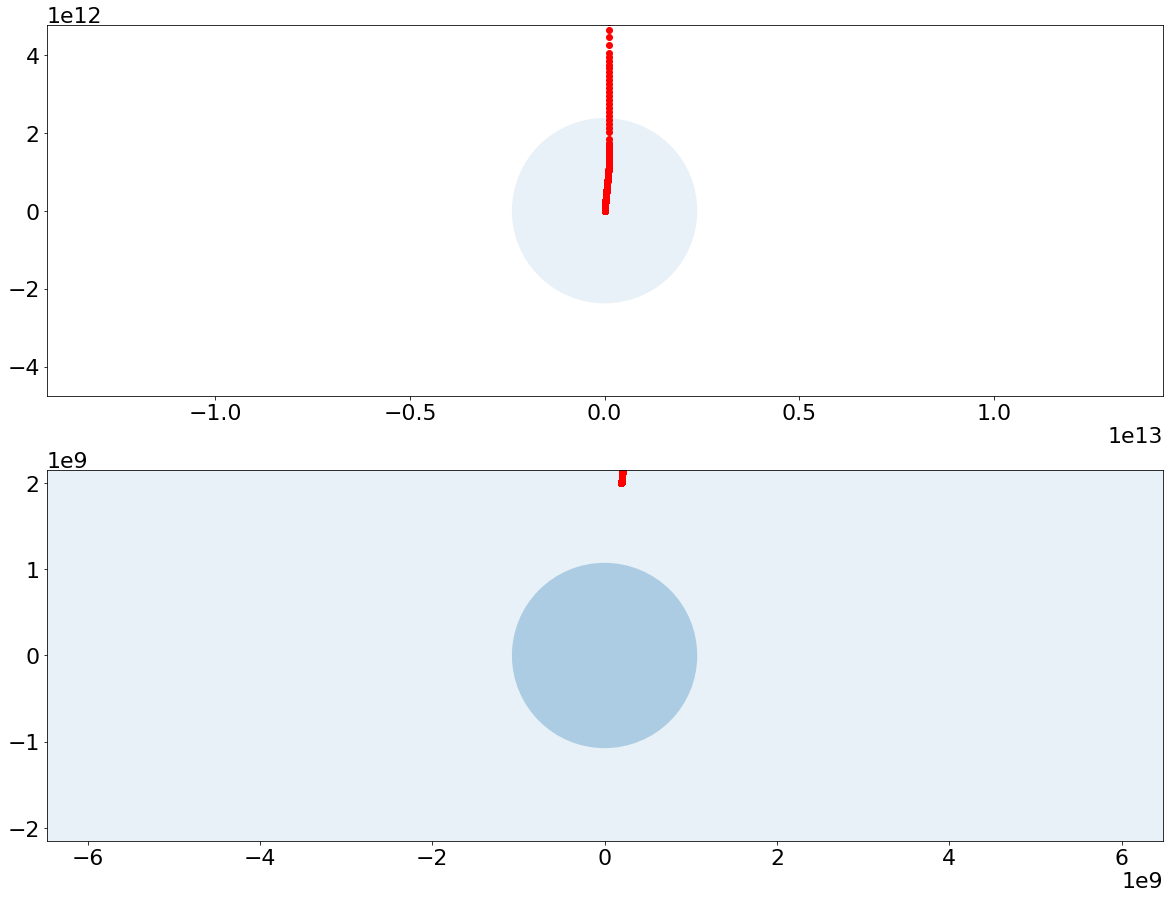

In [70]:
flash.plot_traj(flash.t_data,flash.y_data,2*star.now_rmax,2*star.now_rcore)

Information about setting Precision:

Zero $\sigma$:

For precision $10^{-4}$, we get $v_{core_0}=0.9333 $, and $v_{final}=0.01251$, or $v/v_0$=12.51. 

For precision $10^{-3}$, we get $v_{core_0}=0.9336 $, and $v_{final}=0.01251$, or $v/v_0$=12.51.
   
For precision $10^{-2}$, we get $v_{core_0}=0.9349 $, and $v_{final}=0.01251$, or $v/v_0$=12.51. 

For precision $10^{-1}$, we get $v_{core_0}=0.9451 $, and $v_{final}=0.01262$, or $v/v_0$=12.62. 
    
    
Non-Zero $\sigma$:

For precision $10^{-1}$, we get $v_{core_0}=6.619e-05 $, and $r_{final}=0.56447$

For precision $10^{-2}$, we get $v_{core_0}=6.619e-05 $, and $r_{final}=0.56451$

For precision $10^{-3}$, we get $v_{core_0}=6.619e-05 $, and $r_{final}=0.56451 $ and took forever

    